In [4]:
# Basic Libraries
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
#from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
import kmean
from sklearn.neighbors import LocalOutlierFactor
sb.set() 

In [2]:
df = pd.read_csv("netflix.csv")
df.head()

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2     The Con-Heartist                         Comedy, Romance   
3         Gleboka woda                                   Drama   
4        Only a Mother                                   Drama   

                                                Tags         Languages  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish   
1       Dramas,Comedies,Films Based on Books,British           English   
2  Romantic Comedies,Comedies,Romantic Films,Thai...              Thai   
3   TV Dramas,Polish TV Shows,Social Issue TV Dramas            Polish   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Swedish   

  Series or Movie  Hidden Gem Score  \
0          Series               4.3   
1           Movie               7.0   
2           Movie               8.6   
3          Series               8.7   
4           Movie               8.3   

                                Country Availability       Runtime  \
0                                           Thailand  < 30 minutes   
1                                             Canada      1-2 hour   
2                                           Thailand       > 2 hrs   
3                                             Poland  < 30 minutes   
4  Lithuania,Poland,France,Italy,Spain,Greece,Bel...      1-2 hour   

          Director                                             Writer  ...  \
0  Tomas Alfredson                              John Ajvide Lindqvist  ...   
1    Coky Giedroyc                                      Caitlin Moran  ...   
2    Mez Tharatorn  Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...  ...   
3              NaN                                                NaN  ...   
4      Alf Sjöberg                                  Ivar Lo-Johansson  ...   

                             Netflix Link  \
0  https://www.netflix.com/watch/81415947   
1  https://www.netflix.com/watch/81041267   
2  https://www.netflix.com/watch/81306155   
3  https://www.netflix.com/watch/81307527   
4  https://www.netflix.com/watch/81382068   

                               IMDb Link  \
0   https://www.imdb.com/title/tt1139797   
1   https://www.imdb.com/title/tt4193072   
2  https://www.imdb.com/title/tt13393728   
3   https://www.imdb.com/title/tt2300049   
4   https://www.imdb.com/title/tt0041155   

                                             Summary  IMDb Votes  \
0  A med student with a supernatural gift tries t...    205926.0   
1  When nerdy Johanna moves to London, things get...      2838.0   
2  After her ex-boyfriend cons her out of a large...       131.0   
3  A group of social welfare workers led by their...        47.0   
4  An unhappily married farm worker struggling to...        88.0   

                                               Image  \
0  https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...   
1  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
2  https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...   
3  https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...   
4  https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...   

                                              Poster  \
0  https://m.media-amazon.com/images/M/MV5BOWM4NT...   
1  https://m.media-amazon.com/images/M/MV5BZGUyN2...   
2  https://m.media-amazon.com/images/M/MV5BODAzOG...   
3  https://m.media-amazon.com/images/M/MV5BMTc0Nz...   
4  https://m.media-amazon.com/images/M/MV5BMjVmMz...   

                                  TMDb Trailer Trailer Site Unnamed: 29  \
0  https://www.youtube.com/watch?v=LqB6XJix-dM      YouTube         NaN   
1  https://www.youtube.com/watch?v=eIbcxPy4okQ      YouTube         NaN   
2  https://www.youtube.com/watch?v=md3CmFLGK6Y      YouTube         NaN   
3  https://www.youtube.com/watch?v=5kyF2vy63r0      YouTube         NaN   
4  https://www.youtube.com/watch?v=H0itWKFwMpQ      YouT

### Clean the Dataset

In [3]:
# Clean data - Filter 'Movie'
moviedata = df.loc[df['Series or Movie'] == 'Movie']

moviedata.head(3)

Title            Genre  \
1  HOW TO BUILD A GIRL           Comedy   
2     The Con-Heartist  Comedy, Romance   
4        Only a Mother            Drama   

                                                Tags Languages  \
1       Dramas,Comedies,Films Based on Books,British   English   
2  Romantic Comedies,Comedies,Romantic Films,Thai...      Thai   
4  Social Issue Dramas,Dramas,Movies Based on Boo...   Swedish   

  Series or Movie  Hidden Gem Score  \
1           Movie               7.0   
2           Movie               8.6   
4           Movie               8.3   

                                Country Availability   Runtime       Director  \
1                                             Canada  1-2 hour  Coky Giedroyc   
2                                           Thailand   > 2 hrs  Mez Tharatorn   
4  Lithuania,Poland,France,Italy,Spain,Greece,Bel...  1-2 hour    Alf Sjöberg   

                                              Writer  ...  \
1                                      Caitlin Moran  ...   
2  Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...  ...   
4                                  Ivar Lo-Johansson  ...   

                             Netflix Link  \
1  https://www.netflix.com/watch/81041267   
2  https://www.netflix.com/watch/81306155   
4  https://www.netflix.com/watch/81382068   

                               IMDb Link  \
1   https://www.imdb.com/title/tt4193072   
2  https://www.imdb.com/title/tt13393728   
4   https://www.imdb.com/title/tt0041155   

                                             Summary  IMDb Votes  \
1  When nerdy Johanna moves to London, things get...      2838.0   
2  After her ex-boyfriend cons her out of a large...       131.0   
4  An unhappily married farm worker struggling to...        88.0   

                                               Image  \
1  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
2  https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...   
4  https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...   

                                              Poster  \
1  https://m.media-amazon.com/images/M/MV5BZGUyN2...   
2  https://m.media-amazon.com/images/M/MV5BODAzOG...   
4  https://m.media-amazon.com/images/M/MV5BMjVmMz...   

                                  TMDb Trailer Trailer Site Unnamed: 29  \
1  https://www.youtube.com/watch?v=eIbcxPy4okQ      YouTube         NaN   
2  https://www.youtube.com/watch?v=md3CmFLGK6Y      YouTube         NaN   
4  https://www.youtube.com/watch?v=H0itWKFwMpQ      YouTube         NaN   

  Unnamed: 30  
1         NaN  
2         NaN  
4         NaN  

[3 rows x 31 columns]

In [4]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 1 to 9423
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  7010 non-null   object 
 1   Genre                  6995 non-null   object 
 2   Tags                   6983 non-null   object 
 3   Languages              6940 non-null   object 
 4   Series or Movie        7010 non-null   object 
 5   Hidden Gem Score       7001 non-null   float64
 6   Country Availability   7000 non-null   object 
 7   Runtime                7010 non-null   object 
 8   Director               6845 non-null   object 
 9   Writer                 6594 non-null   object 
 10  Actors                 6942 non-null   object 
 11  View Rating            5369 non-null   object 
 12  IMDb Score             7002 non-null   float64
 13  Rotten Tomatoes Score  5291 non-null   float64
 14  Metacritic Score       3999 non-null   float64
 15  Awar

In [5]:
# Delete columns that will not be used
moviedata_clean = moviedata.drop(['Netflix Link', 'IMDb Link', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site', 'Unnamed: 29','Unnamed: 30'], axis = 1, inplace = True)

#clean duplicated rows
moviedata_clean = moviedata.drop_duplicates()
moviedata_clean = moviedata.reset_index()

moviedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7010 non-null   int64  
 1   Title                  7010 non-null   object 
 2   Genre                  6995 non-null   object 
 3   Tags                   6983 non-null   object 
 4   Languages              6940 non-null   object 
 5   Series or Movie        7010 non-null   object 
 6   Hidden Gem Score       7001 non-null   float64
 7   Country Availability   7000 non-null   object 
 8   Runtime                7010 non-null   object 
 9   Director               6845 non-null   object 
 10  Writer                 6594 non-null   object 
 11  Actors                 6942 non-null   object 
 12  View Rating            5369 non-null   object 
 13  IMDb Score             7002 non-null   float64
 14  Rotten Tomatoes Score  5291 non-null   float64
 15  Meta

In [6]:
# Tackle missing values
moviedata_clean.isnull().sum()

index                       0
Title                       0
Genre                      15
Tags                       27
Languages                  70
Series or Movie             0
Hidden Gem Score            9
Country Availability       10
Runtime                     0
Director                  165
Writer                    416
Actors                     68
View Rating              1641
IMDb Score                  8
Rotten Tomatoes Score    1719
Metacritic Score         3011
Awards Received          2765
Awards Nominated For     1903
Boxoffice                3338
Release Date               88
Netflix Release Date        0
Production House         2721
Summary                     4
IMDb Votes                  9
dtype: int64

In [7]:
# Fill missing values in data
moviedata_clean.fillna(value = "NA", inplace = True)
moviedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  7010 non-null   int64 
 1   Title                  7010 non-null   object
 2   Genre                  7010 non-null   object
 3   Tags                   7010 non-null   object
 4   Languages              7010 non-null   object
 5   Series or Movie        7010 non-null   object
 6   Hidden Gem Score       7010 non-null   object
 7   Country Availability   7010 non-null   object
 8   Runtime                7010 non-null   object
 9   Director               7010 non-null   object
 10  Writer                 7010 non-null   object
 11  Actors                 7010 non-null   object
 12  View Rating            7010 non-null   object
 13  IMDb Score             7010 non-null   object
 14  Rotten Tomatoes Score  7010 non-null   object
 15  Metacritic Score     

In [8]:
# Extract the clean dataset into a new pd frame
netflixdata = pd.DataFrame(moviedata_clean)
netflixdata.head()

index                Title                                     Genre  \
0      1  HOW TO BUILD A GIRL                                    Comedy   
1      2     The Con-Heartist                           Comedy, Romance   
2      4        Only a Mother                                     Drama   
3      5           Snowroller                                    Comedy   
4      6        The Invisible  Crime, Drama, Fantasy, Mystery, Thriller   

                                                Tags  \
0       Dramas,Comedies,Films Based on Books,British   
1  Romantic Comedies,Comedies,Romantic Films,Thai...   
2  Social Issue Dramas,Dramas,Movies Based on Boo...   
3  Sports Movies,Sports Comedies,Comedies,Swedish...   
4  Thriller Movies,Movies Based on Books,Supernat...   

                             Languages Series or Movie Hidden Gem Score  \
0                              English           Movie                7   
1                                 Thai           Movie              8.6   
2                              Swedish           Movie              8.3   
3  Swedish, English, German, Norwegian           Movie              5.3   
4                              English           Movie                2   

                                Country Availability   Runtime  \
0                                             Canada  1-2 hour   
1                                           Thailand   > 2 hrs   
2  Lithuania,Poland,France,Italy,Spain,Greece,Bel...  1-2 hour   
3  Lithuania,Poland,France,Italy,Spain,Greece,Cze...  1-2 hour   
4  Lithuania,Poland,France,Italy,Spain,Greece,Cze...  1-2 hour   

         Director  ... Rotten Tomatoes Score Metacritic Score Awards Received  \
0   Coky Giedroyc  ...                    79               69               1   
1   Mez Tharatorn  ...                    NA               NA              NA   
2     Alf Sjöberg  ...                    NA               NA               2   
3     Lasse Åberg  ...                    NA               NA              NA   
4  David S. Goyer  ...                    20               36              NA   

  Awards Nominated For    Boxoffice Release Date Netflix Release Date  \
0                   NA      $70,632  08 May 2020           2021-03-04   
1                   NA           NA  03 Dec 2020           2021-03-03   
2                    1           NA  31 Oct 1949           2021-03-03   
3                   NA           NA  04 Oct 1985           2021-03-03   
4                    1  $20,578,909  27 Apr 2007           2021-03-03   

                              Production House  \
0       Film 4, Monumental Pictures, Lionsgate   
1                                           NA   
2                                           NA   
3                                           NA   
4  Touchstone Pictures, Spyglass Entertainment   

                                             Summary IMDb Votes  
0  When nerdy Johanna moves to London, things get...       2838  
1  After her ex-boyfriend cons her out of a large...        131  
2  An unhappily married farm worker struggling to...         88  
3  Two friends take a ski trip to the Alps, where...       5926  
4  Critically injured after a brutal beating, a t...      34738  

[5 rows x 24 columns]

### Exploratory Analysis
A basic insight of data

#### Top 15 Popular Movie Genres

In [9]:
#using counter() to build histogram
from collections import Counter

#as one movie may have serveral genres we split the words
col = "Genre"
categories = ", ".join(netflixdata['Genre']).split(", ")

#find the most common elements of a list
counter_list = Counter(categories).most_common(15)

#Plot the graph of the list
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color="#a678de"))

#put in data
data = [trace1]
layout = go.Layout(title="Top 15 Popular Movie Genres", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [10]:
#Create a new dataframe for rating
ratings = pd.DataFrame(df[["Title","Hidden Gem Score","IMDb Score", 
                                    "Rotten Tomatoes Score"]])
ratings

Title  Hidden Gem Score  IMDb Score  \
0                              Lets Fight Ghost               4.3         7.9   
1                           HOW TO BUILD A GIRL               7.0         5.8   
2                              The Con-Heartist               8.6         7.4   
3                                  Gleboka woda               8.7         7.5   
4                                 Only a Mother               8.3         6.7   
...                                         ...               ...         ...   
9420                             13 Going on 30               3.1         6.2   
9421                                   LIFE 2.0               8.2         6.2   
9422                              Brand New Day               8.6         7.3   
9423                Daniel Arends: Blessuretijd               8.8         7.8   
9424  DreamWorks Happy Holidays from Madagascar               8.4         6.8   

      Rotten Tomatoes Score  
0                      98.0  
1                      79.0  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
9420                   65.0  
9421                   89.0  
9422                    NaN  
9423                    NaN  
9424                    NaN  

[9425 rows x 4 columns]

#### 20 Top rated movies in Hidden Gem score - Netflix

In [11]:
#Taking the title value and Hidden Gem Platform Score
#use .sort_values due to null columns
hiddengem = ratings.sort_values('Hidden Gem Score', ascending = False).head(20)[['Title', "Hidden Gem Score"]]
hiddengem.head(5)

Title  Hidden Gem Score
187           No Festival               9.8
135       The Dream House               9.7
1351  Flavours of Romania               9.6
3812           Conspiracy               9.6
3806             Im Sorry               9.6

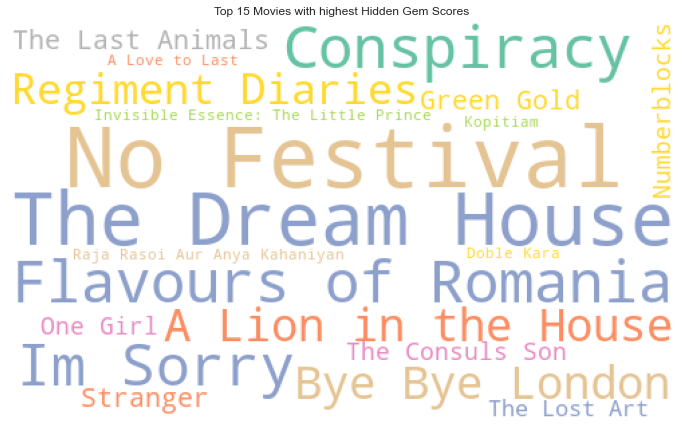

In [12]:
#Converting into Tuple
tuples_hiddengem = [tuple(x) for x in hiddengem.values]

#Making a wordcloud
wordcloud_hiddengem = WordCloud(colormap='Set2', background_color = 'white', width = 500, height = 300).generate_from_frequencies(dict(tuples_hiddengem))

plt.subplots(figsize=(12,12))
plt.imshow(wordcloud_hiddengem)
plt.axis("off")
plt.title("Top 15 Movies with highest Hidden Gem Scores")
plt.show()

#### Top 20 movies in IMDb platform

In [13]:
#Taking the title value and Hidden Gem Platform Score
imdb = ratings.sort_values('IMDb Score', ascending = False).head(20)[['Title', "IMDb Score"]]
imdb.head(5)

Title  IMDb Score
187           No Festival         9.7
9366         Breaking Bad         9.5
1351  Flavours of Romania         9.5
135       The Dream House         9.4
2975           Our Planet         9.3

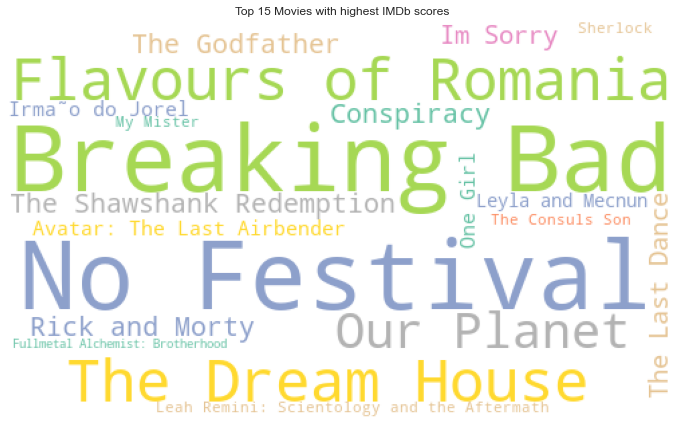

In [14]:
#Converting into Tuple
tuples_imdb = [tuple(x) for x in imdb.values]

#Making a wordcloud
wordcloud_imdb = WordCloud(colormap='Set2', background_color = 'white', width = 500, height = 300).generate_from_frequencies(dict(tuples_imdb))

plt.subplots(figsize=(12,12))
plt.imshow(wordcloud_imdb)
plt.axis("off")
plt.title("Top 15 Movies with highest IMDb scores")
plt.show()

#### Top 20 movies in Rotten Tomatoes

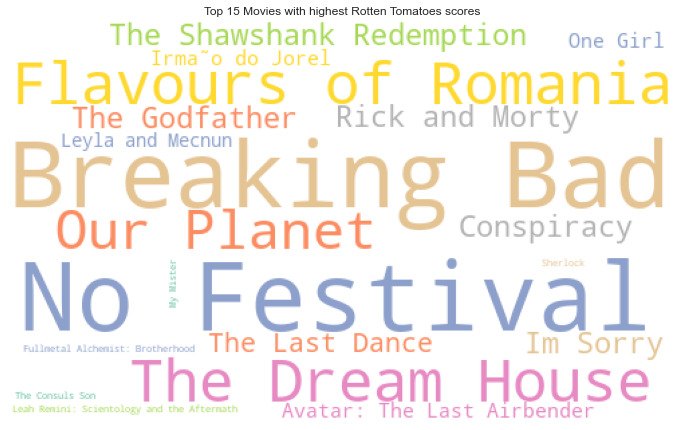

In [15]:
#Taking the title value and Rotten Tomatoes Score
rottentomatoes = ratings.sort_values('Rotten Tomatoes Score', ascending = False).head(20)[['Title', "Rotten Tomatoes Score"]]
rottentomatoes.head(5)

#Converting into Tuple
tuples_rottentomatoes = [tuple(x) for x in imdb.values]

#Making a wordcloud
wordcloud_rottentomatoes = WordCloud(colormap='Set2', background_color = 'white', width = 500, height = 300).generate_from_frequencies(dict(tuples_rottentomatoes))

plt.subplots(figsize=(12,12))
plt.imshow(wordcloud_rottentomatoes)
plt.axis("off")
plt.title("Top 15 Movies with highest Rotten Tomatoes scores")
plt.show()


#### Top rated movies over the 3 platfroms

In [16]:
#Since the marking scheme is /10 for hidden gem score & IMDb score,
# we need to convert to over 100 before making comparision
ratings["Hidden Gem Score"] = ratings["Hidden Gem Score"]*10
ratings["IMDb Score"] = ratings["IMDb Score"]*10
ratings.head(5)

Title  Hidden Gem Score  IMDb Score  Rotten Tomatoes Score
0     Lets Fight Ghost              43.0        79.0                   98.0
1  HOW TO BUILD A GIRL              70.0        58.0                   79.0
2     The Con-Heartist              86.0        74.0                    NaN
3         Gleboka woda              87.0        75.0                    NaN
4        Only a Mother              83.0        67.0                    NaN

In [17]:
#add a new column which obtains sum of scores in the three platforms
overallrating = ratings["Hidden Gem Score"] + ratings["IMDb Score"] + ratings["Rotten Tomatoes Score"]
ratings["Overall Score"] = overallrating

#Taking the title value and Hidden Gem Platform Score
overallscore = ratings.sort_values('Overall Score', ascending = False).head(20)[['Title', "Overall Score"]]
overallscore.head(5)

Title  Overall Score
662                                 A Lion in the House          283.0
3361                                   The Last Animals          276.0
6248  Attacking the Devil: Harold Evans and the Last...          274.0
3274               Invisible Essence: The Little Prince          271.0
4236                                                 89          269.0

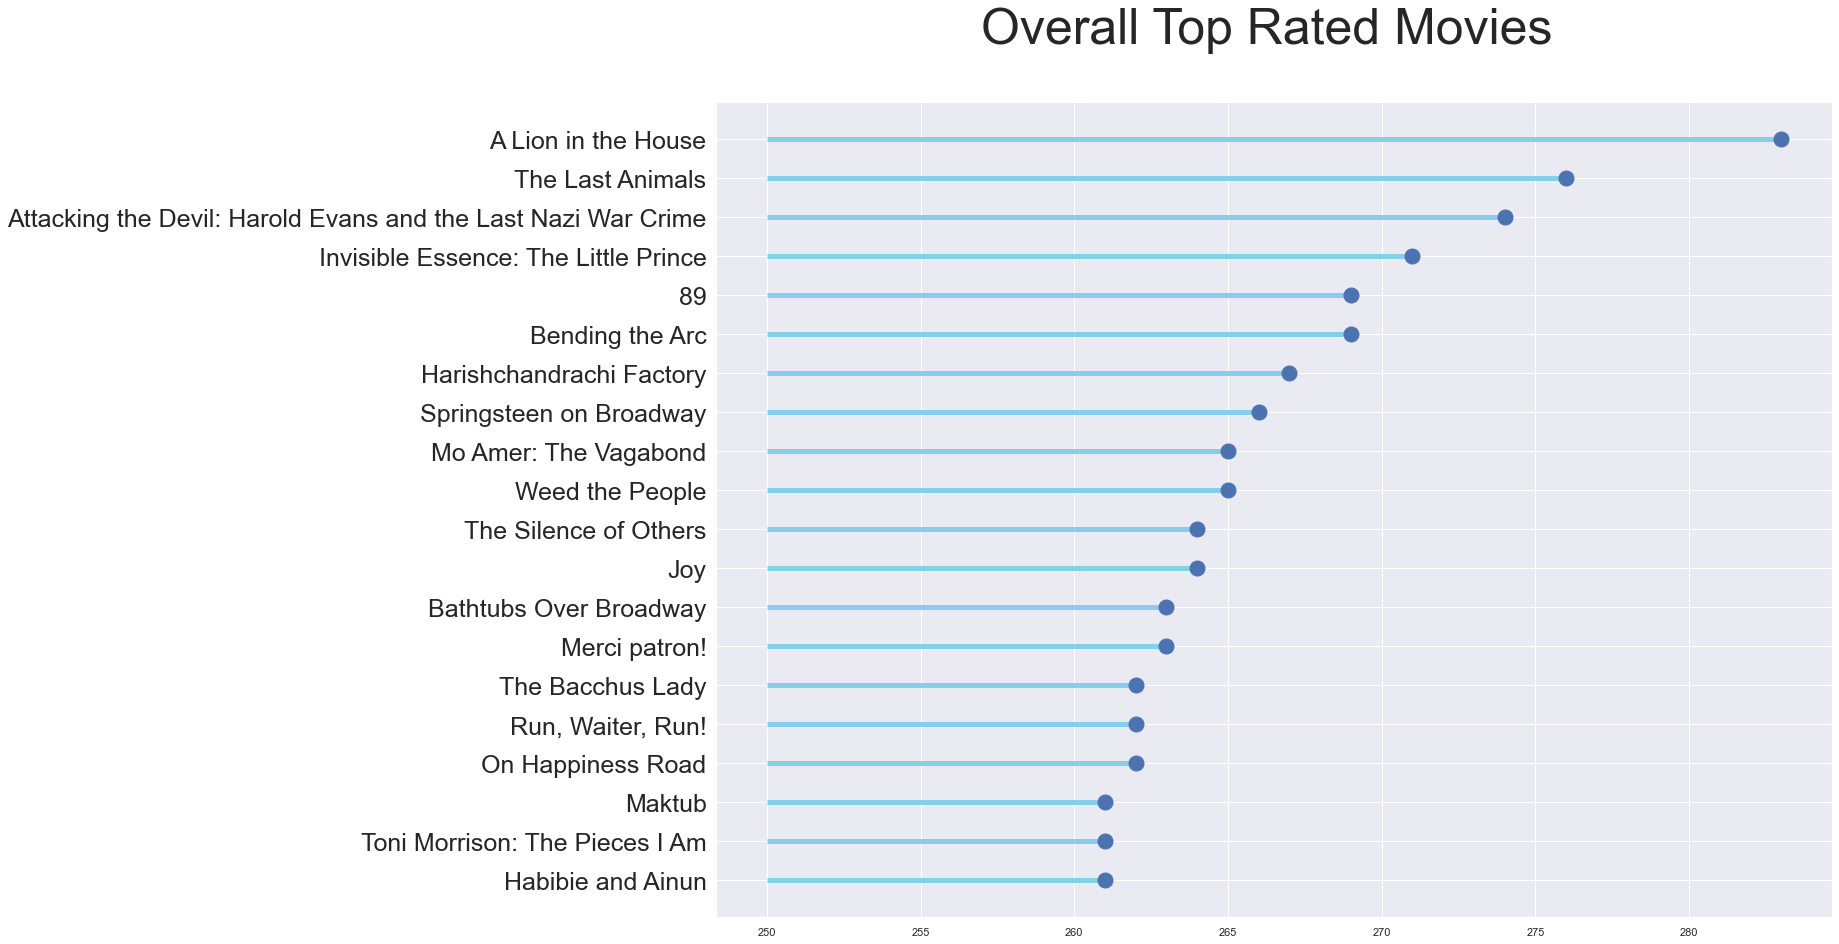

In [18]:
#plot the lollipop plot using matplotlib
tt = overallscore["Title"]
x = overallscore["Overall Score"]
plt.figure(figsize=[20,15])

my_range=range(1,len(overallscore.index)+1)


#plot the lollipop graph using hlines() method
plt.hlines(y=my_range, xmin=250, xmax=x, color='skyblue', linewidth=5.)
plt.plot(x, my_range, ".", markersize = 30) #D refers to the marker
plt.gca().invert_yaxis()

#add title
plt.title("Overall Top Rated Movies \n", fontdict = {'fontsize' : 50})
plt.yticks(my_range, tt, fontsize = 25)

plt.show()

#### Movie released trend

In [19]:
content= pd.DataFrame(moviedata[['Netflix Release Date']])
import plotly.express as px
fig = px.histogram(content, x="Netflix Release Date", nbins=12)
fig.update_layout(bargap=0.05)

fig.show()

#### View Rating Trend

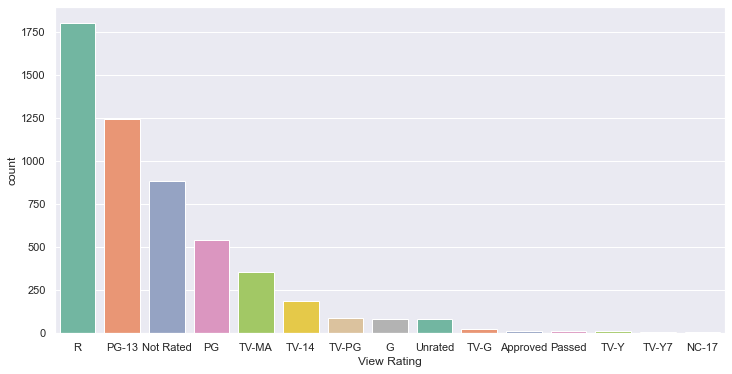

In [20]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="View Rating", data=moviedata, palette="Set2", order=moviedata['View Rating'].value_counts().index[0:15])
plt.show()

### Classification
Popularity of Genre of movies

In [21]:
#Create a separate df for classification
classification_df = pd.DataFrame(moviedata[["Title", "IMDb Score", "Boxoffice", "IMDb Votes"]])
classification_df.head(5)

Title  IMDb Score    Boxoffice  IMDb Votes
1  HOW TO BUILD A GIRL         5.8      $70,632      2838.0
2     The Con-Heartist         7.4          NaN       131.0
4        Only a Mother         6.7          NaN        88.0
5           Snowroller         6.6          NaN      5926.0
6        The Invisible         6.2  $20,578,909     34738.0

In [22]:
# Find the basic distribution to varify the grading of movies
classification_df['IMDb Votes'].describe().apply(lambda x: format(x, 'f'))

count       7001.000000
mean       73009.584345
std       160933.529426
min            5.000000
25%         1568.000000
50%        12568.000000
75%        71845.000000
max      2354197.000000
Name: IMDb Votes, dtype: object

In [23]:
classification_df['IMDb Votes'].quantile(0.1)

322.0

In [24]:
classification_df['IMDb Votes'].quantile(0.9)

206940.0

In [25]:
classification_df['IMDb Votes'].quantile(1.0)

2354197.0

##### Popularity level
Very popular - 90% - 206940 votes<br>
Somewhat Popular - 75% - 71845 votes<br>
Average - 50% - 12658 votes<br>
Not Very Popular - 25% - 1568 votes <br>
Unpopular - 10% - 322 votes<br>

In [26]:
# Creating a grading criteria for the votes
# Append Labels 'Popularity' to the dataset
votes_data = classification_df['IMDb Votes']
popularity_label = list()
for votes in votes_data:
    if votes <= 186:
        popularity_label.append('Unpopular')
    elif votes > 186 and votes <= 969.5:
        popularity_label.append('NotVeryPopular')
    elif votes > 969.5 and votes <= 6602:
        popularity_label.append('Average')
    elif votes > 6602 and votes <= 50987:
        popularity_label.append('SomewhatPopular')
    elif votes > 50987 and votes <= 170325:
        popularity_label.append('VeryPopular')
    elif votes > 170325 and votes <= 2354197:
        popularity_label.append('MostPopular')

# Update this class label into the dataframe
classification_df = pd.concat([classification_df, pd.DataFrame(popularity_label, columns=['popularity'])], axis=1)
classification_df.head(5)

Title  IMDb Score Boxoffice  IMDb Votes       popularity
0                  NaN         NaN       NaN         NaN          Average
1  HOW TO BUILD A GIRL         5.8   $70,632      2838.0        Unpopular
2     The Con-Heartist         7.4       NaN       131.0        Unpopular
3                  NaN         NaN       NaN         NaN          Average
4        Only a Mother         6.7       NaN        88.0  SomewhatPopular

In [27]:
#For the accuracy of prediction, we remove the empty column and only left
#with those are non-null for all columns
classification_df = classification_df.dropna()
print("Data Dimensioin: ", classification_df.shape)
classification_df.head(10)

Data Dimensioin:  (2074, 5)


Title  IMDb Score     Boxoffice  IMDb Votes  \
1             HOW TO BUILD A GIRL         5.8       $70,632      2838.0   
6                   The Invisible         6.2   $20,578,909     34738.0   
9                           Joker         8.4  $335,451,311    951938.0   
10                              I         6.5  $474,544,677    733336.0   
11               Harrys Daughters         8.1  $381,409,310    766594.0   
16  Comrades: Almost a Love Story         8.1       $17,676      5047.0   
17                     The Closet         7.0    $6,678,894     16657.0   
18                 The Mysterians         6.2      $975,000      1383.0   
26                  Trial by Fire         6.9      $148,504      3657.0   
34          Framing John DeLorean         6.5      $145,625      1398.0   

         popularity  
1         Unpopular  
6         Unpopular  
9       MostPopular  
10        Unpopular  
11          Average  
16          Average  
17          Average  
18   NotVeryPopular  
26          Average  
34  SomewhatPopular

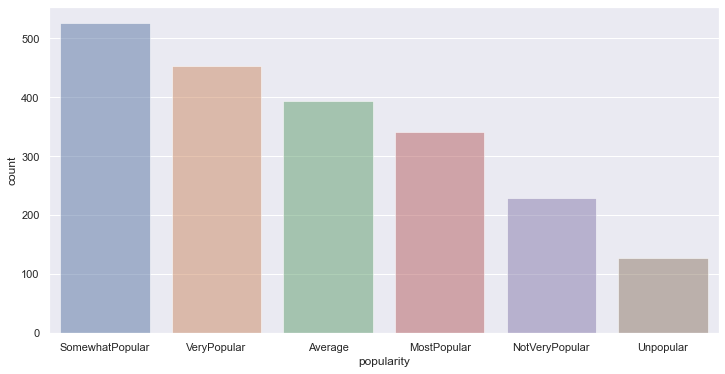

In [28]:
fig = plt.figure(figsize=(12, 6))
ax = sb.countplot(x = 'popularity', data = classification_df, alpha=0.5, order = classification_df['popularity'].value_counts().index)
plt.show()

### Classification - Decision Tree

In [29]:
popularity_dict = {'Unpopular': 0, 'NotVeryPopular': 1, 'Average': 2, 'SomewhatPopular': 3, 'VeryPopular': 4, 'MostPopular': 5}
classification_df["popularity_ordinal"] = classification_df.popularity.map(popularity_dict)

classification_df = classification_df.drop_duplicates()

classification_df

Title  IMDb Score     Boxoffice  IMDb Votes  \
1         HOW TO BUILD A GIRL         5.8       $70,632      2838.0   
6               The Invisible         6.2   $20,578,909     34738.0   
9                       Joker         8.4  $335,451,311    951938.0   
10                          I         6.5  $474,544,677    733336.0   
11           Harrys Daughters         8.1  $381,409,310    766594.0   
...                       ...         ...           ...         ...   
6995         The Book of Life         7.3   $50,151,543     64634.0   
6996  A River Runs Through It         7.2   $43,440,294     53871.0   
6997                  The Net         6.0   $50,727,965     61009.0   
6998              The Concert         7.6      $657,986     17418.0   
7000               Flashdance         6.2   $92,921,203     48048.0   

           popularity  popularity_ordinal  
1           Unpopular                   0  
6           Unpopular                   0  
9         MostPopular                   5  
10          Unpopular                   0  
11            Average                   2  
...               ...                 ...  
6995  SomewhatPopular                   3  
6996  SomewhatPopular                   3  
6997      VeryPopular                   4  
6998   NotVeryPopular                   1  
7000        Unpopular                   0  

[2065 rows x 6 columns]

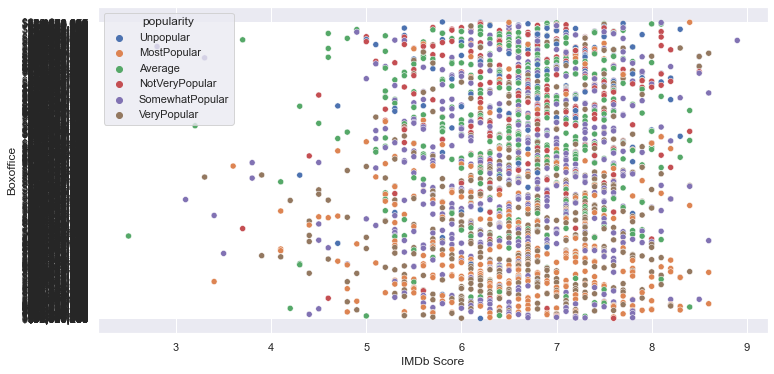

In [30]:
fig, axes = plt.subplots(figsize=(12,6))
sns.scatterplot(x='IMDb Score', y='Boxoffice', hue='popularity', data=classification_df, ax=axes)
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#remove special character '$' for Boxoffice
classification_df['Boxoffice'].astype(str) 
classification_df.Boxoffice = classification_df['Boxoffice'].replace('\$','',regex=True)
classification_df.Boxoffice = classification_df['Boxoffice'].replace('\,','',regex=True)
classification_df['Boxoffice'].astype(float)

X = classification_df[['Boxoffice']]    #predictor
y = classification_df[['popularity']]   #response

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state= 42)

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0, max_leaf_nodes = 5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=0)

In [32]:
X_train.shape, X_test.shape

((1445, 1), (620, 1))

In [33]:
#Compare the train-set and test-set accuracy
from sklearn.metrics import accuracy_score

y_pred_train_gini = clf_gini.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

y_pred_gini = clf_gini.predict(X_test)
print('Test set score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Training-set accuracy score: 0.2699
Test set score: 0.2500


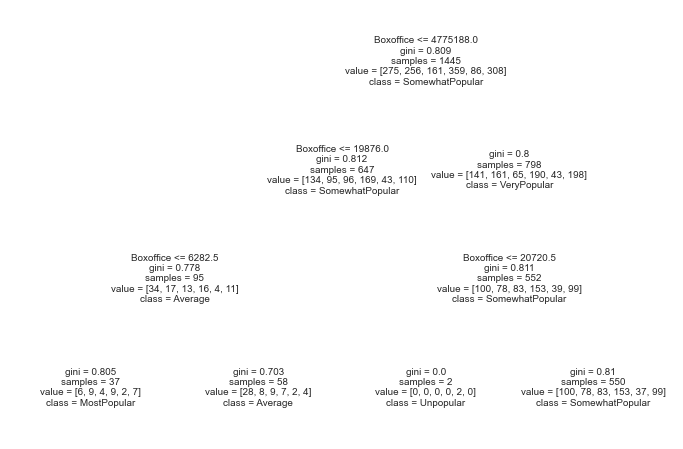

In [34]:
#Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names = X_train.columns, class_names = [str(x) for x in clf_gini.classes_]) 

plt.show()

Classification Accuracy of Train Data	: 0.2698961937716263
Classification Accuracy of Test Data	: 0.25


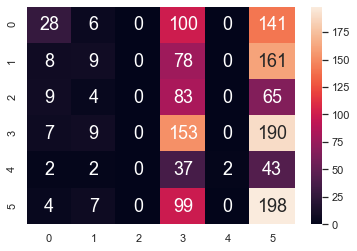

In [35]:
#Check the Goodness of Fit
print("Classification Accuracy of Train Data\t:", clf_gini.score(X_train, y_train))
print("Classification Accuracy of Test Data\t:",clf_gini.score(X_test, y_test))

# Plot the two-way Confusion Matrix for train 
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_pred_train_gini), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()


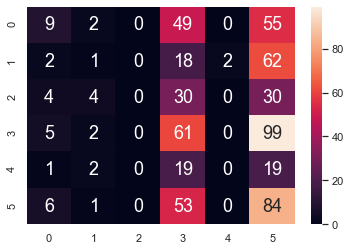

In [36]:
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_pred_gini), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

In [37]:
classification_df.head(150)

Title  IMDb Score  Boxoffice  IMDb Votes       popularity  \
1    HOW TO BUILD A GIRL         5.8      70632      2838.0        Unpopular   
6          The Invisible         6.2   20578909     34738.0        Unpopular   
9                  Joker         8.4  335451311    951938.0      MostPopular   
10                     I         6.5  474544677    733336.0        Unpopular   
11      Harrys Daughters         8.1  381409310    766594.0          Average   
..                   ...         ...        ...         ...              ...   
574                 1991         7.1    2342264       782.0          Average   
589  Motherless Brooklyn         6.8    9277736     44513.0      VeryPopular   
596       Richard Jewell         7.5   22345542     63671.0      MostPopular   
597                Rodan         6.3     500000      4528.0  SomewhatPopular   
600        The Swindlers         6.6     241916      1593.0   NotVeryPopular   

     popularity_ordinal  
1                     0  
6                     0  
9                     5  
10                    0  
11                    2  
..                  ...  
574                   2  
589                   4  
596                   5  
597                   3  
600                   1  

[150 rows x 6 columns]

In [38]:
#Prediction of Popularity 
popularity_pred = pd.DataFrame(classification_df[classification_df["Title"].isin(["Comrades: Almost a Love Story", "The Photograph", "The Swindle","The Net", "The Way Back","Living in Oblivion","Godzilla & Mothra: Battle for Earth", "1991", "Joker", "Richard Jewell"])])

# Predict Response corresponding to Predictors
predictors = ["Boxoffice"]
X_pred = pd.DataFrame(popularity_pred[predictors])
y_pred = clf_gini.predict(X_pred)
y_pred

array(['VeryPopular', 'Average', 'SomewhatPopular', 'VeryPopular',
       'SomewhatPopular', 'SomewhatPopular', 'VeryPopular',
       'SomewhatPopular', 'VeryPopular', 'VeryPopular'], dtype=object)

In [39]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["Pred_popularity"], index = popularity_pred.index)
popularity_acc = pd.concat([popularity_pred[["Title", "popularity"]], y_pred], axis = 1)

popularity_acc

Title       popularity  Pred_popularity
9                                   Joker      MostPopular      VeryPopular
16          Comrades: Almost a Love Story          Average          Average
103                           The Swindle      MostPopular  SomewhatPopular
108                        The Photograph   NotVeryPopular      VeryPopular
395                    Living in Oblivion  SomewhatPopular  SomewhatPopular
422                          The Way Back  SomewhatPopular  SomewhatPopular
496   Godzilla & Mothra: Battle for Earth      MostPopular      VeryPopular
574                                  1991          Average  SomewhatPopular
596                        Richard Jewell      MostPopular      VeryPopular
6997                              The Net      VeryPopular      VeryPopular

### Classification - KNN Classifier

In [40]:
# defining the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
X1 = classification_df[['Boxoffice']]    #predictor
y1 = classification_df[['popularity']]   #response


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.3, shuffle=False) # 70% training and 30% test

k_range = np.arange(1,100)
accuracy = []

for n in k_range:    
    neigh = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

    neigh.fit(X_train_1, y_train_1)  

    # predict the result
    y_pred = neigh.predict(X_test_1)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test_1))

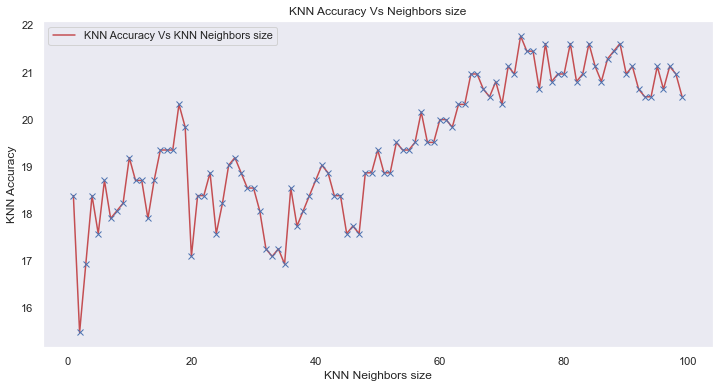

In [41]:
plt.figure(figsize=(12,6))
plt.plot(k_range, accuracy, 'r-', label='KNN Accuracy Vs KNN Neighbors size')
plt.plot(k_range, accuracy, 'bx')
plt.xlabel('KNN Neighbors size')
plt.ylabel('KNN Accuracy')
plt.legend()
plt.grid()
plt.title('KNN Accuracy Vs Neighbors size')
plt.show()

In [42]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(x = k_range, y = accuracy, markers=True, title = "KNN Accuracy Vs Neighbors size")
fig.update_layout(
    title_font_family="Times New Roman",
    xaxis_title="KNN Neighbors Size",
    yaxis_title="KNN Accuracy",
    legend_title="Legend Title",
    font=dict(
        family="Times New Roman",
        size=12,
        color="Black",
    )
)

fig.show()

The KNN model which gave the best accuracy of 21.77% was based on using the all the data-set feature and number of neighbor of 73.

### Classification - Categorical & Gaussian Naive Bayes Classifier

In [43]:
features = classification_df.columns.tolist()
features.remove('popularity')
features.remove('Title')
features.remove('popularity_ordinal')

features    

['IMDb Score', 'Boxoffice', 'IMDb Votes']

In [44]:
#Encoding categories
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(classification_df[features])
classification_df_encoded = pd.DataFrame(data_encoded, columns=features)
data_encoded

array([[  28., 1740.,  212.],
       [  32.,  643.,  993.],
       [  54., 1045., 1971.],
       ...,
       [  30., 1438., 1271.],
       [  46., 1681.,  691.],
       [  32., 1960., 1134.]])

In [45]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(classification_df['popularity'])
classification_df_encoded['popularity'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['Unpopular', 'Unpopular', 'MostPopular', ..., 'VeryPopular',
       'NotVeryPopular', 'Unpopular'], dtype=object)

In [46]:
classification_df_encoded.head()

IMDb Score  Boxoffice  IMDb Votes  popularity
0        28.0     1740.0       212.0           4
1        32.0      643.0       993.0           4
2        54.0     1045.0      1971.0           1
3        35.0     1367.0      1957.0           4
4        51.0     1178.0      1962.0           0

In [47]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(classification_df_encoded.drop('popularity', axis=1), classification_df_encoded['popularity'], test_size=0.3, random_state=143)


In [48]:
#Instantiate Categorical navie bayes and Gaussian navie bayes classifiers
from sklearn.naive_bayes import GaussianNB, CategoricalNB

cnb = CategoricalNB()
cnb.fit(X_train2, y_train2)

gnb = GaussianNB()
gnb.fit(X_train2, y_train2)

GaussianNB()

In [49]:
#Performance metrics - Testing score
# Categorical NB
y_pred_cnb = cnb.predict(X_test2)
y_prob_pred_cnb = cnb.predict_proba(X_test2)

count_misclassified = (y_test2 != y_pred_cnb).sum()

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test2, y_pred_cnb)
print('Accuracy: {:.2f}'.format(accuracy))


CategoricalNB
Misclassified samples: 494
Accuracy: 0.20


In [50]:
#Gaussian NB
y_pred_gnb = gnb.predict(X_test2)
y_prob_pred_gnb = gnb.predict_proba(X_test2)
# how did our model perform?
count_misclassified = (y_test2 != y_pred_gnb).sum()

print("GaussianNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test2, y_pred_gnb)
print('Accuracy: {:.2f}'.format(accuracy))

GaussianNB
Misclassified samples: 453
Accuracy: 0.27


In [51]:
#Recall, Precision, and F1 score for CategoricalNB

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report

print("Scores for CategoricalNB\n")
print("Recall score : ", recall_score(y_test2, y_pred_cnb , average='micro'))
print("Precision score : ",precision_score(y_test2, y_pred_cnb , average='micro'))
print("F1 score : ",f1_score(y_test2, y_pred_cnb, average='micro'))

Scores for CategoricalNB

Recall score :  0.2032258064516129
Precision score :  0.2032258064516129
F1 score :  0.2032258064516129


In [52]:
#Recall, Precision, and F1 score for GaussianNB
print("Scores for GaussianNB\n")
print("Recall score : ", recall_score(y_test2, y_pred_gnb , average='micro'))
print("Precision score : ",precision_score(y_test2, y_pred_gnb , average='micro'))
print("F1 score : ",f1_score(y_test2, y_pred_gnb , average='micro'))

Scores for GaussianNB

Recall score :  0.2693548387096774
Precision score :  0.2693548387096774
F1 score :  0.2693548387096774


In [53]:
print("CategoricalNB - ROC AUC score ", roc_auc_score(y_test2, y_prob_pred_cnb, multi_class='ovo', average='weighted'))
print("GaussianNB - ROC AUC score ",roc_auc_score(y_test2, y_prob_pred_gnb, multi_class='ovo', average='weighted'))

CategoricalNB - ROC AUC score  0.48339344068890416
GaussianNB - ROC AUC score  0.5492745479780121


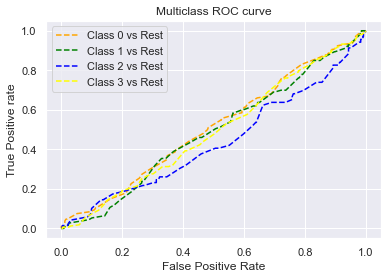

In [54]:
#Visualize AUC ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test2, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 
plt.show()

In [55]:
df = pd.read_csv('netflix2.csv')
df.head()

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2     The Con-Heartist                         Comedy, Romance   
3         Gleboka woda                                   Drama   
4        Only a Mother                                   Drama   

                                                Tags Series or Movie  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...          Series   
1       Dramas,Comedies,Films Based on Books,British           Movie   
2  Romantic Comedies,Comedies,Romantic Films,Thai...           Movie   
3   TV Dramas,Polish TV Shows,Social Issue TV Dramas          Series   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Movie   

   Hidden Gem Score         Director  \
0               4.3  Tomas Alfredson   
1               7.0    Coky Giedroyc   
2               8.6    Mez Tharatorn   
3               8.7              NaN   
4               8.3      Alf Sjöberg   

                                              Writer  \
0                              John Ajvide Lindqvist   
1                                      Caitlin Moran   
2  Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...   
3                                                NaN   
4                                  Ivar Lo-Johansson   

                                              Actors  IMDb Score  \
0  Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...         7.9   
1  Cleo, Paddy Considine, Beanie Feldstein, Dónal...         5.8   
2  Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...         7.4   
3  Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...         7.5   
4  Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...         6.7   

   Rotten Tomatoes Score  Metacritic Score  Awards Received  \
0                   98.0              82.0             74.0   
1                   79.0              69.0              1.0   
2                    NaN               NaN              NaN   
3                    NaN               NaN              2.0   
4                    NaN               NaN              2.0   

   Awards Nominated For   Boxoffice                        Production House  \
0                  57.0  $2,122,065               Canal+, Sandrew Metronome   
1                   NaN     $70,632  Film 4, Monumental Pictures, Lionsgate   
2                   NaN         NaN                                     NaN   
3                   4.0         NaN                                     NaN   
4                   1.0         NaN                                     NaN   

   IMDb Votes  
0    205926.0  
1      2838.0  
2       131.0  
3        47.0  
4        88.0

### Clean the Dataset

In [56]:
# Clean data - Filter 'Movie'
#filtered_data = pd.DataFrame(moviedata.loc[moviedata['Series or Movie'] == 'Movie'])
moviedata = df.loc[df['Series or Movie'] == 'Movie']
moviedata.head()

Title                                     Genre  \
1  HOW TO BUILD A GIRL                                    Comedy   
2     The Con-Heartist                           Comedy, Romance   
4        Only a Mother                                     Drama   
5           Snowroller                                    Comedy   
6        The Invisible  Crime, Drama, Fantasy, Mystery, Thriller   

                                                Tags Series or Movie  \
1       Dramas,Comedies,Films Based on Books,British           Movie   
2  Romantic Comedies,Comedies,Romantic Films,Thai...           Movie   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Movie   
5  Sports Movies,Sports Comedies,Comedies,Swedish...           Movie   
6  Thriller Movies,Movies Based on Books,Supernat...           Movie   

   Hidden Gem Score        Director  \
1               7.0   Coky Giedroyc   
2               8.6   Mez Tharatorn   
4               8.3     Alf Sjöberg   
5               5.3     Lasse Åberg   
6               2.0  David S. Goyer   

                                              Writer  \
1                                      Caitlin Moran   
2  Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...   
4                                  Ivar Lo-Johansson   
5                            Lasse Åberg, Bo Jonsson   
6              Mats Wahl, Mick Davis, Christine Roum   

                                              Actors  IMDb Score  \
1  Cleo, Paddy Considine, Beanie Feldstein, Dónal...         5.8   
2  Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...         7.4   
4  Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...         6.7   
5  Lasse Åberg, Cecilia Walton, Eva Millberg, Jon...         6.6   
6  Marcia Gay Harden, Margarita Levieva, Chris Ma...         6.2   

   Rotten Tomatoes Score  Metacritic Score  Awards Received  \
1                   79.0              69.0              1.0   
2                    NaN               NaN              NaN   
4                    NaN               NaN              2.0   
5                    NaN               NaN              NaN   
6                   20.0              36.0              NaN   

   Awards Nominated For    Boxoffice  \
1                   NaN      $70,632   
2                   NaN          NaN   
4                   1.0          NaN   
5                   NaN          NaN   
6                   1.0  $20,578,909   

                              Production House  IMDb Votes  
1       Film 4, Monumental Pictures, Lionsgate      2838.0  
2                                          NaN       131.0  
4                                          NaN        88.0  
5                                          NaN      5926.0  
6  Touchstone Pictures, Spyglass Entertainment     34738.0

In [57]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 1 to 9423
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  7010 non-null   object 
 1   Genre                  6995 non-null   object 
 2   Tags                   6983 non-null   object 
 3   Series or Movie        7010 non-null   object 
 4   Hidden Gem Score       7001 non-null   float64
 5   Director               6845 non-null   object 
 6   Writer                 6594 non-null   object 
 7   Actors                 6942 non-null   object 
 8   IMDb Score             7002 non-null   float64
 9   Rotten Tomatoes Score  5291 non-null   float64
 10  Metacritic Score       3999 non-null   float64
 11  Awards Received        4245 non-null   float64
 12  Awards Nominated For   5107 non-null   float64
 13  Boxoffice              3672 non-null   object 
 14  Production House       4289 non-null   object 
 15  IMDb

# Classification
### 1.Creating a grading criteria for the IMDb Votes

In [58]:
# Describing the data
# From the data, there will be need to normailze the data if their will be need for condersing any machine learning model.
df['IMDb Votes'].describe()

count    9.415000e+03
mean     6.014725e+04
std      1.463837e+05
min      5.000000e+00
25%      9.695000e+02
50%      6.602000e+03
75%      5.098700e+04
max      2.354197e+06
Name: IMDb Votes, dtype: float64

In [59]:
#Suppress Scientific Notation(e+) for the single column "IMDb Votes"
df["IMDb Votes"].describe().apply(lambda x: format(x, 'f'))

count       9415.000000
mean       60147.253850
std       146383.700441
min            5.000000
25%          969.500000
50%         6602.000000
75%        50987.000000
max      2354197.000000
Name: IMDb Votes, dtype: object

### 2.Grading the popularity
 Excellent -90-100%   
 Very good - 75-90%   
 good - 50-75%   
 Average - 25-50%   
 Not Very Popular - 10-25%   
 Unpopular At All - 0-10%   

In [60]:
#Calculate the 10th and 90th percentile
df['IMDb Votes'].quantile(0.1)

186.0

In [61]:
df['IMDb Votes'].quantile(0.9)

170325.00000000012

In [62]:
df['IMDb Votes'].quantile(1.0)

2354197.0

In [63]:
# Clean data - Filter 'Movie'
#filtered_data = pd.DataFrame(moviedata.loc[moviedata['Series or Movie'] == 'Movie'])
filtered_data = moviedata.loc[moviedata['Series or Movie'] == 'Movie']
filtered_data
df = pd.read_csv('netflix2.csv')
df.head()
moviedata = df.loc[df['Series or Movie'] == 'Movie']

moviedata_clean=moviedata.drop(['Title', 'Tags', 'Series or Movie', 'Director', 'Writer', 'Actors','Production House'], axis = 1)

# Tackle missing values
moviedata_clean.isnull().sum()

# Fill missing values in data
moviedata_clean.fillna(value = "NA", inplace = True)

moviedata_clean.fillna(moviedata_clean.mean(), inplace=True)

netflixdata = pd.DataFrame(moviedata_clean)

votes_data = df['IMDb Votes']
Popularity_label = list()
for votes in votes_data:
    if votes <= 186:
        Popularity_label.append('Unpopular At All')
    elif votes > 186 and votes <= 969.5:
        Popularity_label.append('Not Very Popular')
    elif votes > 969.5 and votes <= 6602:
        Popularity_label.append('Average')
    elif votes > 6602 and votes <= 50987:
        Popularity_label.append('Good')
    elif votes > 50987 and votes <= 170325:
        Popularity_label.append('Very good')
    elif votes > 170325 and votes <= 2354197:
        Popularity_label.append('Excellent')
    else:
        Popularity_label.append('Exceptional')
  
df = pd.concat([df, pd.DataFrame(Popularity_label, columns=['Popularity'])], axis=1)
df.head(5)

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2     The Con-Heartist                         Comedy, Romance   
3         Gleboka woda                                   Drama   
4        Only a Mother                                   Drama   

                                                Tags Series or Movie  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...          Series   
1       Dramas,Comedies,Films Based on Books,British           Movie   
2  Romantic Comedies,Comedies,Romantic Films,Thai...           Movie   
3   TV Dramas,Polish TV Shows,Social Issue TV Dramas          Series   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Movie   

   Hidden Gem Score         Director  \
0               4.3  Tomas Alfredson   
1               7.0    Coky Giedroyc   
2               8.6    Mez Tharatorn   
3               8.7              NaN   
4               8.3      Alf Sjöberg   

                                              Writer  \
0                              John Ajvide Lindqvist   
1                                      Caitlin Moran   
2  Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...   
3                                                NaN   
4                                  Ivar Lo-Johansson   

                                              Actors  IMDb Score  \
0  Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...         7.9   
1  Cleo, Paddy Considine, Beanie Feldstein, Dónal...         5.8   
2  Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...         7.4   
3  Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...         7.5   
4  Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...         6.7   

   Rotten Tomatoes Score  Metacritic Score  Awards Received  \
0                   98.0              82.0             74.0   
1                   79.0              69.0              1.0   
2                    NaN               NaN              NaN   
3                    NaN               NaN              2.0   
4                    NaN               NaN              2.0   

   Awards Nominated For   Boxoffice                        Production House  \
0                  57.0  $2,122,065               Canal+, Sandrew Metronome   
1                   NaN     $70,632  Film 4, Monumental Pictures, Lionsgate   
2                   NaN         NaN                                     NaN   
3                   4.0         NaN                                     NaN   
4                   1.0         NaN                                     NaN   

   IMDb Votes        Popularity  
0    205926.0         Excellent  
1      2838.0           Average  
2       131.0  Unpopular At All  
3        47.0  Unpopular At All  
4        88.0  Unpopular At All

In [64]:
#For the accuracy of prediction, we remove the empty column and only left
#with those are non-null for all columns
df = df.dropna()
print("Data Dimensioin: ", df.shape)
df.head(10)
popularity_dict = {'Unpopular At All': 0, 'Not Very Popular': 1, 'Average': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5, 'Exceptional': 6}
df["popularity_ordinal"] = df.Popularity.map(popularity_dict)

df = df.drop_duplicates()

df

Data Dimensioin:  (2216, 17)


Title  \
0                             Lets Fight Ghost   
9                                        Joker   
10                                           I   
11                            Harrys Daughters   
17                                  The Closet   
...                                        ...   
9411                            50 First Dates   
9412                                        21   
9414                                One Chance   
9415  The Twilight Saga: Breaking Dawn: Part 1   
9416                         One for the Money   

                                             Genre  \
0           Crime, Drama, Fantasy, Horror, Romance   
9                           Crime, Drama, Thriller   
10              Action, Adventure, Fantasy, Sci-Fi   
11              Adventure, Drama, Fantasy, Mystery   
17                                          Comedy   
...                                            ...   
9411                        Comedy, Drama, Romance   
9412               Crime, Drama, History, Thriller   
9414               Biography, Comedy, Drama, Music   
9415  Adventure, Drama, Fantasy, Romance, Thriller   
9416               Action, Comedy, Crime, Thriller   

                                                   Tags Series or Movie  \
0     Comedy Programmes,Romantic TV Comedies,Horror ...          Series   
9     Dark Comedies,Crime Comedies,Dramas,Comedies,C...           Movie   
10                                Dramas,Swedish Movies           Movie   
11                                Dramas,Swedish Movies           Movie   
17                Korean Movies,Horror Movies,Mysteries           Movie   
...                                                 ...             ...   
9411  Romantic Favourites,Romantic Comedies,Comedies...           Movie   
9412  Dramas,Dramas based on a book,Police Dramas,Po...           Movie   
9414  Dramas,Biographical Dramas,Dramas based on rea...           Movie   
9415  Dramas,Romantic Dramas,Dramas based on a book,...           Movie   
9416  Romantic Comedies,Action Comedies,Comedies,Pol...           Movie   

      Hidden Gem Score             Director  \
0                  4.3      Tomas Alfredson   
9                  3.5        Todd Phillips   
10                 2.8         George Lucas   
11                 4.4          David Yates   
17                 3.8        Francis Veber   
...                ...                  ...   
9411               2.7          Peter Segal   
9412               2.5       Robert Luketic   
9414               3.0        David Frankel   
9415               2.0          Bill Condon   
9416               1.3  Julie Anne Robinson   

                                                 Writer  \
0                                 John Ajvide Lindqvist   
9     Bob Kane, Jerry Robinson, Bill Finger, Todd Ph...   
10                                         George Lucas   
11                           Steve Kloves, J.K. Rowling   
17                                        Francis Veber   
...                                                 ...   
9411                                        George Wing   
9412           Allan Loeb, Peter Steinfeld, Ben Mezrich   
9414                                     Justin Zackham   
9415                 Melissa Rosenberg, Stephenie Meyer   
9416  Stacy Sherman, Liz Brixius, Janet Evanovich, K...   

                                                 Actors  IMDb Score  \
0     Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...         7.9   
9     Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...         8.4   
10    Ewan McGregor, Natalie Portman, Jake Lloyd, Li...         6.5   
11    Daniel Radcliffe, Ralph Fiennes, Alan Rickman,...         8.1   
17    Daniel Auteuil, Thierry Lhermitte, Michèle Lar...         7.0   
...                                                 ...         ...   
9411  Rob Schneider, Adam Sandler, Drew Barrymore, S...         6.8   
9412  Aaron Yoo, Jim Sturgess, Kevin Spacey, Kat

In [65]:
df["Popularity"].value_counts()

Excellent           810
Very good           763
Good                528
Average             107
Not Very Popular      8
Name: Popularity, dtype: int64

In [66]:
df["popularity_ordinal"].value_counts()

5    810
4    763
3    528
2    107
1      8
Name: popularity_ordinal, dtype: int64

In [67]:
df['Popularity'].describe()

count          2216
unique            5
top       Excellent
freq            810
Name: Popularity, dtype: object

In [68]:
df['popularity_ordinal']

0       5
9       5
10      5
11      5
17      3
       ..
9411    5
9412    5
9414    3
9415    5
9416    3
Name: popularity_ordinal, Length: 2216, dtype: int64

# Linear Regression - predict popularity using boxoffice, awards received and awards nominated

In [69]:
#Remove the dollar sign$ and convert the datatype from object to int/float 64, otherwise cannot plot the variable boxoffice
bf = df['Boxoffice'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)
print(bf)

0         2122065.0
9       335451311.0
10      474544677.0
11      381409310.0
17        6678894.0
           ...     
9411    120908074.0
9412     81159365.0
9414       101196.0
9415    281287133.0
9416     26414527.0
Name: Boxoffice, Length: 2216, dtype: float64


In [70]:
#Create a new column for boxoffice with datatype float
df['box'] = df['Boxoffice'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float64)
print(df['box'])

0         2122065.0
9       335451311.0
10      474544677.0
11      381409310.0
17        6678894.0
           ...     
9411    120908074.0
9412     81159365.0
9414       101196.0
9415    281287133.0
9416     26414527.0
Name: box, Length: 2216, dtype: float64


In [71]:
ppl = pd.DataFrame(df['popularity_ordinal'])
bf = pd.DataFrame(df['box'])
ar = pd.DataFrame(df['Awards Received'])
anf = pd.DataFrame(df['Awards Nominated For'])

<AxesSubplot:>

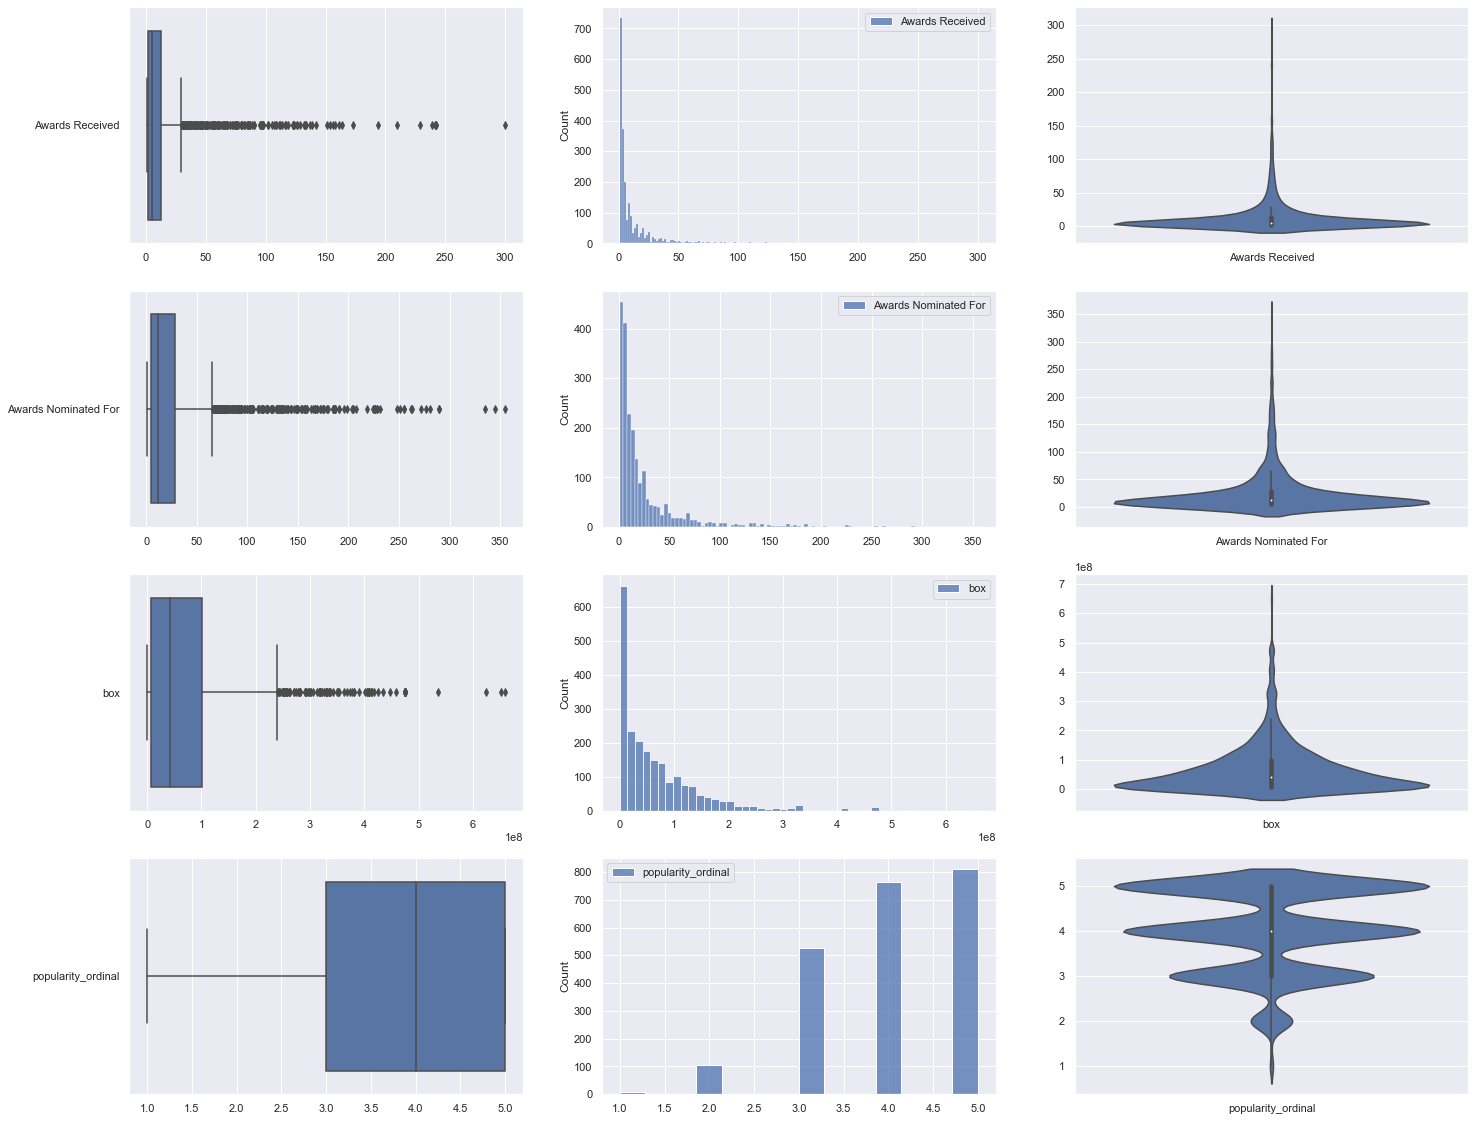

In [72]:
f, axes = plt.subplots(4, 3, figsize=(24, 20))

sb.boxplot(data=ar, orient = "h", ax = axes[0,0])
sb.histplot(data=ar, ax = axes[0,1])
sb.violinplot(data=ar, ax = axes[0,2])

sb.boxplot(data=anf, orient = "h", ax = axes[1,0])
sb.histplot(data=anf, ax = axes[1,1])
sb.violinplot(data=anf, ax = axes[1,2])

sb.boxplot(data=bf, orient = "h", ax = axes[2,0])
sb.histplot(data=bf, ax = axes[2,1])
sb.violinplot(data=bf, ax = axes[2,2])

sb.boxplot(data=ppl, orient = "h", ax = axes[3,0])
sb.histplot(data=ppl, ax = axes[3,1])
sb.violinplot(data=ppl, ax = axes[3,2])

#The variable boxoffice has the most "Normal" looking distribution, the variable Awards received has the maximum outliers

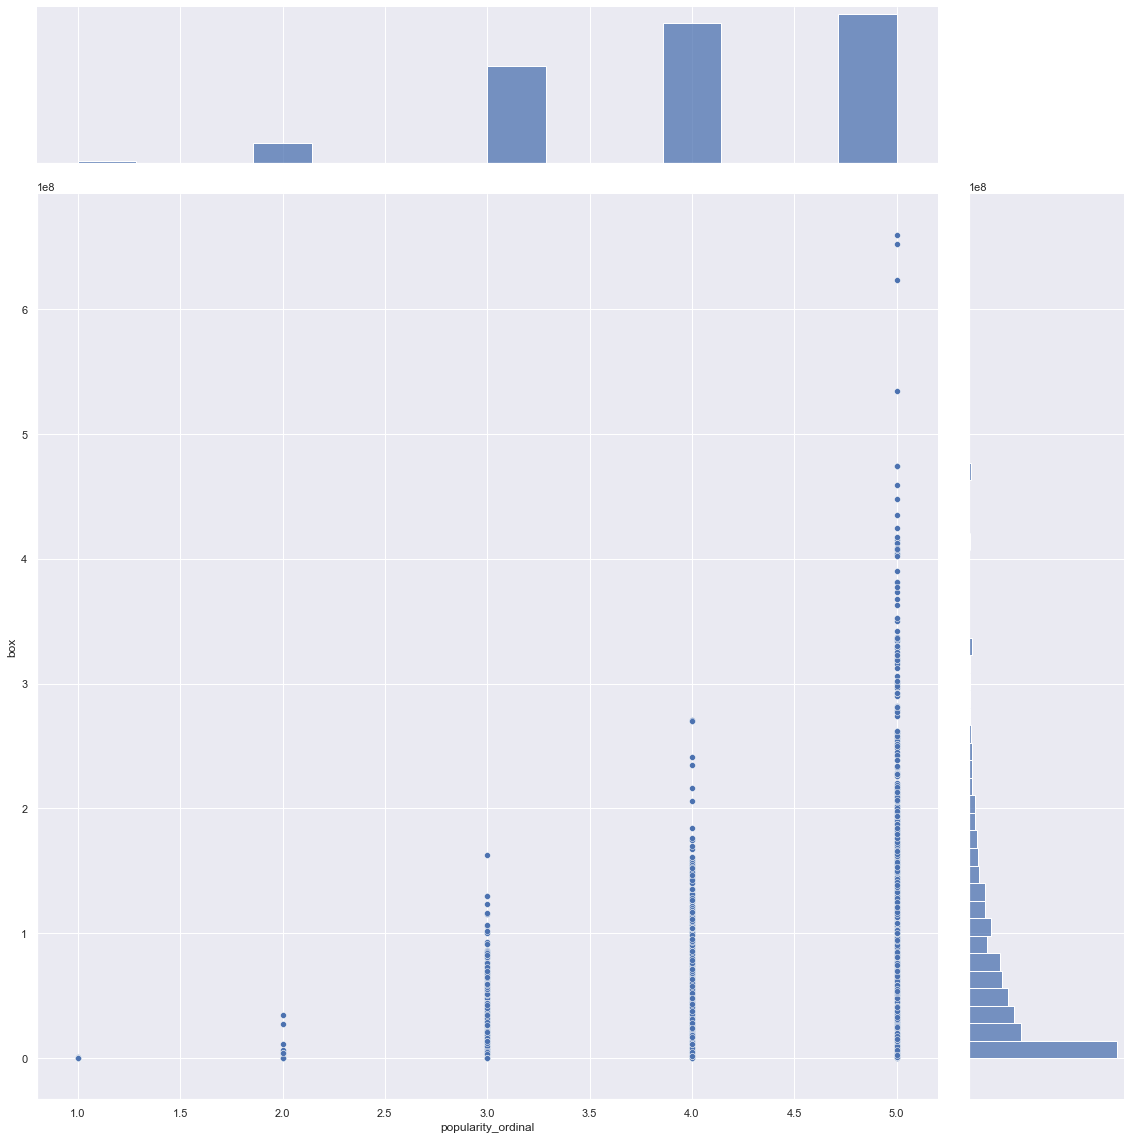

In [73]:
#Check the relationship amongst the variables using mutual jointplots and an overall pairplot
#Plot Boxoffice (y-axis) vs popularity_ordinal (x-axis) using jointplot
jointbp = pd.concat((bf, ppl),axis = 1).reindex(ppl.index)
sb.jointplot(data= jointbp, x= 'popularity_ordinal', y='box',height=16)

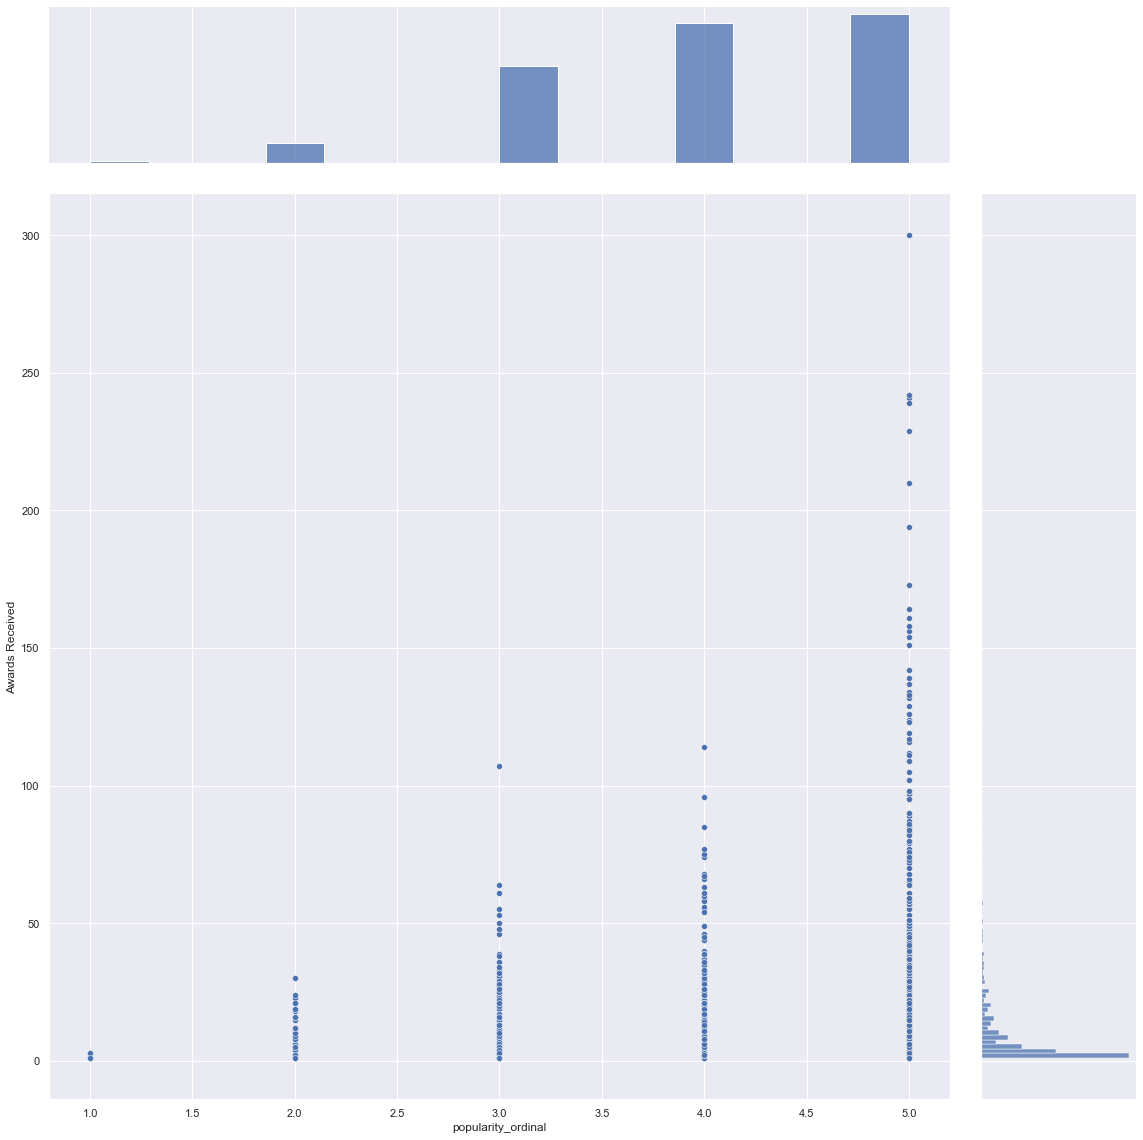

In [74]:
#Check the relationship amongst the variables using mutual jointplots and an overall pairplot
#Plot Awards Received (y-axis) vs popularity_ordinal (x-axis) using jointplot
jointar = pd.concat((ar, ppl),axis = 1).reindex(ppl.index)
sb.jointplot(data= jointar, x= 'popularity_ordinal', y='Awards Received',height=16)

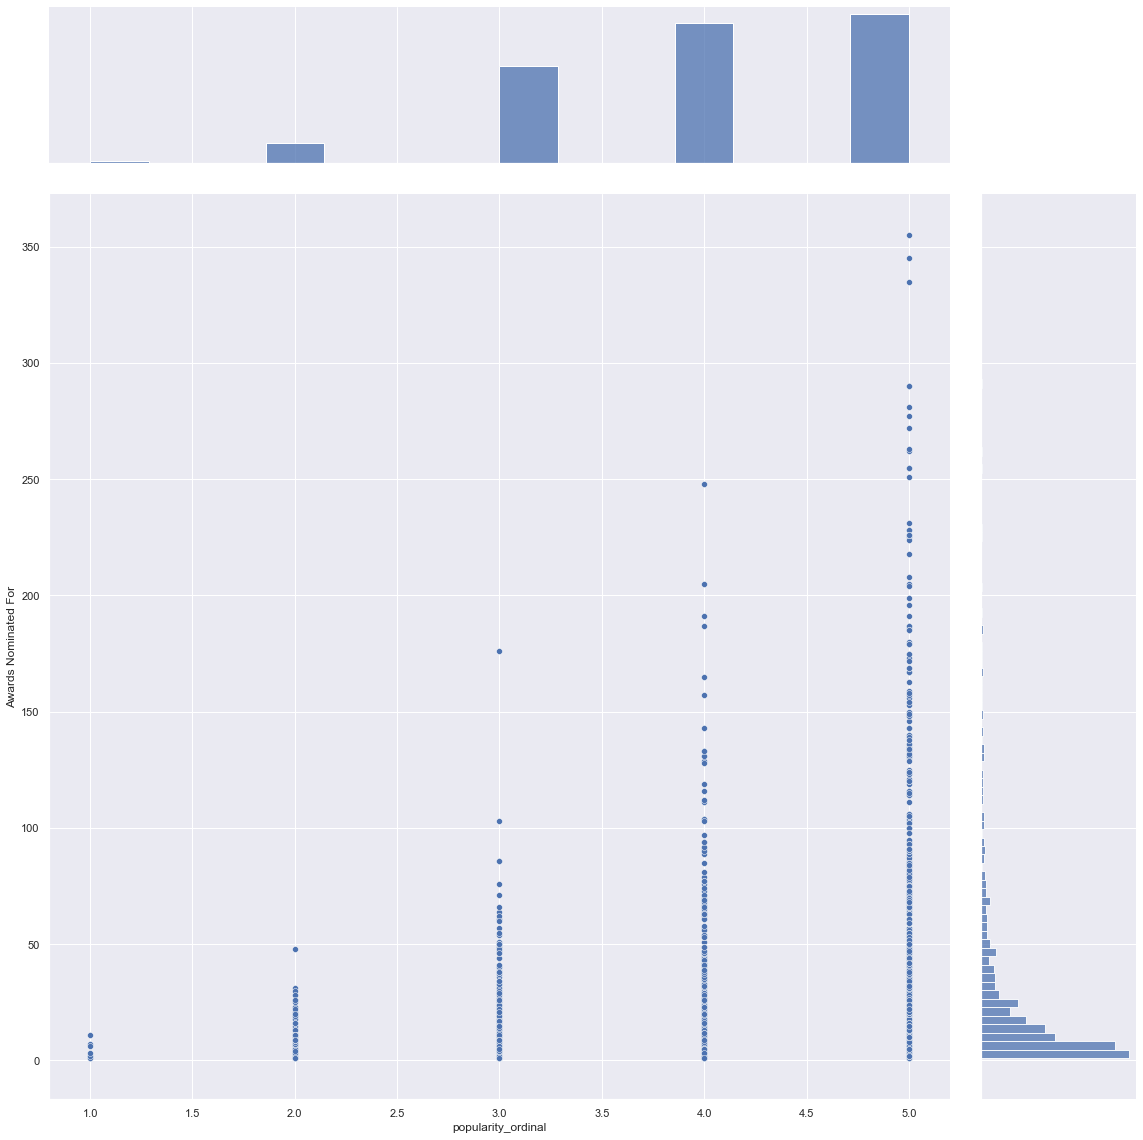

In [75]:
#Check the relationship amongst the variables using mutual jointplots and an overall pairplot
#Plot Awards Nominated For (y-axis) vs popularity_ordinal (x-axis) using jointplot
jointanf = pd.concat((anf, ppl),axis = 1).reindex(ppl.index)
sb.jointplot(data= jointanf, x= 'popularity_ordinal', y='Awards Nominated For',height=16)

In [76]:
data = df[['popularity_ordinal','Awards Received','Awards Nominated For','box']]
data

popularity_ordinal  Awards Received  Awards Nominated For          box
0                      5             74.0                  57.0    2122065.0
9                      5            112.0                 228.0  335451311.0
10                     5             26.0                  69.0  474544677.0
11                     5             46.0                  94.0  381409310.0
17                     3              1.0                   1.0    6678894.0
...                  ...              ...                   ...          ...
9411                   5              6.0                  10.0  120908074.0
9412                   5              1.0                   5.0   81159365.0
9414                   3              3.0                   5.0     101196.0
9415                   5             11.0                  22.0  281287133.0
9416                   3              1.0                   1.0   26414527.0

[2216 rows x 4 columns]

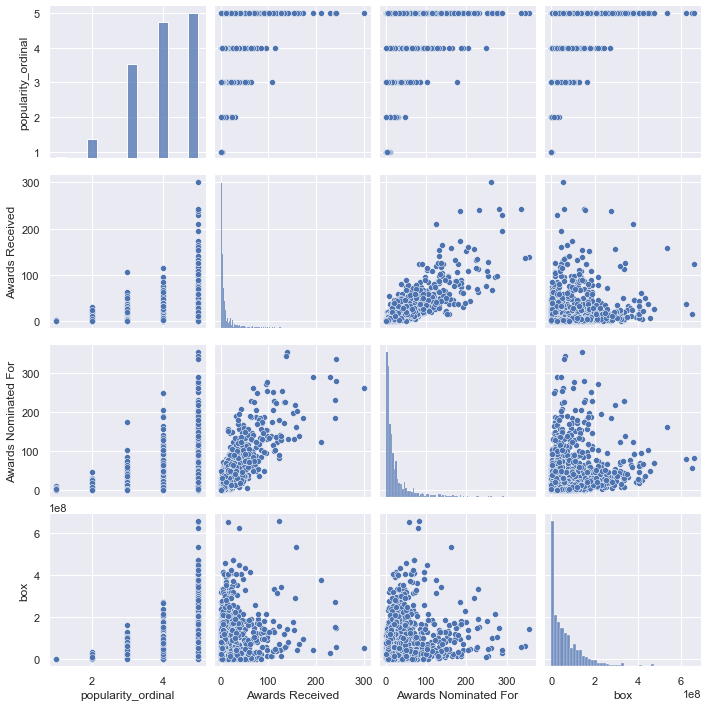

In [77]:
sb.pairplot(data=data)

In [78]:
df.corr()

Hidden Gem Score  IMDb Score  Rotten Tomatoes Score  \
Hidden Gem Score               1.000000    0.540514               0.768338   
IMDb Score                     0.540514    1.000000               0.740256   
Rotten Tomatoes Score          0.768338    0.740256               1.000000   
Metacritic Score               0.715072    0.721707               0.907495   
Awards Received                0.253734    0.417199               0.360399   
Awards Nominated For           0.242059    0.408758               0.381869   
IMDb Votes                     0.083615    0.480699               0.222259   
popularity_ordinal            -0.258076    0.342223               0.073506   
box                           -0.128222    0.086270              -0.021586   

                       Metacritic Score  Awards Received  \
Hidden Gem Score               0.715072         0.253734   
IMDb Score                     0.721707         0.417199   
Rotten Tomatoes Score          0.907495         0.360399   
Metacritic Score               1.000000         0.469047   
Awards Received                0.469047         1.000000   
Awards Nominated For           0.485272         0.835348   
IMDb Votes                     0.265778         0.444941   
popularity_ordinal             0.123879         0.267178   
box                           -0.010741         0.177262   

                       Awards Nominated For  IMDb Votes  popularity_ordinal  \
Hidden Gem Score                   0.242059    0.083615           -0.258076   
IMDb Score                         0.408758    0.480699            0.342223   
Rotten Tomatoes Score              0.381869    0.222259            0.073506   
Metacritic Score                   0.485272    0.265778            0.123879   
Awards Received                    0.835348    0.444941            0.267178   
Awards Nominated For               1.000000    0.436698            0.333378   
IMDb Votes                         0.436698    1.000000            0.628060   
popularity_ordinal                 0.333378    0.628060            1.000000   
box                                0.225067    0.570995            0.521675   

                            box  
Hidden Gem Score      -0.128222  
IMDb Score             0.086270  
Rotten Tomatoes Score -0.021586  
Metacritic Score      -0.010741  
Awards Received        0.177262  
Awards Nominated For   0.225067  
IMDb Votes             0.570995  
popularity_ordinal     0.521675  
box                    1.000000

<AxesSubplot:>

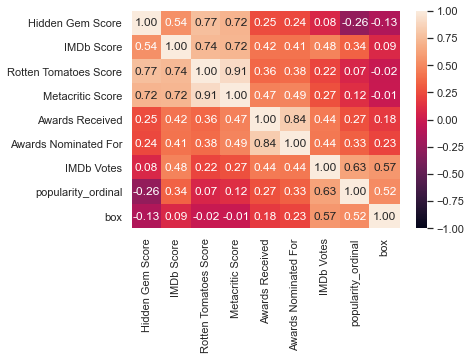

In [79]:
sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt="0.2f" )
#From the heatmap, we can determine that the variable "Awards received" has the hightest/strongest correlation with popularity

In [80]:
#Partition both datasets into Train (1616 rows) and Test (600 rows) sets.
#Train datasets (check both have 1616 rows)
#Test datasets  (check both have 600 rows)
popularity_ordinal_train = pd.DataFrame(df['popularity_ordinal'][:1616])
popularity_ordinal_test = pd.DataFrame(df['popularity_ordinal'][-600:])

Boxoffice_train = pd.DataFrame(df['box'][:1616])
Boxoffice_test = pd.DataFrame(df['box'][-600:])

AwardsReceived_train = pd.DataFrame(df['Awards Received'][:1616])
AwardsReceived_test = pd.DataFrame(df['Awards Received'][-600:])

AwardsNominated_train = pd.DataFrame(df['Awards Nominated For'][:1616])
AwardsNominated_test = pd.DataFrame(df['Awards Nominated For'][-600:])


print("Train Set :", popularity_ordinal_train.shape, Boxoffice_train.shape, AwardsReceived_train.shape, AwardsNominated_train.shape )
print("Test Set  :", popularity_ordinal_test.shape, Boxoffice_test.shape, AwardsReceived_test.shape, AwardsNominated_test.shape)

Train Set : (1616, 1) (1616, 1) (1616, 1) (1616, 1)
Test Set  : (600, 1) (600, 1) (600, 1) (600, 1)


In [81]:
#Import the LinearRegression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

linregbf = LinearRegression()
linregar = LinearRegression()
linreganf = LinearRegression()

In [82]:
#Fit Linear Regression model on popularity_ordinal_train and others_train
linregbf.fit(Boxoffice_train, popularity_ordinal_train )
linregar.fit(AwardsReceived_train, popularity_ordinal_train )
linreganf.fit(AwardsNominated_train, popularity_ordinal_train )

LinearRegression()

In [83]:
#Print the coefficients of the Linear Regression model you just fit
print("The intercept and coefficients of boxoffice against popularity linear regression model :")
print('Intercept \t: b = ', linregbf.intercept_)
print('Coefficients \t: a = ', linregbf.coef_)

The intercept and coefficients of boxoffice against popularity linear regression model :
Intercept 	: b =  [3.5027325]
Coefficients 	: a =  [[5.73536607e-09]]


In [84]:
#Print the coefficients of the Linear Regression model you just fit
print("The intercept and coefficients of AwardsReceived against popularity linear regression model :")
print('Intercept \t: b = ', linregar.intercept_)
print('Coefficients \t: a = ', linregar.coef_)

The intercept and coefficients of AwardsReceived against popularity linear regression model :
Intercept 	: b =  [3.72505626]
Coefficients 	: a =  [[0.0102304]]


In [85]:
#Print the coefficients of the Linear Regression model you just fit
print("The intercept and coefficients of AwardsNominated against popularity linear regression model :")
print('Intercept \t: b = ', linreganf.intercept_)
print('Coefficients \t: a = ', linreganf.coef_)

The intercept and coefficients of AwardsNominated against popularity linear regression model :
Intercept 	: b =  [3.6555089]
Coefficients 	: a =  [[0.0075651]]


## Plot the Regression line on a Scatterplot

popularity_ordinal + boxoffice


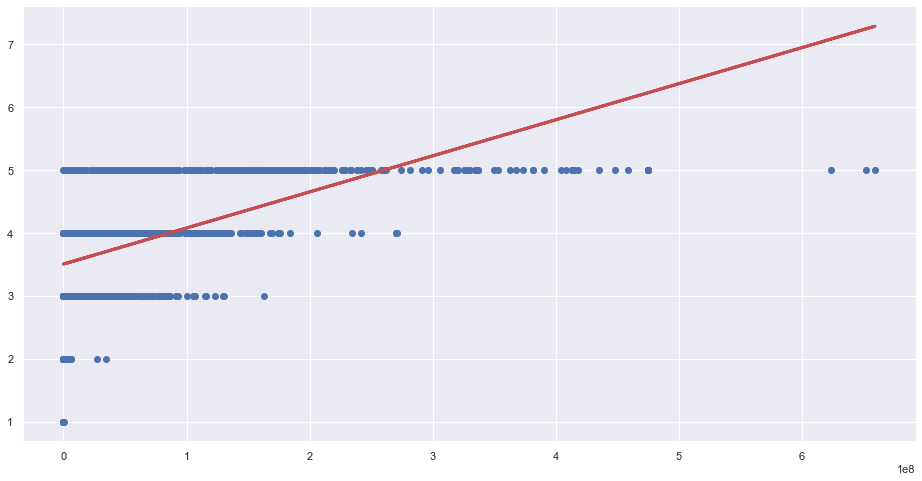

In [86]:
# Formula for the Regression line
regline_linregbf_x = Boxoffice_train
regline_linregbf_y = linregbf.intercept_ + linregbf.coef_ * Boxoffice_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(Boxoffice_train, popularity_ordinal_train)
plt.plot(regline_linregbf_x, regline_linregbf_y, 'r-', linewidth = 3)
print('popularity_ordinal + boxoffice')
plt.show()

popularity_ordinal + AwardsReceived


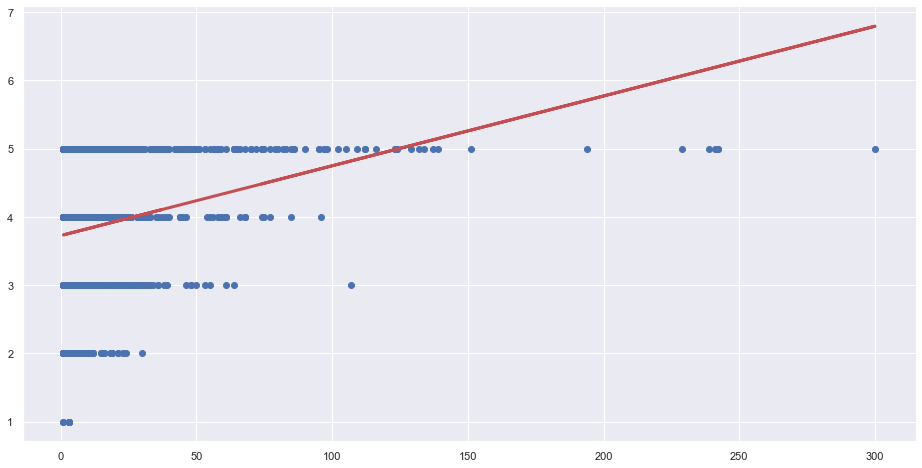

In [87]:
# Formula for the Regression line
regline_linregar_x = AwardsReceived_train
regline_linregar_y = linregar.intercept_ + linregar.coef_ * AwardsReceived_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(AwardsReceived_train, popularity_ordinal_train)
plt.plot(regline_linregar_x, regline_linregar_y, 'r-', linewidth = 3)
print('popularity_ordinal + AwardsReceived')
plt.show()

popularity_ordinal + AwardsNominated


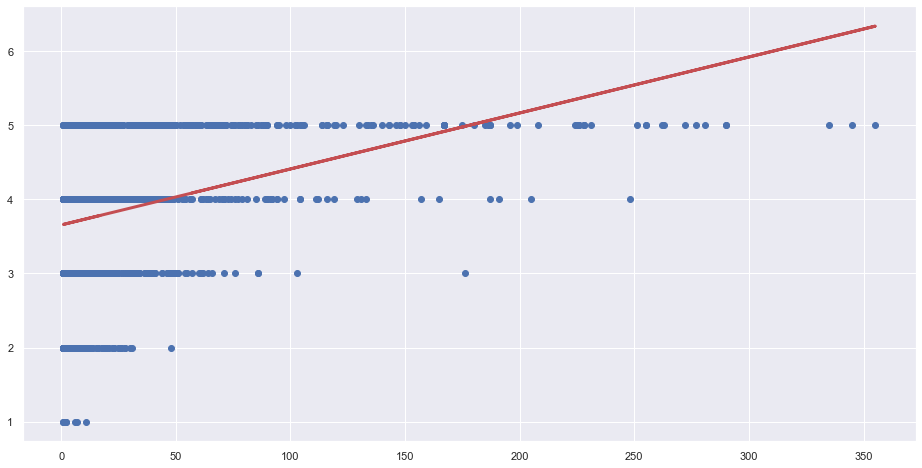

In [88]:
# Formula for the Regression line
regline_linreganf_x = AwardsNominated_train
regline_linreganf_y = linreganf.intercept_ + linreganf.coef_ * AwardsNominated_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(AwardsNominated_train, popularity_ordinal_train)
plt.plot(regline_linreganf_x, regline_linreganf_y, 'r-', linewidth = 3)
print('popularity_ordinal + AwardsNominated')
plt.show()

## Predict popularity using train and test dataset

Boxoffice train dataset


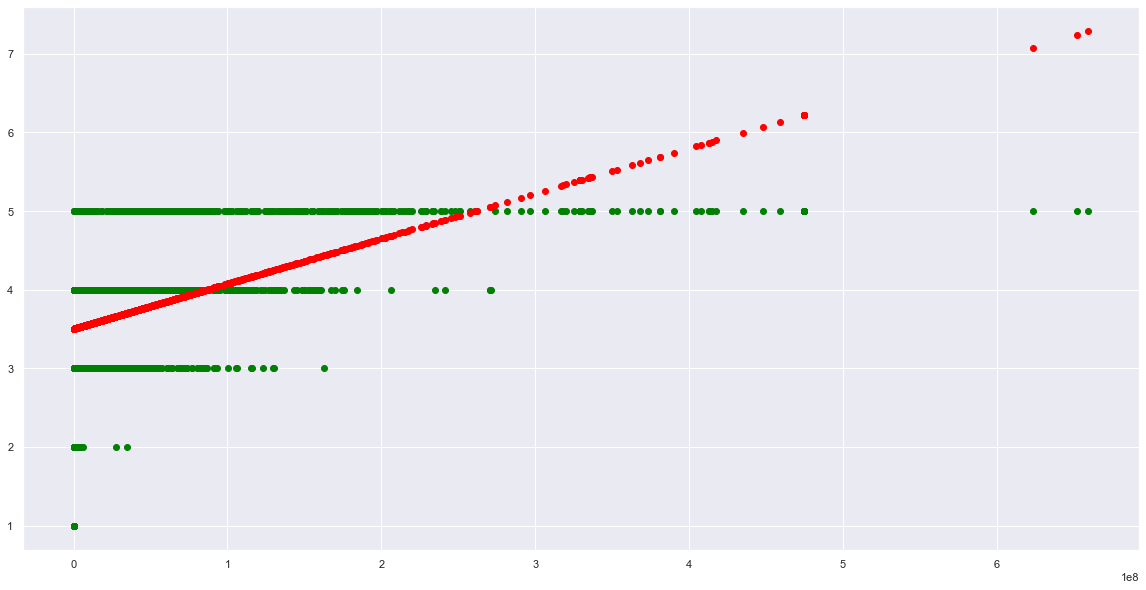

In [89]:
#Predict using train and test dataset
popularity_ordinal_train_pred = linregbf.predict(Boxoffice_train)
popularity_ordinal_test_pred = linregbf.predict(Boxoffice_test)

f, axes = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(Boxoffice_train, popularity_ordinal_train, color = "green")
plt.scatter(Boxoffice_train, popularity_ordinal_train_pred, color = "red")
print('Boxoffice train dataset')
plt.show()

Boxoffice test dataset


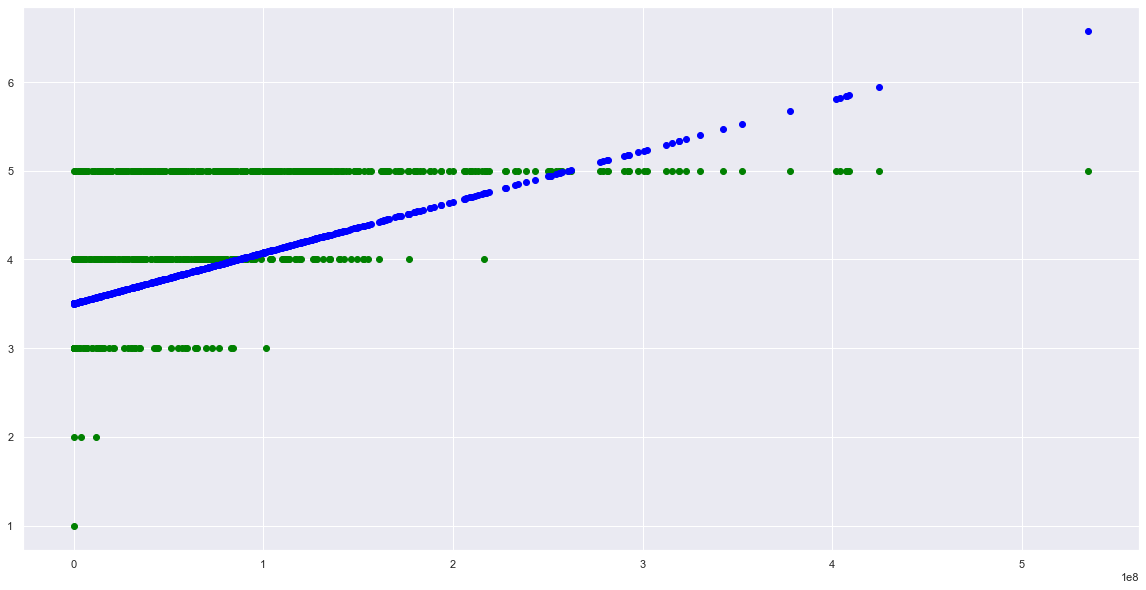

In [90]:
f, axes = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(Boxoffice_test, popularity_ordinal_test, color = "green")
plt.scatter(Boxoffice_test, popularity_ordinal_test_pred, color="blue")
print('Boxoffice test dataset')
plt.show()

AwardsReceived train dataset


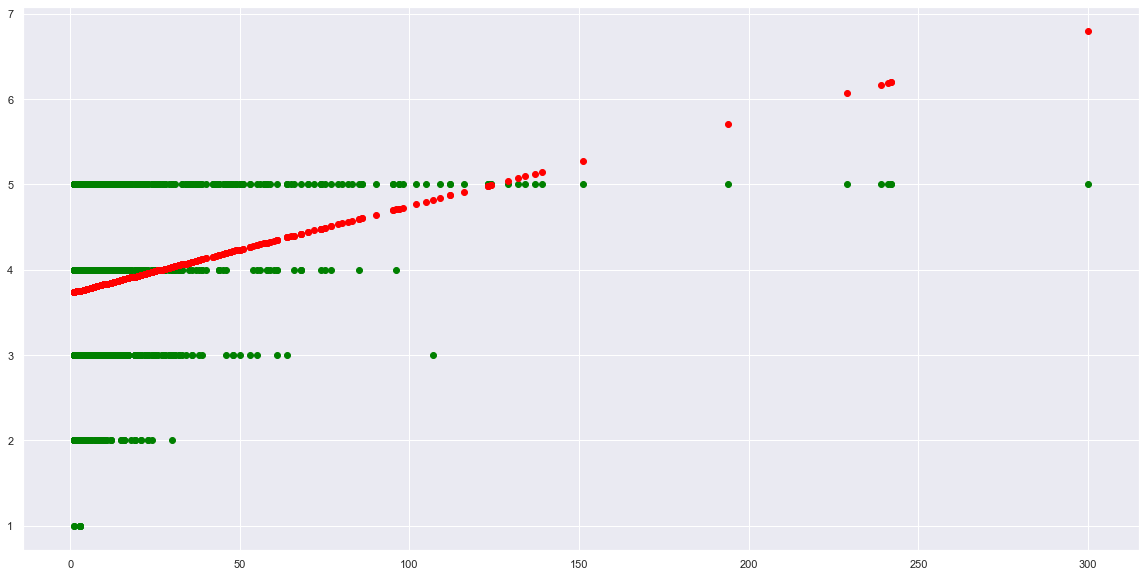

In [91]:
popularity_ordinal_train_pred = linregar.predict(AwardsReceived_train)
popularity_ordinal_test_pred = linregar.predict(AwardsReceived_test)

f, axes = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(AwardsReceived_train, popularity_ordinal_train, color = "green")
plt.scatter(AwardsReceived_train, popularity_ordinal_train_pred, color = "red")
print('AwardsReceived train dataset')
plt.show()

AwardsReceived test dataset


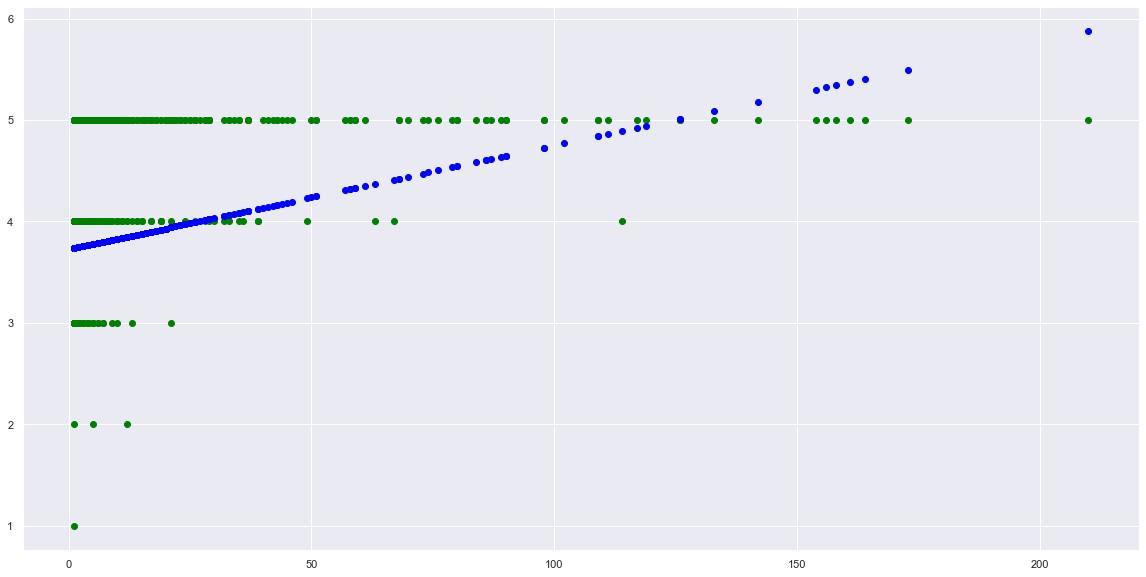

In [92]:
f, axes = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(AwardsReceived_test, popularity_ordinal_test, color = "green")
plt.scatter(AwardsReceived_test, popularity_ordinal_test_pred, color="blue")
print('AwardsReceived test dataset')
plt.show()

AwardsNominated train dataset


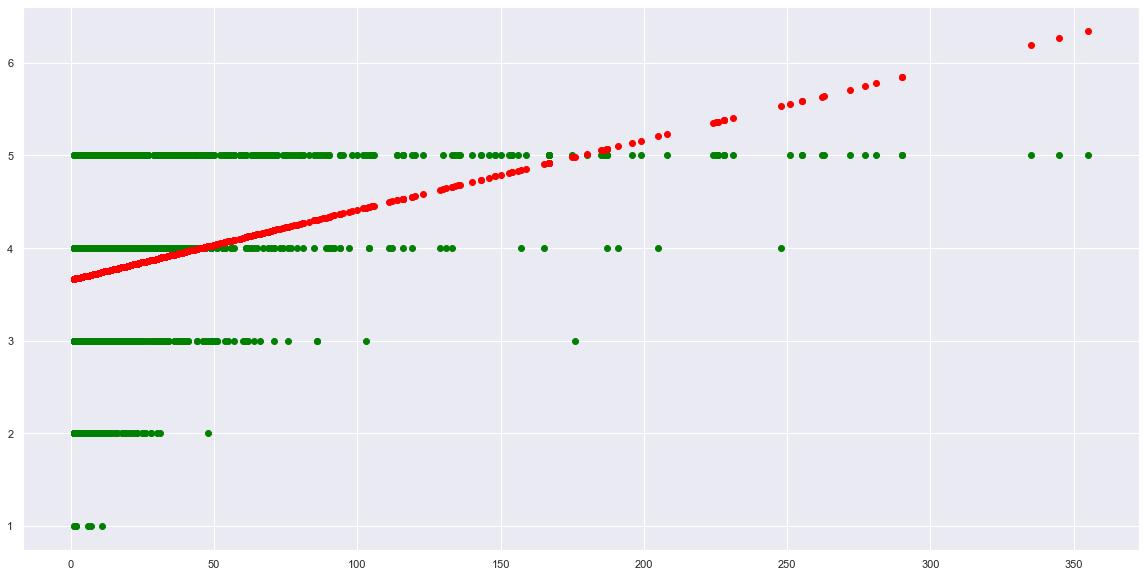

In [93]:
popularity_ordinal_train_pred = linreganf.predict(AwardsNominated_train)
popularity_ordinal_test_pred = linreganf.predict(AwardsNominated_test)

f, axes = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(AwardsNominated_train, popularity_ordinal_train, color = "green")
plt.scatter(AwardsNominated_train, popularity_ordinal_train_pred, color = "red")
print('AwardsNominated train dataset')
plt.show()

AwardsNominated test dataset


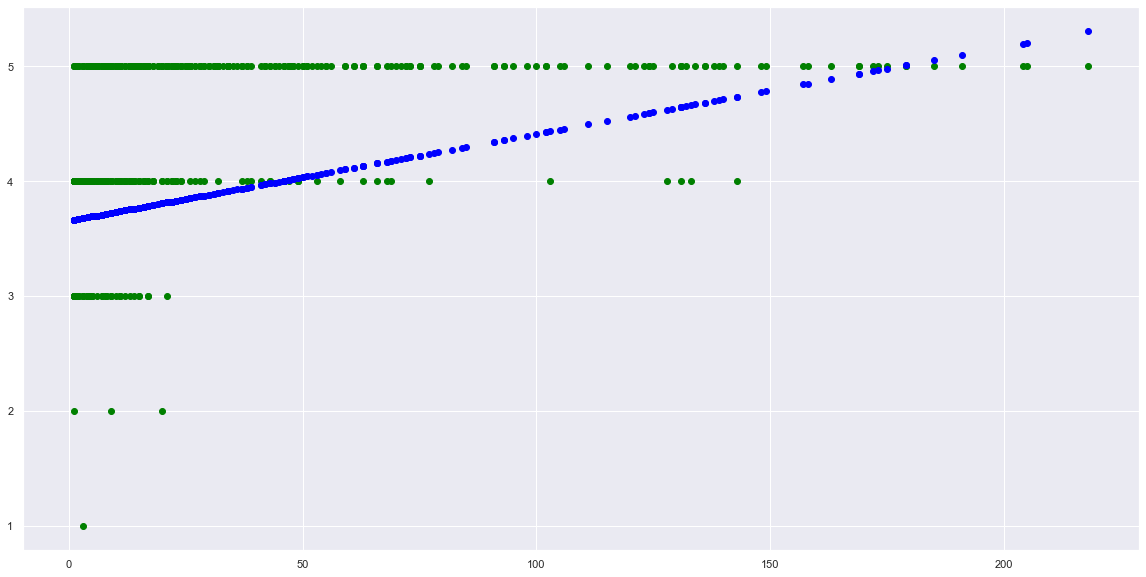

In [94]:
f, axes = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(AwardsNominated_test, popularity_ordinal_test, color = "green")
plt.scatter(AwardsNominated_test, popularity_ordinal_test_pred, color="blue")
print('AwardsNominated test dataset')
plt.show()

## Actual values of popularity against the predicted values of popularity


In [95]:
# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


msebf = mean_sq_err(Boxoffice_train, popularity_ordinal_train_pred)
msebftest = mean_sq_err(Boxoffice_test ,popularity_ordinal_test_pred)
print("Mean Squared Error (MSE) of Boxoffice Train \t:", msebf)
print("Mean Squared Error (MSE) of Boxoffice Test \t:", msebftest)

# Explained Variance (R^2)
print("Explained Variance (R^2) of Boxoffice Train \t:", linregbf.score(Boxoffice_train, popularity_ordinal_train))
print("Explained Variance (R^2) of Boxoffice Test \t:", linregbf.score(Boxoffice_test, popularity_ordinal_test))

Mean Squared Error (MSE) of Boxoffice Train 	: 1.1253103671786608e+16
Mean Squared Error (MSE) of Boxoffice Test 	: 1.4577230237200404e+16
Explained Variance (R^2) of Boxoffice Train 	: 0.2832598654391807
Explained Variance (R^2) of Boxoffice Test 	: -0.2797917517843296


In [96]:
# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


msear = mean_sq_err(AwardsReceived_train, popularity_ordinal_train_pred)
mseartest = mean_sq_err(AwardsReceived_test ,popularity_ordinal_test_pred)
print("Mean Squared Error (MSE) of AwardsReceived Train \t:", msear)
print("Mean Squared Error (MSE) of AwardsReceived Test \t:", mseartest)

# Explained Variance (R^2)
print("Explained Variance (R^2) of AwardsReceived Train \t:", linregar.score(AwardsReceived_train, popularity_ordinal_train))
print("Explained Variance (R^2) of AwardsReceived Test \t:", linregar.score(AwardsReceived_test, popularity_ordinal_test))

Mean Squared Error (MSE) of AwardsReceived Train 	: 683.0825135051431
Mean Squared Error (MSE) of AwardsReceived Test 	: 887.521027555455
Explained Variance (R^2) of AwardsReceived Train 	: 0.07447873218719658
Explained Variance (R^2) of AwardsReceived Test 	: -0.6280955099645986


In [97]:
# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mseanf = mean_sq_err(AwardsNominated_train, popularity_ordinal_train_pred)
mseanftest = mean_sq_err(AwardsNominated_test ,popularity_ordinal_test_pred)
print("Mean Squared Error (MSE) of AwardsNominated Train \t:", mseanf)
print("Mean Squared Error (MSE) of AwardsNominated Test \t:", mseanftest)

# Explained Variance (R^2)
print("Explained Variance (R^2) of AwardsNominated Train \t:", linreganf.score(AwardsNominated_train, popularity_ordinal_train))
print("Explained Variance (R^2) of AwardsNominated Test \t:", linreganf.score(AwardsNominated_test, popularity_ordinal_test))

Mean Squared Error (MSE) of AwardsNominated Train 	: 2318.194113018973
Mean Squared Error (MSE) of AwardsNominated Test 	: 2131.4459514347045
Explained Variance (R^2) of AwardsNominated Train 	: 0.12098497685052767
Explained Variance (R^2) of AwardsNominated Test 	: -0.6027029887929138


#### Prediction of popularity

Let's predict the value of **popularity** for a few specific movies -- *One Chance*, *Lets Fight Ghost* and *The Closet* -- using the Regression Model derived above. 

In [98]:
# Extract movies for Prediction
pp_pred = df[df["Title"].isin(["One Chance", "Lets Fight Ghost", "The Closet"])]
pp_pred

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
17          The Closet                                  Comedy   
9414        One Chance         Biography, Comedy, Drama, Music   

                                                   Tags Series or Movie  \
0     Comedy Programmes,Romantic TV Comedies,Horror ...          Series   
17                Korean Movies,Horror Movies,Mysteries           Movie   
9414  Dramas,Biographical Dramas,Dramas based on rea...           Movie   

      Hidden Gem Score         Director                 Writer  \
0                  4.3  Tomas Alfredson  John Ajvide Lindqvist   
17                 3.8    Francis Veber          Francis Veber   
9414               3.0    David Frankel         Justin Zackham   

                                                 Actors  IMDb Score  \
0     Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...         7.9   
17    Daniel Auteuil, Thierry Lhermitte, Michèle Lar...         7.0   
9414  Colm Meaney, James Corden, Julie Walters, Alex...         6.8   

      Rotten Tomatoes Score  Metacritic Score  Awards Received  \
0                      98.0              82.0             74.0   
17                     85.0              72.0              1.0   
9414                   63.0              52.0              3.0   

      Awards Nominated For   Boxoffice  \
0                     57.0  $2,122,065   
17                     1.0  $6,678,894   
9414                   5.0    $101,196   

                             Production House  IMDb Votes Popularity  \
0                   Canal+, Sandrew Metronome    205926.0  Excellent   
17                           Miramax, Gaumont     16657.0       Good   
9414  Relevant Entertainment, Weston Pictures     11536.0       Good   

      popularity_ordinal        box  
0                      5  2122065.0  
17                     3  6678894.0  
9414                   3   101196.0

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import ensemble
# Extract Response and Predictors'popularity_ordinal','Awards Received','Awards Nominated For','Boxoffice'
Y = pd.DataFrame(df['popularity_ordinal'])
X = pd.DataFrame(df[['Awards Received', 'Awards Nominated For', 'box']])
# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 600)
Y = Y.astype('int')
X = X.astype('int')

In [100]:
predictors = ['box', 'Awards Received', 'Awards Nominated For']

linreg1 = LinearRegression()         # create the linear regression object
linreg1.fit(X_train, Y_train)        # train the linear regression model
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pp_pred[predictors])

# Predict Response corresponding to Predictors
Y_pred = linreg1.predict(X_pred)
Y_pred

array([[-2071.12632103],
       [-6527.45367498],
       [  -95.38145494]])

In [101]:
# Summarize the Actuals, Predictions and Errors
Y_pred = pd.DataFrame(Y_pred, columns = ['predicted imdb votes'], index = pp_pred.index)
pp_acc = pd.concat([pp_pred[["Title", "IMDb Votes"]], Y_pred], axis = 1)

Y_errs = 100 * abs(pp_acc["IMDb Votes"] - pp_acc['predicted imdb votes']) / pp_acc["IMDb Votes"]
Y_errs = pd.DataFrame(Y_errs, columns = ["Error"], index = pp_pred.index)
pp_acc = pd.concat([pp_acc, Y_errs], axis = 1)

pp_acc

Title  IMDb Votes  predicted imdb votes       Error
0     Lets Fight Ghost    205926.0          -2071.126321  101.005762
17          The Closet     16657.0          -6527.453675  139.187451
9414        One Chance     11536.0            -95.381455  100.826816

#### Prediction Interval

The confidence on Prediction depends on the Distribution and Deviation of the Errors in Prediction.    
We obtain the Mean Squared Error on the Train Set while fitting/training the Linear Regression Model.    

The Standard Error of Prediction may be estimated as $StdE = \sqrt{\frac{n}{n-2} MSE}$ from the Train Set.

In [102]:
# Predict Response corresponding to Predictors
Y_train_pred = linreg1.predict(X_train)
Y_test_pred = linreg1.predict(X_test)

MSE_train = mean_squared_error(Y_train, Y_train_pred)
StdE_pred = np.sqrt(len(Y_train) * MSE_train/(len(Y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 0.56
Pred Standard Error (SE) 	: 0.75


In [103]:
Y_95l = pd.DataFrame(pp_acc["predicted imdb votes"] - 1.96*StdE_pred).rename(columns = {"predicted imdb votes" : "95 Lower"})
Y_95u = pd.DataFrame(pp_acc["predicted imdb votes"] + 1.96*StdE_pred).rename(columns = {"predicted imdb votes" : "95 Upper"})
Y_99l = pd.DataFrame(pp_acc["predicted imdb votes"] - 2.58*StdE_pred).rename(columns = {"predicted imdb votes" : "99 Lower"})
Y_99u = pd.DataFrame(pp_acc["predicted imdb votes"] + 2.58*StdE_pred).rename(columns = {"predicted imdb votes" : "99 Upper"})

mv_int = pd.concat([pp_acc, Y_95l, Y_95u, Y_99l, Y_99u], axis = 1)
mv_int

Title  IMDb Votes  predicted imdb votes       Error  \
0     Lets Fight Ghost    205926.0          -2071.126321  101.005762   
17          The Closet     16657.0          -6527.453675  139.187451   
9414        One Chance     11536.0            -95.381455  100.826816   

         95 Lower     95 Upper     99 Lower     99 Upper  
0    -2072.594753 -2069.657890 -2073.059256 -2069.193386  
17   -6528.922107 -6525.985243 -6529.386610 -6525.520740  
9414   -96.849886   -93.913023   -97.314390   -93.448520

# Random forest regressor model

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import ensemble

# Extract Response and Predictors'popularity_ordinal','Awards Received','Awards Nominated For','Boxoffice'
Y = pd.DataFrame(df['popularity_ordinal'])
X = pd.DataFrame(df[['Awards Received', 'Awards Nominated For', 'box']])
# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 600)

In [105]:
#instantiate the regressor
rf = RandomForestRegressor(random_state=42)

#fit the model to training set data
rfModel = rf.fit(X_train, Y_train.values.ravel())

In [106]:
#do prediction using test data
Y_pred_r = rfModel.predict(X_test)

In [107]:
#calculate the performance of the model
mae_r = mean_absolute_error(Y_test, Y_pred_r)
mse_r = mean_squared_error(Y_test, Y_pred_r)

print(f"mae_r: {mae_r},\nmse_r:{mse_r}")

mae_r: 0.5094,
mse_r:0.43253866666666674


In [108]:
#accuracy on test
print("Training accuracy is: ", rf.score(X_train, Y_train.values.ravel()))
print("Testing accuracy is: ", rf.score(X_test, Y_test.values.ravel()))

Training accuracy is:  0.9283593063861487
Testing accuracy is:  0.4989319226165192


In [109]:
#gradient boosting classifier
gb = ensemble.GradientBoostingClassifier(n_estimators=40)
gb.fit(X_train, Y_train.values.ravel())
gb.score(X_test, Y_test.values.ravel())

0.5833333333333334

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()
rfc1.fit(X_train, Y_train.values.ravel())

RandomForestClassifier()

In [111]:
Y_predi = rfc1.predict(X_test)
rfc1.score(X_train, Y_train.values.ravel())

1.0

In [112]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_predi)
cm1

array([[  0,   1,   2,   0,   0],
       [  1,  10,  19,   2,   0],
       [  0,  13,  71,  45,  13],
       [  0,   0,  48,  90,  64],
       [  0,   0,  17,  58, 146]], dtype=int64)

Text(66.5, 0.5, 'Truth')

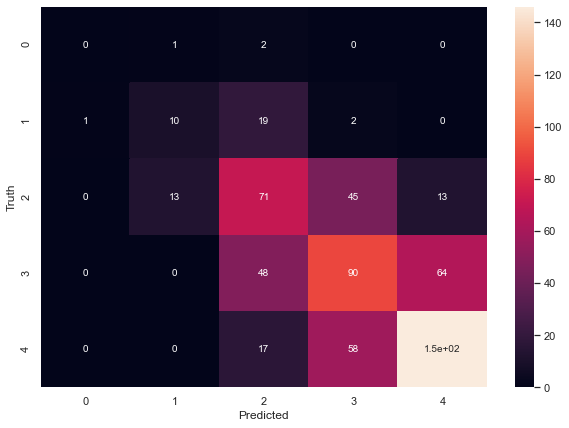

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


## Multi-Variate Linear Regression

Let us set up another Multi-Variate Linear Regression problem.   

Response Variable : **IMDB Votes**     
Predictor Feature : **Awards Received, Awards Nominated For, Boxoffice**       

Intercept of Regression 	: b =  [36457.67867228]
Coefficients of Regression 	: a =  [[2.53304824e+03 6.09956956e+02 1.45034788e-03]]

             Predictors  Coefficients
0       Awards Received   2533.048240
1  Awards Nominated For    609.956956
2                   box      0.001450



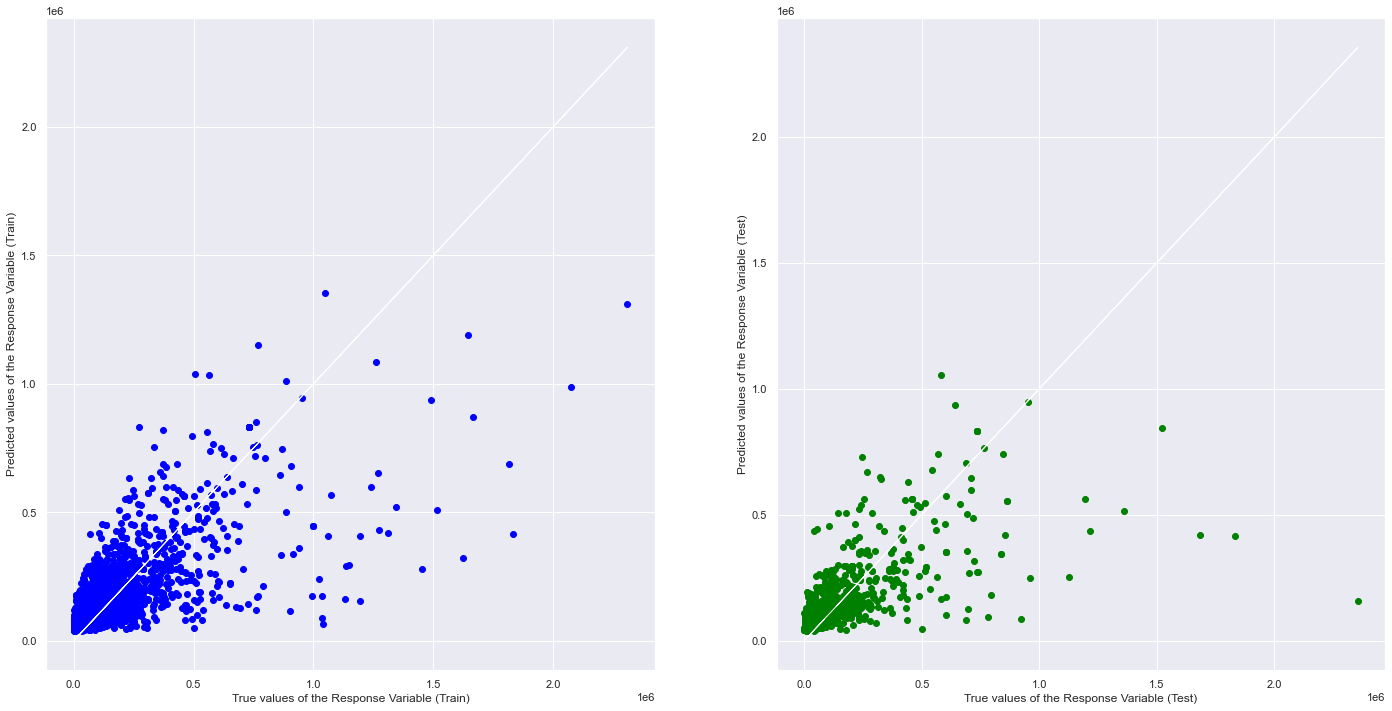

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47644320373755067
Mean Squared Error (MSE) 	: 30417094311.401146

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3847491254319433
Mean Squared Error (MSE) 	: 39276933885.97802



In [114]:
# Extract Response and Predictors'IMDb Votes','Awards Received','Awards Nominated For','Boxoffice'
Y = pd.DataFrame(df['IMDb Votes'])
X = pd.DataFrame(df[['Awards Received','Awards Nominated For','box']])

# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 600)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, Y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
Y_train_pred = linreg.predict(X_train)
Y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Y_train, Y_train_pred, color = "blue")
axes[0].plot(Y_train, Y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Y_test, Y_test_pred, color = "green")
axes[1].plot(Y_test, Y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

# Linear Regression - predict IMDb Score using boxoffice, Rotten Tomatoes Score, Hidden Gem Score and Metacritic Score

In [115]:
data2 = df[['IMDb Score','Rotten Tomatoes Score','Metacritic Score','Hidden Gem Score']]
data2

IMDb Score  Rotten Tomatoes Score  Metacritic Score  Hidden Gem Score
0            7.9                   98.0              82.0               4.3
9            8.4                   68.0              59.0               3.5
10           6.5                   52.0              51.0               2.8
11           8.1                   96.0              85.0               4.4
17           7.0                   85.0              72.0               3.8
...          ...                    ...               ...               ...
9411         6.8                   45.0              48.0               2.7
9412         6.8                   36.0              48.0               2.5
9414         6.8                   63.0              52.0               3.0
9415         4.9                   25.0              45.0               2.0
9416         5.3                    2.0              22.0               1.3

[2216 rows x 4 columns]

In [116]:
imdb = pd.DataFrame(df['IMDb Score'])
rt = pd.DataFrame(df['Rotten Tomatoes Score'])
ms = pd.DataFrame(df['Metacritic Score'])
hg = pd.DataFrame(df['Hidden Gem Score'])

<AxesSubplot:>

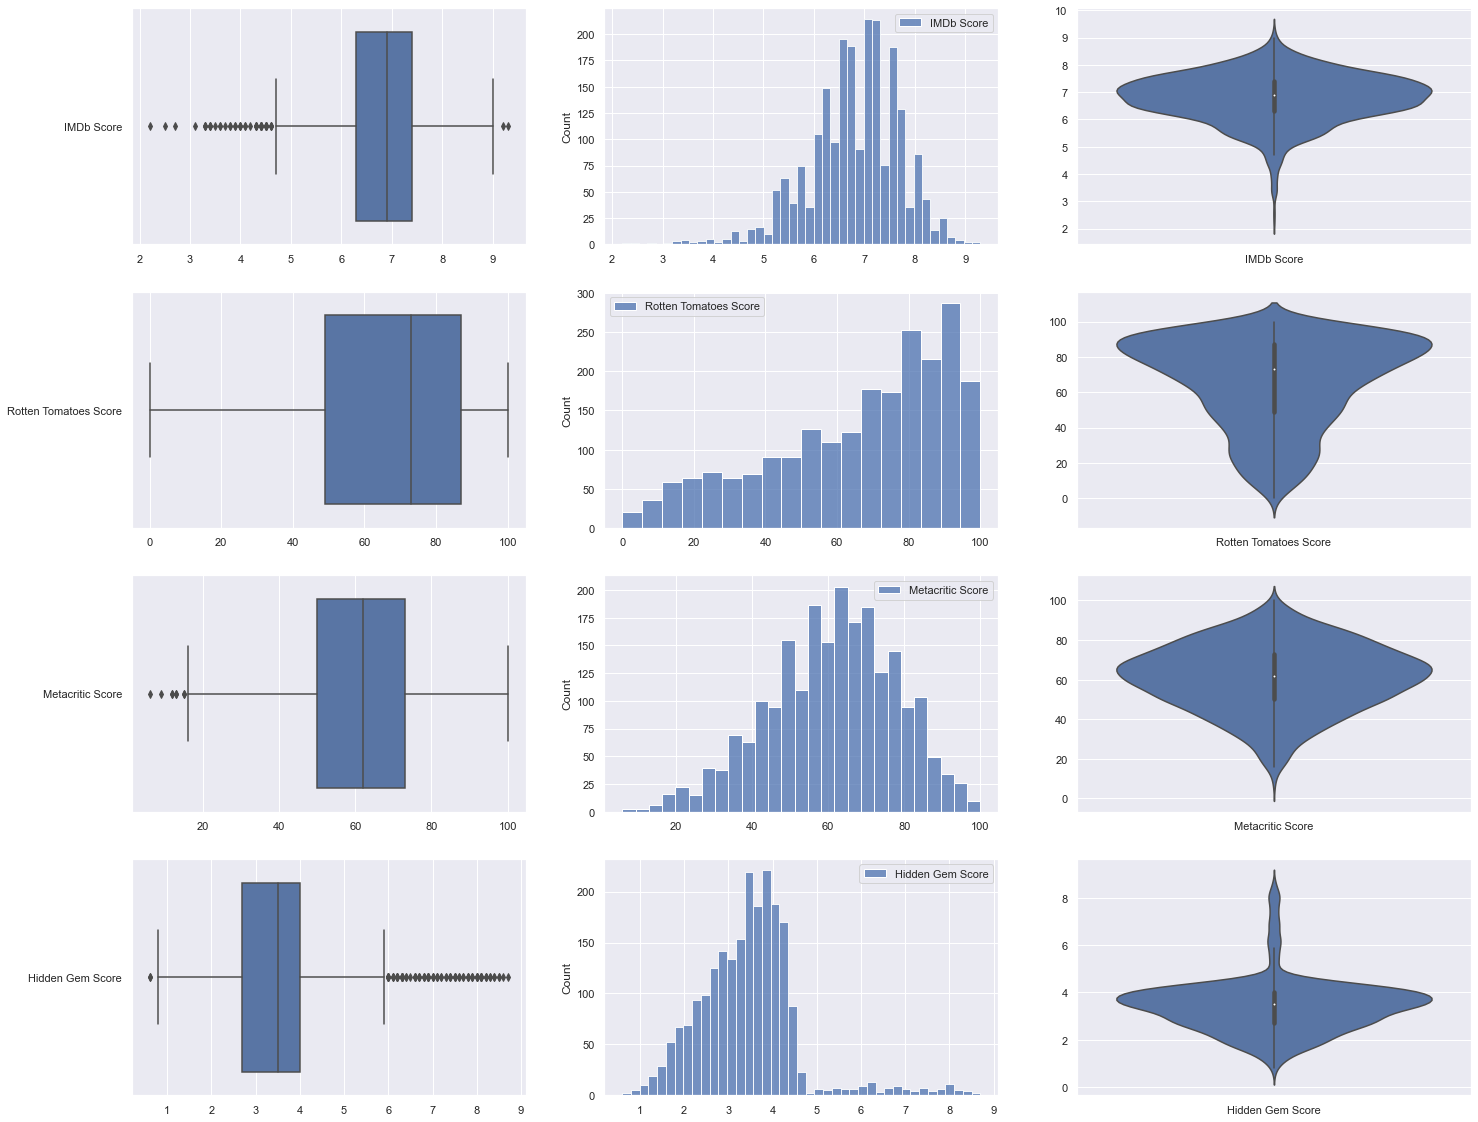

In [117]:
f, axes = plt.subplots(4, 3, figsize=(24, 20))

sb.boxplot(data=imdb, orient = "h", ax = axes[0,0])
sb.histplot(data=imdb, ax = axes[0,1])
sb.violinplot(data=imdb, ax = axes[0,2])

sb.boxplot(data=rt, orient = "h", ax = axes[1,0])
sb.histplot(data=rt, ax = axes[1,1])
sb.violinplot(data=rt, ax = axes[1,2])

sb.boxplot(data=ms, orient = "h", ax = axes[2,0])
sb.histplot(data=ms, ax = axes[2,1])
sb.violinplot(data=ms, ax = axes[2,2])

sb.boxplot(data=hg, orient = "h", ax = axes[3,0])
sb.histplot(data=hg, ax = axes[3,1])
sb.violinplot(data=hg, ax = axes[3,2])

#The variable Hidden Gem Score has the most "Normal" looking distribution, the variable Awards received has the maximum outliers

In [118]:
data2.describe()

IMDb Score  Rotten Tomatoes Score  Metacritic Score  Hidden Gem Score
count  2216.000000            2216.000000       2216.000000       2216.000000
mean      6.795939              66.033394         61.089350          3.435514
std       0.905026              25.138744         16.895514          1.152251
min       2.200000               0.000000          6.000000          0.600000
25%       6.300000              49.000000         50.000000          2.700000
50%       6.900000              73.000000         62.000000          3.500000
75%       7.400000              87.000000         73.000000          4.000000
max       9.300000             100.000000        100.000000          8.700000

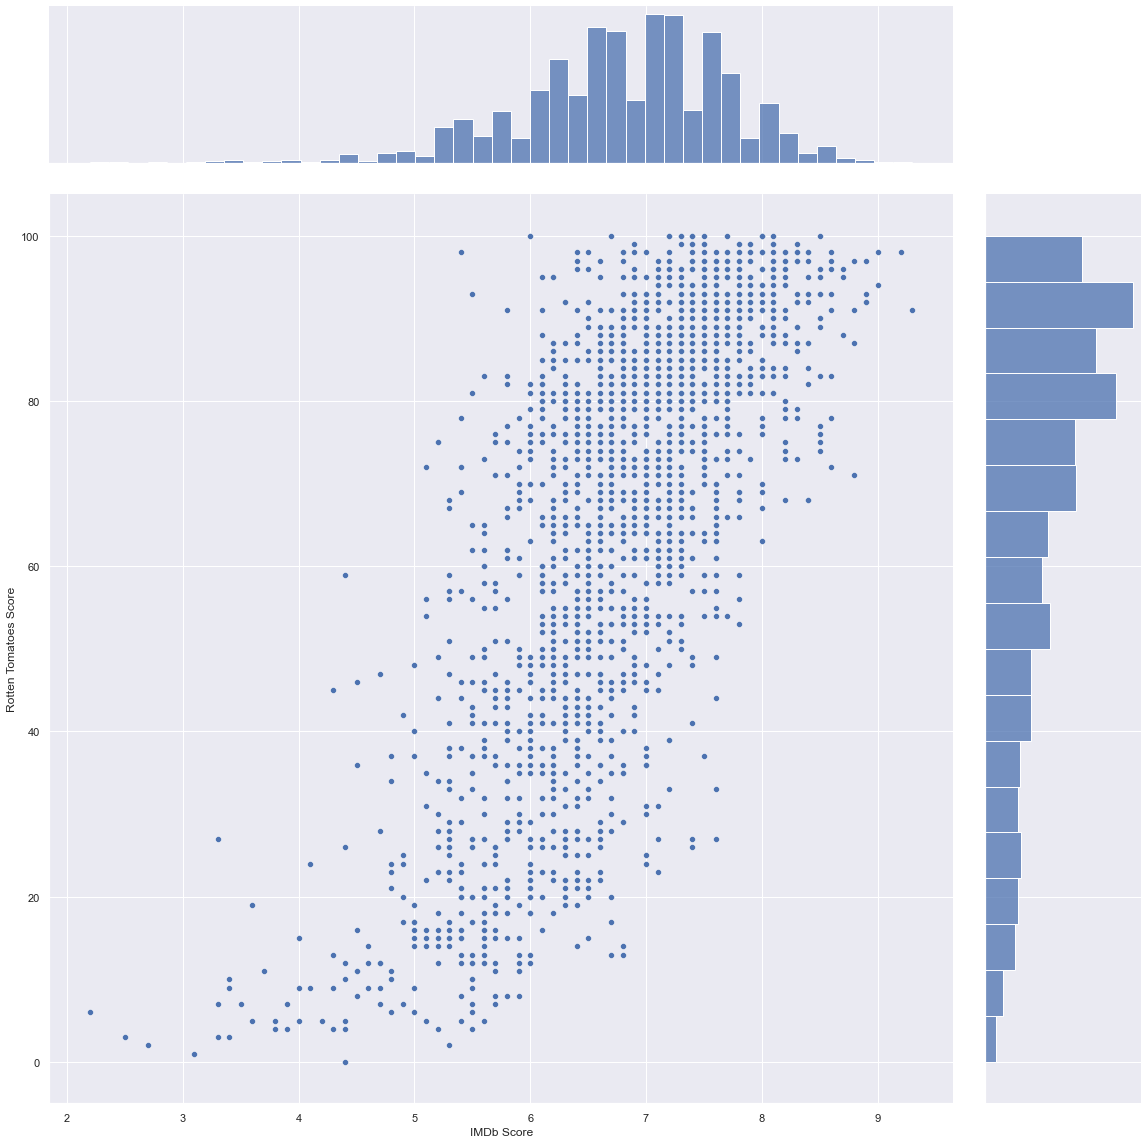

In [119]:
#Check the relationship amongst the variables using mutual jointplots and an overall pairplot
#Plot Rotten Tomatoes Score (y-axis) vs IMDb Score (x-axis) using jointplot
jointbp = pd.concat((rt, imdb),axis = 1).reindex(imdb.index)
sb.jointplot(data= jointbp, x= 'IMDb Score', y='Rotten Tomatoes Score',height=16)

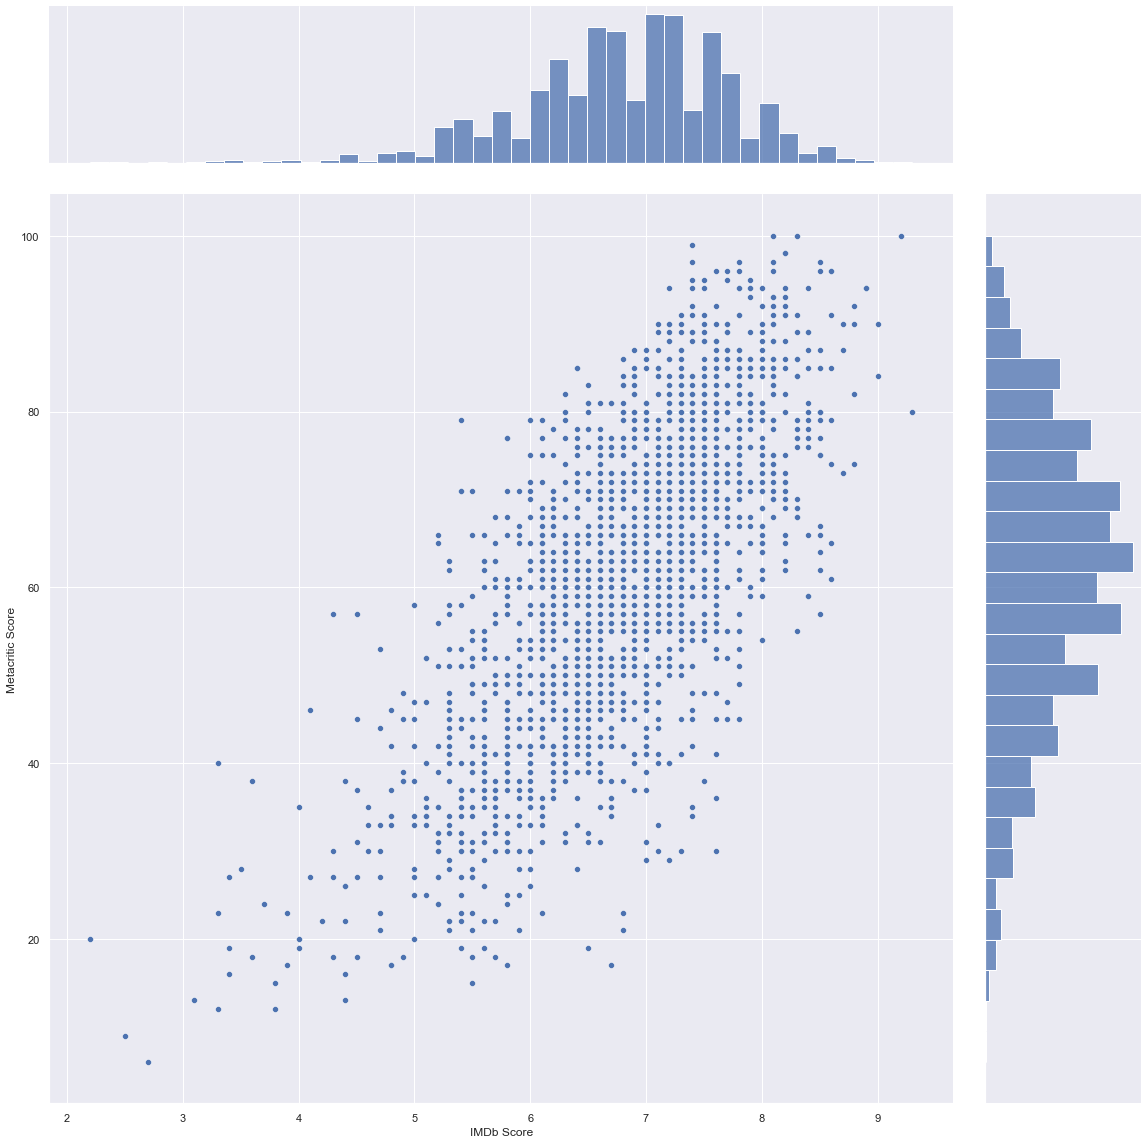

In [120]:
#Check the relationship amongst the variables using mutual jointplots and an overall pairplot
#Plot Metacritic Score (y-axis) vs IMDb Score (x-axis) using jointplot
jointbp = pd.concat((ms, imdb),axis = 1).reindex(imdb.index)
sb.jointplot(data= jointbp, x= 'IMDb Score', y='Metacritic Score',height=16)

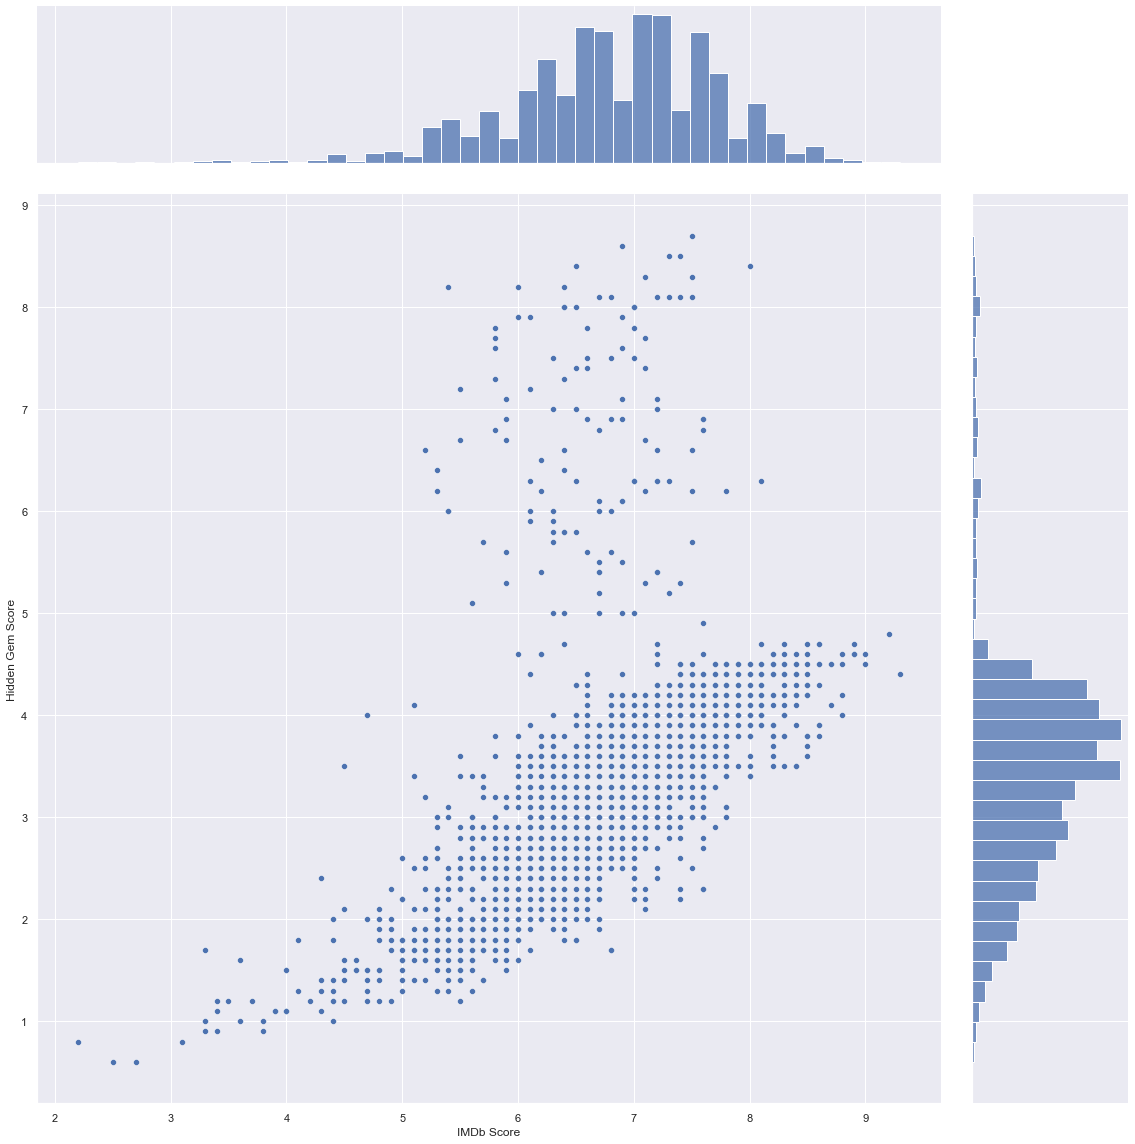

In [121]:
#Check the relationship amongst the variables using mutual jointplots and an overall pairplot
#Plot Hidden Gem Score (y-axis) vs IMDb Score (x-axis) using jointplot
jointbp = pd.concat((hg, imdb),axis = 1).reindex(imdb.index)
sb.jointplot(data= jointbp, x= 'IMDb Score', y='Hidden Gem Score',height=16)

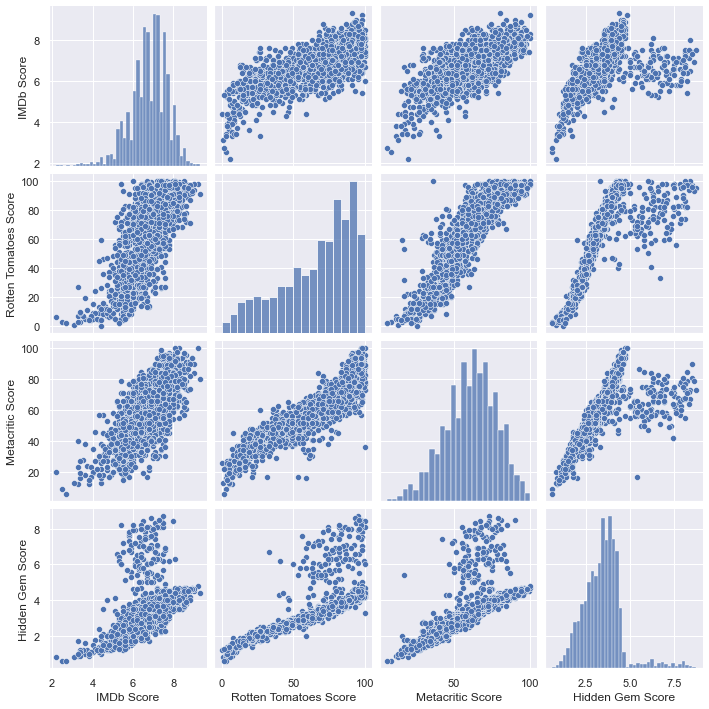

In [122]:
sb.pairplot(data=data2)

In [123]:
data2.corr()

IMDb Score  Rotten Tomatoes Score  Metacritic Score  \
IMDb Score               1.000000               0.740256          0.721707   
Rotten Tomatoes Score    0.740256               1.000000          0.907495   
Metacritic Score         0.721707               0.907495          1.000000   
Hidden Gem Score         0.540514               0.768338          0.715072   

                       Hidden Gem Score  
IMDb Score                     0.540514  
Rotten Tomatoes Score          0.768338  
Metacritic Score               0.715072  
Hidden Gem Score               1.000000

<AxesSubplot:>

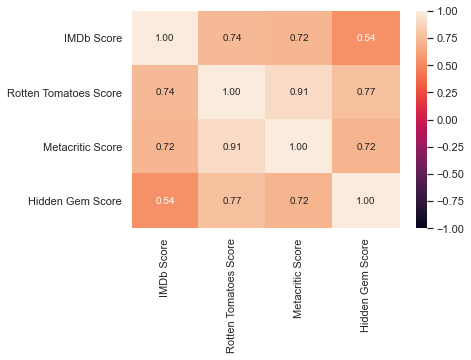

In [124]:
sb.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True, fmt="0.2f" )
#From the heatmap, we can determine that the variable "Rotten Tomatoes Score" has the hightest/strongest correlation with popularity

Intercept of Regression 	: b =  [4.78540977]
Coefficients of Regression 	: a =  [[ 0.01964643  0.01484826 -0.05879697]]

              Predictors  Coefficients
0  Rotten Tomatoes Score      0.019646
1       Metacritic Score      0.014848
2       Hidden Gem Score     -0.058797



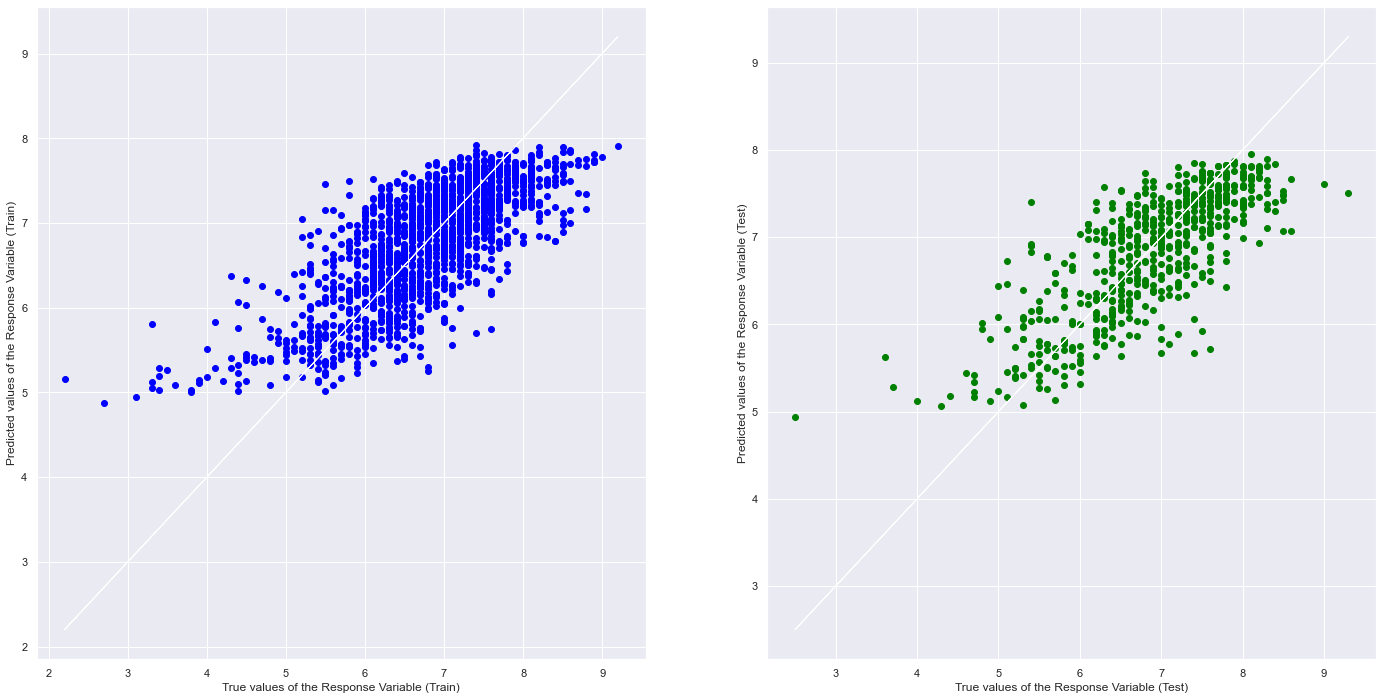

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5501803244473432
Mean Squared Error (MSE) 	: 0.36564988064703885

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6000471388851616
Mean Squared Error (MSE) 	: 0.3314382252142524



In [125]:
YY = pd.DataFrame(df['IMDb Score'])
XX = pd.DataFrame(df[['Rotten Tomatoes Score', 'Metacritic Score', 'Hidden Gem Score']])

# Split the Dataset into Train and Test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size = 600)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(XX_train, YY_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(XX_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
YY_train_pred = linreg.predict(XX_train)
YY_test_pred = linreg.predict(XX_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(YY_train, YY_train_pred, color = "blue")
axes[0].plot(YY_train, YY_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(YY_test, YY_test_pred, color = "green")
axes[1].plot(YY_test, YY_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(XX_train, YY_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(YY_train, YY_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(XX_test, YY_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(YY_test, YY_test_pred))
print()

#### Prediction of IMDb Score

Let's predict the value of **IMDb Score** for a few specific movies -- *One Chance*, *Lets Fight Ghost* and *The Closet* -- using the Regression Model derived above.   

In [126]:
# Extract movies for Prediction
mv_pred = df[df["Title"].isin(["One Chance", "Lets Fight Ghost", "The Closet"])]
mv_pred

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
17          The Closet                                  Comedy   
9414        One Chance         Biography, Comedy, Drama, Music   

                                                   Tags Series or Movie  \
0     Comedy Programmes,Romantic TV Comedies,Horror ...          Series   
17                Korean Movies,Horror Movies,Mysteries           Movie   
9414  Dramas,Biographical Dramas,Dramas based on rea...           Movie   

      Hidden Gem Score         Director                 Writer  \
0                  4.3  Tomas Alfredson  John Ajvide Lindqvist   
17                 3.8    Francis Veber          Francis Veber   
9414               3.0    David Frankel         Justin Zackham   

                                                 Actors  IMDb Score  \
0     Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...         7.9   
17    Daniel Auteuil, Thierry Lhermitte, Michèle Lar...         7.0   
9414  Colm Meaney, James Corden, Julie Walters, Alex...         6.8   

      Rotten Tomatoes Score  Metacritic Score  Awards Received  \
0                      98.0              82.0             74.0   
17                     85.0              72.0              1.0   
9414                   63.0              52.0              3.0   

      Awards Nominated For   Boxoffice  \
0                     57.0  $2,122,065   
17                     1.0  $6,678,894   
9414                   5.0    $101,196   

                             Production House  IMDb Votes Popularity  \
0                   Canal+, Sandrew Metronome    205926.0  Excellent   
17                           Miramax, Gaumont     16657.0       Good   
9414  Relevant Entertainment, Weston Pictures     11536.0       Good   

      popularity_ordinal        box  
0                      5  2122065.0  
17                     3  6678894.0  
9414                   3   101196.0

In [127]:
predictors = ['Rotten Tomatoes Score', 'Metacritic Score', 'Hidden Gem Score']

# Extract Predictors for Prediction
XX_pred = pd.DataFrame(mv_pred[predictors])

# Predict Response corresponding to Predictors
YY_pred = linreg.predict(XX_pred)
YY_pred

array([[7.67549036],
       [7.30100264],
       [6.61885354]])

In [128]:
# Summarize the Actuals, Predictions and Errors
YY_pred = pd.DataFrame(YY_pred, columns = ["pred IMDb Score"], index = mv_pred.index)
mv_acc = pd.concat([mv_pred[["Title", "IMDb Score"]], YY_pred], axis = 1)

YY_errs = 100 * abs(mv_acc["IMDb Score"] - mv_acc["pred IMDb Score"]) / mv_acc["IMDb Score"]
YY_errs = pd.DataFrame(YY_errs, columns = ["Error"], index = mv_pred.index)
mv_acc = pd.concat([mv_acc, YY_errs], axis = 1)

mv_acc

Title  IMDb Score  pred IMDb Score     Error
0     Lets Fight Ghost         7.9         7.675490  2.841894
17          The Closet         7.0         7.301003  4.300038
9414        One Chance         6.8         6.618854  2.663919

#### Prediction Interval

The confidence on Prediction depends on the Distribution and Deviation of the Errors in Prediction.    
We obtain the Mean Squared Error on the Train Set while fitting/training the Linear Regression Model.    

The Standard Error of Prediction may be estimated as $StdE = \sqrt{\frac{n}{n-2} MSE}$ from the Train Set.

In [129]:
MSE_train = mean_squared_error(YY_train, YY_train_pred)
StdE_pred = np.sqrt(len(YY_train) * MSE_train/(len(YY_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 0.37
Pred Standard Error (SE) 	: 0.61


In [130]:
YY_95l = pd.DataFrame(mv_acc["pred IMDb Score"] - 1.96*StdE_pred).rename(columns = {"pred IMDb Score" : "95 Lower"})
YY_95u = pd.DataFrame(mv_acc["pred IMDb Score"] + 1.96*StdE_pred).rename(columns = {"pred IMDb Score" : "95 Upper"})
YY_99l = pd.DataFrame(mv_acc["pred IMDb Score"] - 2.58*StdE_pred).rename(columns = {"pred IMDb Score" : "99 Lower"})
YY_99u = pd.DataFrame(mv_acc["pred IMDb Score"] + 2.58*StdE_pred).rename(columns = {"pred IMDb Score" : "99 Upper"})

mv_int = pd.concat([mv_acc, YY_95l, YY_95u, YY_99l, YY_99u], axis = 1)
mv_int

Title  IMDb Score  pred IMDb Score     Error  95 Lower  \
0     Lets Fight Ghost         7.9         7.675490  2.841894  6.489564   
17          The Closet         7.0         7.301003  4.300038  6.115076   
9414        One Chance         6.8         6.618854  2.663919  5.432927   

      95 Upper  99 Lower  99 Upper  
0     8.861417  6.114424  9.236557  
17    8.486929  5.739936  8.862069  
9414  7.804780  5.057787  8.179920

# Random forest regressor model

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import ensemble

# Extract Response and Predictors'IMDb Score','Rotten Tomatoes Score', 'Metacritic Score', 'Hidden Gem Score'
YY = pd.DataFrame(df['IMDb Score'])
XX = pd.DataFrame(df[['Rotten Tomatoes Score', 'Metacritic Score', 'Hidden Gem Score']])
YY = YY.astype('int')
XX = XX.astype('int')
# Split the Dataset into Train and Test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size = 600)

In [132]:
#instantiate the regressor and classifier
rf2 = RandomForestRegressor(random_state=42)
rfc = RandomForestClassifier()

#fit the model to training set data
rf2Model = rf2.fit(XX_train, YY_train.values.ravel())
rfc.fit(XX_train, YY_train.values.ravel())

RandomForestClassifier()

In [133]:
#do prediction using test data
YY_pred_r = rf2Model.predict(XX_test)

In [134]:
#calculate the performance of the model
mae_r = mean_absolute_error(YY_test, YY_pred_r)
mse_r = mean_squared_error(YY_test, YY_pred_r)

print(f"mae_r: {mae_r},\nmse_r:{mse_r}")

mae_r: 0.5376623472102515,
mse_r:0.49293985518775


In [135]:
#accuracy on test
print("Training accuracy is: ", rf2.score(XX_train, YY_train.values.ravel()))
print("Testing accuracy is: ", rf2.score(XX_test, YY_test.values.ravel()))

Training accuracy is:  0.8583470613484747
Testing accuracy is:  0.49457041825900594


In [136]:
#gradient boosting classifier
gb2 = ensemble.GradientBoostingClassifier(n_estimators=40)
gb2.fit(XX_train, YY_train.values.ravel())
gb2.score(XX_test, YY_test.values.ravel())

0.5383333333333333

In [137]:
YY_predi = rfc.predict(XX_test)

In [138]:
rfc.score(XX_train, YY_train.values.ravel())

0.879950495049505

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(YY_test, YY_predi)
cm

array([[  1,   1,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   2,   0,   0,   0,   0],
       [  0,   2,   1,   6,   4,   1,   0,   0],
       [  0,   0,   3,  35,  33,   4,   0,   0],
       [  0,   0,   0,  24, 121,  57,   3,   0],
       [  0,   0,   0,  10,  64, 151,  16,   1],
       [  0,   0,   0,   0,   7,  39,  10,   1],
       [  0,   0,   0,   0,   0,   1,   0,   0]], dtype=int64)

Text(66.5, 0.5, 'Truth')

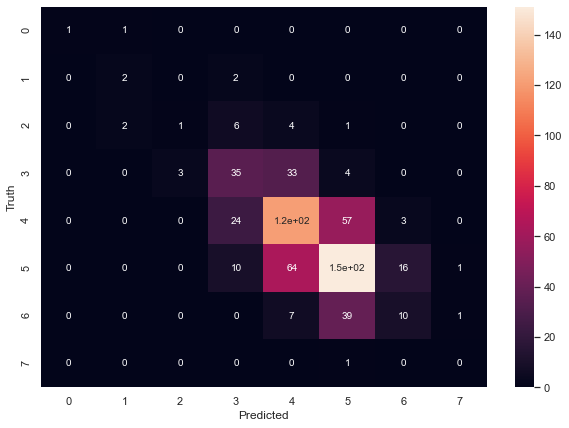

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [141]:
data3 = pd.read_csv('netflix1.csv')
data3.head()

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2     The Con-Heartist                         Comedy, Romance   
3         Gleboka woda                                   Drama   
4        Only a Mother                                   Drama   

                                                Tags Series or Movie  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...          Series   
1       Dramas,Comedies,Films Based on Books,British           Movie   
2  Romantic Comedies,Comedies,Romantic Films,Thai...           Movie   
3   TV Dramas,Polish TV Shows,Social Issue TV Dramas          Series   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Movie   

   Hidden Gem Score         Director  \
0               4.3  Tomas Alfredson   
1               7.0    Coky Giedroyc   
2               8.6    Mez Tharatorn   
3               8.7              NaN   
4               8.3      Alf Sjöberg   

                                              Writer  \
0                              John Ajvide Lindqvist   
1                                      Caitlin Moran   
2  Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...   
3                                                NaN   
4                                  Ivar Lo-Johansson   

                                              Actors  IMDb Score  \
0  Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...         7.9   
1  Cleo, Paddy Considine, Beanie Feldstein, Dónal...         5.8   
2  Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...         7.4   
3  Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...         7.5   
4  Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...         6.7   

   Rotten Tomatoes Score  ...  Awards Nominated For   Boxoffice  \
0                   98.0  ...                  57.0  $2,122,065   
1                   79.0  ...                   NaN     $70,632   
2                    NaN  ...                   NaN         NaN   
3                    NaN  ...                   4.0         NaN   
4                    NaN  ...                   1.0         NaN   

                         Production House  \
0               Canal+, Sandrew Metronome   
1  Film 4, Monumental Pictures, Lionsgate   
2                                     NaN   
3                                     NaN   
4                                     NaN   

                             Netflix Link  \
0  https://www.netflix.com/watch/81415947   
1  https://www.netflix.com/watch/81041267   
2  https://www.netflix.com/watch/81306155   
3  https://www.netflix.com/watch/81307527   
4  https://www.netflix.com/watch/81382068   

                               IMDb Link  \
0   https://www.imdb.com/title/tt1139797   
1   https://www.imdb.com/title/tt4193072   
2  https://www.imdb.com/title/tt13393728   
3   https://www.imdb.com/title/tt2300049   
4   https://www.imdb.com/title/tt0041155   

                                             Summary IMDb Votes  \
0  A med student with a supernatural gift tries t...   205926.0   
1  When nerdy Johanna moves to London, things get...     2838.0   
2  After her ex-boyfriend cons her out of a large...      131.0   
3  A group of social welfare workers led by their...       47.0   
4  An unhappily married farm worker struggling to...       88.0   

                                               Image  \
0  https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...   
1  https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...   
2  https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...   
3  https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...   
4  https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...   

                                              Poster  \
0  https://m.media-amazon.com/images/M/MV5BOWM4NT...   
1  https://m.media-amazon.com/images/M/MV5BZGUyN2...   
2  https://m.media-amazon.com/images/M/MV5BODAzOG...   
3  https://m.media-amazon.

In [142]:
# Python program to find the k most frequent words
# from data set
from collections import Counter
data4 = data3[['Director', 'Actors', 'Writer', 'Production House']]
data4 = data4.dropna()
data4

Director  \
0             Tomas Alfredson   
1               Coky Giedroyc   
6              David S. Goyer   
7              Hans Alfredson   
9               Todd Phillips   
...                       ...   
9415              Bill Condon   
9416      Julie Anne Robinson   
9417  Mark Davis, Noel Clarke   
9418            Géla Babluani   
9420              Gary Winick   

                                                 Actors  \
0     Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...   
1     Cleo, Paddy Considine, Beanie Feldstein, Dónal...   
6     Marcia Gay Harden, Margarita Levieva, Chris Ma...   
7     Maria Johansson, Hans Alfredson, Stellan Skars...   
9     Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...   
...                                                 ...   
9415  Taylor Lautner, Gil Birmingham, Sarah Clarke, ...   
9416  Katherine Heigl, John Leguizamo, Jason O'Mara,...   
9417  Tamsin Egerton, Shanika Warren-Markland, Ophel...   
9418  Jason Statham, Alice Barrett, Sam Riley, Gaby ...   
9420  Andy Serkis, Jennifer Garner, Mark Ruffalo, Ju...   

                                                 Writer  \
0                                 John Ajvide Lindqvist   
1                                         Caitlin Moran   
6                 Mats Wahl, Mick Davis, Christine Roum   
7                                        Hans Alfredson   
9     Bob Kane, Jerry Robinson, Bill Finger, Todd Ph...   
...                                                 ...   
9415                 Melissa Rosenberg, Stephenie Meyer   
9416  Stacy Sherman, Liz Brixius, Janet Evanovich, K...   
9417                                        Noel Clarke   
9418                          Géla Babluani, Greg Pruss   
9420                        Josh Goldsmith, Cathy Yuspa   

                                       Production House  
0                             Canal+, Sandrew Metronome  
1                Film 4, Monumental Pictures, Lionsgate  
6           Touchstone Pictures, Spyglass Entertainment  
7           Svensk Filmindustri, Svenska Filminstitutet  
9     Bron Studios, Creative Wealth Media Finance, D...  
...                                                 ...  
9415                                        Temple Hill  
9416  Lakeshore Entertainment, Sidney Kimmel Enterta...  
9417  Unstoppable Entertainment, Atlantic Swiss Prod...  
9418                                    Overnight Films  
9420       Revolution Studios, Thirteen Productions LLC  

[4304 rows x 4 columns]

In [143]:
Writer = data4['Writer']
from collections import Counter
cnt1 = Counter(data4['Writer'])
print(cnt1.most_common(10))

[('Woody Allen', 15), ('George Lucas', 12), ('Pedro Almodóvar', 12), ('Charles Chaplin', 10), ('Taylor Sheridan', 9), ('Steve Kloves, J.K. Rowling', 8), ('Javed Akhtar, Salim Khan, Farhan Akhtar', 8), ('John Hughes', 7), ('Luc Besson, Robert Mark Kamen', 7), ('Chase Palmer, Gary Dauberman, Stephen King, Cary Joji Fukunaga', 6)]


In [144]:
w_names = ['Woody Allen','George Lucas','Pedro Almodóvar','Charles Chaplin','Taylor Sheridan']
w_counts = ['15','12','12','10','9']

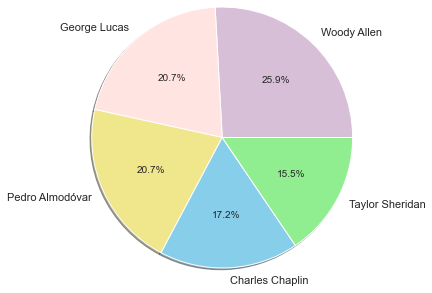

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.axis('equal')
cl = ['thistle','mistyrose','khaki','skyblue','lightgreen']
plt.pie(w_counts, labels = w_names, radius=1.5, autopct='%0.1f%%', shadow=True, colors=cl)
plt.show()

In [146]:
DR = data4['Director']
from collections import Counter
cnt1 = Counter(data4['Director'])
print(cnt1.most_common(5))

[('Steven Spielberg', 28), ('Woody Allen', 18), ('Ridley Scott', 17), ('Steven Soderbergh', 16), ('Clint Eastwood', 15)]


In [147]:
d_names = ['Steven Spielberg','Woody Allen','Ridley Scott','Steven Soderbergh','Clint Eastwood']
d_counts = ['28','18','17','16','15']

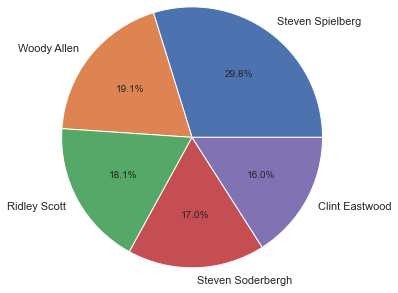

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.axis('equal')
plt.pie(d_counts, labels = d_names, radius=1.5, autopct='%0.1f%%')
plt.show()

# read the file and clean data

In [5]:
file="Netflix Dataset Latest 2021.xlsx"
df=pd.read_excel(file)
df = df.drop(df.columns[[-1, -2]], axis=1)  
df.head()

Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2     The Con-Heartist                         Comedy, Romance   
3         Gleboka woda                                   Drama   
4        Only a Mother                                   Drama   

                                                Tags Series or Movie  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...          Series   
1       Dramas,Comedies,Films Based on Books,British           Movie   
2  Romantic Comedies,Comedies,Romantic Films,Thai...           Movie   
3   TV Dramas,Polish TV Shows,Social Issue TV Dramas          Series   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Movie   

   Hidden Gem Score         Director  \
0               4.3  Tomas Alfredson   
1               7.0    Coky Giedroyc   
2               8.6    Mez Tharatorn   
3               8.7              NaN   
4               8.3      Alf Sjöberg   

                                              Writer  \
0                              John Ajvide Lindqvist   
1                                      Caitlin Moran   
2  Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...   
3                                                NaN   
4                                  Ivar Lo-Johansson   

                                              Actors  IMDb Score  \
0  Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...         7.9   
1  Cleo, Paddy Considine, Beanie Feldstein, Dónal...         5.8   
2  Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...         7.4   
3  Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...         7.5   
4  Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...         6.7   

   Rotten Tomatoes Score  Metacritic Score  Awards Received  \
0                   98.0              82.0             74.0   
1                   79.0              69.0              1.0   
2                    NaN               NaN              NaN   
3                    NaN               NaN              2.0   
4                    NaN               NaN              2.0   

   Awards Nominated For  Boxoffice                        Production House  \
0                  57.0  2122065.0               Canal+, Sandrew Metronome   
1                   NaN    70632.0  Film 4, Monumental Pictures, Lionsgate   
2                   NaN        NaN                                     NaN   
3                   4.0        NaN                                     NaN   
4                   1.0        NaN                                     NaN   

                               IMDb Link  IMDb Votes  
0   https://www.imdb.com/title/tt1139797    205926.0  
1   https://www.imdb.com/title/tt4193072      2838.0  
2  https://www.imdb.com/title/tt13393728       131.0  
3   https://www.imdb.com/title/tt2300049        47.0  
4   https://www.imdb.com/title/tt0041155        88.0

In [6]:
moviedata=df.loc[df['Series or Movie']=='Movie']#choose out the movie
moviedata.head()

Title                                     Genre  \
1  HOW TO BUILD A GIRL                                    Comedy   
2     The Con-Heartist                           Comedy, Romance   
4        Only a Mother                                     Drama   
5           Snowroller                                    Comedy   
6        The Invisible  Crime, Drama, Fantasy, Mystery, Thriller   

                                                Tags Series or Movie  \
1       Dramas,Comedies,Films Based on Books,British           Movie   
2  Romantic Comedies,Comedies,Romantic Films,Thai...           Movie   
4  Social Issue Dramas,Dramas,Movies Based on Boo...           Movie   
5  Sports Movies,Sports Comedies,Comedies,Swedish...           Movie   
6  Thriller Movies,Movies Based on Books,Supernat...           Movie   

   Hidden Gem Score        Director  \
1               7.0   Coky Giedroyc   
2               8.6   Mez Tharatorn   
4               8.3     Alf Sjöberg   
5               5.3     Lasse Åberg   
6               2.0  David S. Goyer   

                                              Writer  \
1                                      Caitlin Moran   
2  Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...   
4                                  Ivar Lo-Johansson   
5                            Lasse Åberg, Bo Jonsson   
6              Mats Wahl, Mick Davis, Christine Roum   

                                              Actors  IMDb Score  \
1  Cleo, Paddy Considine, Beanie Feldstein, Dónal...         5.8   
2  Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...         7.4   
4  Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...         6.7   
5  Lasse Åberg, Cecilia Walton, Eva Millberg, Jon...         6.6   
6  Marcia Gay Harden, Margarita Levieva, Chris Ma...         6.2   

   Rotten Tomatoes Score  Metacritic Score  Awards Received  \
1                   79.0              69.0              1.0   
2                    NaN               NaN              NaN   
4                    NaN               NaN              2.0   
5                    NaN               NaN              NaN   
6                   20.0              36.0              NaN   

   Awards Nominated For   Boxoffice  \
1                   NaN     70632.0   
2                   NaN         NaN   
4                   1.0         NaN   
5                   NaN         NaN   
6                   1.0  20578909.0   

                              Production House  \
1       Film 4, Monumental Pictures, Lionsgate   
2                                          NaN   
4                                          NaN   
5                                          NaN   
6  Touchstone Pictures, Spyglass Entertainment   

                               IMDb Link  IMDb Votes  
1   https://www.imdb.com/title/tt4193072      2838.0  
2  https://www.imdb.com/title/tt13393728       131.0  
4   https://www.imdb.com/title/tt0041155        88.0  
5   https://www.imdb.com/title/tt0090115      5926.0  
6   https://www.imdb.com/title/tt0435670     34738.0

In [7]:
moviedata_clean=moviedata.drop(['IMDb Link'],axis=1)
moviedata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 1 to 9423
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  7010 non-null   object 
 1   Genre                  6995 non-null   object 
 2   Tags                   6983 non-null   object 
 3   Series or Movie        7010 non-null   object 
 4   Hidden Gem Score       7001 non-null   float64
 5   Director               6845 non-null   object 
 6   Writer                 6594 non-null   object 
 7   Actors                 6942 non-null   object 
 8   IMDb Score             7002 non-null   float64
 9   Rotten Tomatoes Score  5291 non-null   float64
 10  Metacritic Score       3999 non-null   float64
 11  Awards Received        4245 non-null   float64
 12  Awards Nominated For   5107 non-null   float64
 13  Boxoffice              3672 non-null   float64
 14  Production House       4289 non-null   object 
 15  IMDb

In [8]:
#count different genre movies#
mgset=set(moviedata_clean['Genre'])
templ=[]
for i in mgset:
    i=str(i)
    temp=i.split(', ')
    templ=templ+temp
mgset=set(templ)
originset=['Talk-Show','Film-Noir','Reality-TV','Sci-Fi']
replaceset=['Talk_Show','Film_Noir','Reality_TV','Sci_Fi']
for a in originset:
    mgset.remove(a)
for a in replaceset:
    mgset.add(a)
mgset.remove('nan')#remove the first line in dataframe


#```````````````#
##print(mgset) #this line for test
#```````````````#


#set up empty dataframes for each genre
clmname=moviedata_clean.columns.values.tolist()#get the column name
for a in mgset:
    globals()[a]=pd.DataFrame(columns=clmname)  

#deliver lines to the empty dataframes
S=moviedata_clean['Genre']#S is the serie of movie genre
for i,v in S.items():
    templ=[]#initialize the temporary list
    v=str(v)
    v=v.split(', ')
    templ=templ+v
    entry=moviedata_clean.loc[[i]]
    for text in templ:
        if (text not in originset):
            for genre in mgset:
                if (text==genre):
                    globals()[genre]=pd.concat([globals()[genre],entry],ignore_index=True)
        if (text in originset):
            for a in range(4):
                if (text==originset[a]):
                    globals()[replaceset[a]]=pd.concat([globals()[replaceset[a]],entry],ignore_index=True)  


In [9]:
b_sdf=pd.DataFrame(columns=['genre','boxmean','scoremean'])#b_sdf means the boxoffice vs score dataframe

In [10]:
for name1 in mgset:
    name2=name1+'BS'#name2 is the d.f.
    globals()[name2]=globals()[name1]
    r=len(globals()[name2])
    for i in range(r):
        globals()[name2].drop(globals()[name2][np.isnan(globals()[name2]['Boxoffice'])].index, inplace=True)
        globals()[name2].drop(globals()[name2][np.isnan(globals()[name2]['Hidden Gem Score'])].index, inplace=True)
    meanbox=globals()[name2].mean()['Boxoffice']
    meansco=globals()[name2].mean()['Hidden Gem Score']
    b_sdf=b_sdf.append([{'genre':str(name1),'boxmean':meanbox,'scoremean':meansco}],ignore_index=True)
b_sdf.drop(b_sdf[np.isnan(b_sdf['boxmean'])].index, inplace=True)

In [11]:
Action

Title  \
0                                                     I   
1                                        The Mysterians   
4                                           Extreme Job   
7                                                   Red   
8                                            The Shadow   
...                                                 ...   
1692  Teenage Mutant Ninja Turtles II: The Secret of...   
1694                                               2012   
1695                                       3:10 to Yuma   
1696                                  One for the Money   
1697                             District 13: Ultimatum   

                                                  Genre  \
0                    Action, Adventure, Fantasy, Sci-Fi   
1                      Action, Family, Sci-Fi, Thriller   
4                                 Action, Comedy, Crime   
7                       Action, Comedy, Crime, Thriller   
8     Action, Adventure, Crime, Fantasy, Mystery, Th...   
...                                                 ...   
1692          Action, Adventure, Comedy, Family, Sci-Fi   
1694                          Action, Adventure, Sci-Fi   
1695                      Action, Crime, Drama, Western   
1696                    Action, Comedy, Crime, Thriller   
1697                            Action, Crime, Thriller   

                                                   Tags Series or Movie  \
0                                 Dramas,Swedish Movies           Movie   
1     Sci-Fi & Fantasy,Alien Sci-Fi,Japanese Movies,...           Movie   
4     Dark Comedies,Action & Adventure,Korean Movies...           Movie   
7     Dramas,Crime Movies,Crime Dramas,Indian Movies...           Movie   
8     Action & Adventure,Adventures,Crime Action & A...           Movie   
...                                                 ...             ...   
1692  Family Comedies,Family Sci-Fi & Fantasy,Childr...           Movie   
1694  Sci-Fi & Fantasy,Action Sci-Fi & Fantasy,Actio...           Movie   
1695  Westerns,Action Thrillers,Action & Adventure,F...           Movie   
1696  Romantic Comedies,Action Comedies,Comedies,Pol...           Movie   
1697  International Movies,Action Thrillers,French F...           Movie   

      Hidden Gem Score             Director  \
0                  2.8         George Lucas   
1                  7.1         Ishirô Honda   
4                  5.4      Byeong-heon Lee   
7                  3.4     Robert Schwentke   
8                  2.4      Russell Mulcahy   
...                ...                  ...   
1692               2.4     Michael Pressman   
1694               2.4      Roland Emmerich   
1695               4.0        James Mangold   
1696               1.3  Julie Anne Robinson   
1697               3.4  Patrick Alessandrin   

                                                 Writer  \
0                                          George Lucas   
1          Jôjirô Okami, Takeshi Kimura, Shigeru Kayama   
4                                          Se-yeong Bae   
7     Jon Hoeber, Erich Hoeber, Cully Hamner, Warren...   
8                         Walter B. Gibson, David Koepp   
...                                                 ...   
1692         Kevin Eastman, Todd W. Langen, Peter Laird   
1694                     Harald Kloser, Roland Emmerich   
1695  Elmore Leonard, Derek Haas, Michael Brandt, Ha...   
1696  Stacy Sherman, Liz Brixius, Janet Evanovich, K...   
1697                                         Luc Besson   

                                                 Actors  IMDb Score  \
0     Ewan McGregor, Natalie Portman, Jake Lloyd, Li...         6.5   
1     Akihiko Hirata, Yumi Shirakawa, Momoko Kôchi, ...         6.2   
4     Shin Ha-kyun, Lee Hanee, Myoung Gong, Joon-seo...         7.1   
7     Bruce Willis, Mary-Louise Parker, Jefferson Br...         7.0   
8     Penelope Ann Miller, John Lone, Peter Boyle, A...         6.1   
...                            

# the clustering of genres

KMeans(n_clusters=4)
[[93339049.2962138, 98778275.04390934], [40904732.83229814, 27769883.91202346, 44390178.846885815, 39314598.41322314, 41781555.421875, 51465032.52327448, 39698295.11157601, 45789841.44660194, 32205577.698357392, 39543087.5, 27765286.84375, 36582544.87468031, 33888187.84892087], [72982563.06868131, 59592848.7654321, 69874204.05585586, 63543483.11061947, 78147378.9105691], [728844.25, 7110967.949152542]]
[[3.113585746102449, 3.2599150141643065], [4.040993788819876, 4.018475073313784, 3.2102941176470603, 2.8063360881542674, 3.560156249999999, 3.3009630818619575, 3.4140864714086465, 3.2774271844660183, 3.8385764061722294, 3.8518518518518516, 4.223437500000002, 3.512531969309455, 4.123021582733814], [3.308791208791209, 3.5, 3.2269369369369367, 4.111504424778762, 3.2376016260162603], [5.4, 6.402542372881357]]


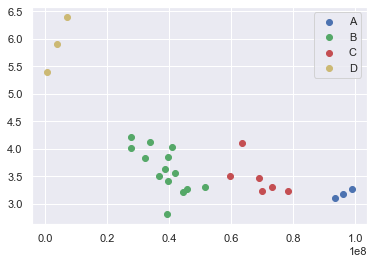

In [12]:
plt.figure(figsize=(6, 4))

x1 = b_sdf['boxmean'].values.tolist() 
x2 = b_sdf['scoremean'].values.tolist() 
colors = ['b', 'g', 'r','y'] 
shapes = ['o', 'o', 'o','o'] 
labels=['A','B','C','D'] 
kmeans_model,x1_result,x2_result=kmean.kmeans_building(x1, x2, 4, labels, colors, shapes)
print(kmeans_model) 
print(x1_result) 
print(x2_result)

# the basic plots of 27 genres (boxoffice)


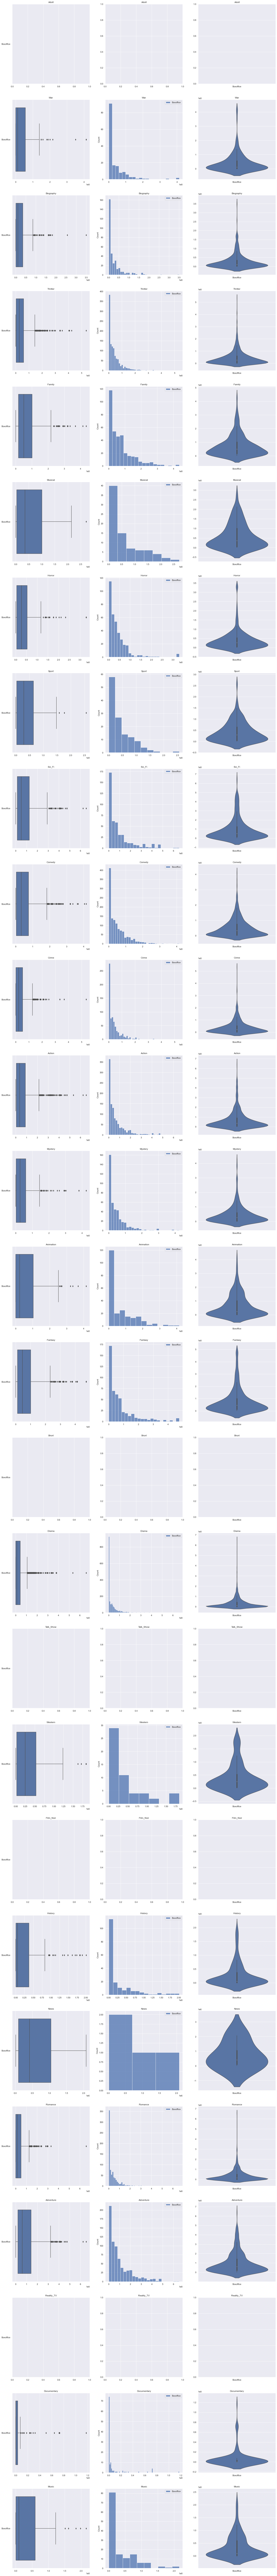

In [13]:
f, axes = plt.subplots(27, 3, figsize=(24, 240))
count=0
for a in mgset:
# Plot the basic uni-variate figures for HP
    sb.boxplot(data=globals()[a][['Boxoffice']], orient = "h", ax = axes[count,0]).set_title(a)
    sb.histplot(data=globals()[a][['Boxoffice']], ax = axes[count,1]).set_title(a)
    sb.violinplot(data=globals()[a][['Boxoffice']], ax = axes[count,2]).set_title(a)
    count=count+1

# clean the data(delete NAN in Boxoffice and HGS )

In [14]:
bo_sc_clean=moviedata_clean
bo_sc_clean = bo_sc_clean[bo_sc_clean['Boxoffice'].notna()]
bo_sc_clean = bo_sc_clean[bo_sc_clean['Hidden Gem Score'].notna()]
bo_sc_clean=bo_sc_clean.reset_index(drop=True)
bo_sc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  3672 non-null   object 
 1   Genre                  3672 non-null   object 
 2   Tags                   3655 non-null   object 
 3   Series or Movie        3672 non-null   object 
 4   Hidden Gem Score       3672 non-null   float64
 5   Director               3671 non-null   object 
 6   Writer                 3621 non-null   object 
 7   Actors                 3671 non-null   object 
 8   IMDb Score             3672 non-null   float64
 9   Rotten Tomatoes Score  3472 non-null   float64
 10  Metacritic Score       3334 non-null   float64
 11  Awards Received        2762 non-null   float64
 12  Awards Nominated For   3286 non-null   float64
 13  Boxoffice              3672 non-null   float64
 14  Production House       3208 non-null   object 
 15  IMDb

# clustering of all the cleaned movies

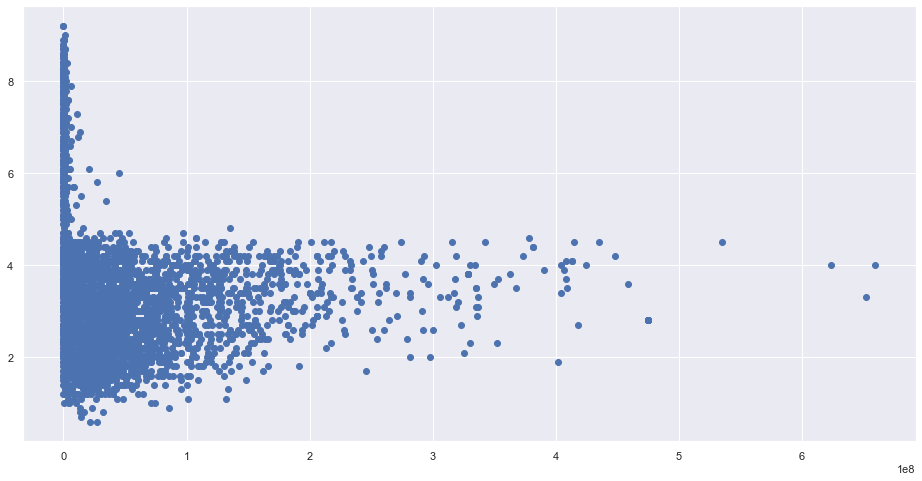

In [39]:
# Extract the Features from the Data
X = pd.DataFrame(bo_sc_clean[['Boxoffice','Hidden Gem Score']])
                           
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", data = X)         

In [40]:
# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3)

In [41]:
print("Features", "\tBoxoffice", "\tHGS")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	Boxoffice 	HGS

Cluster 0:	18012700.15	3.72	
Cluster 1:	117650504.11	3.11	
Cluster 2:	330878531.71	3.48	


<AxesSubplot:xlabel='Cluster', ylabel='count'>

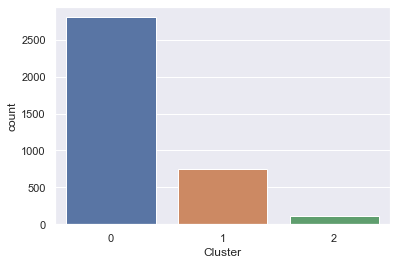

In [42]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

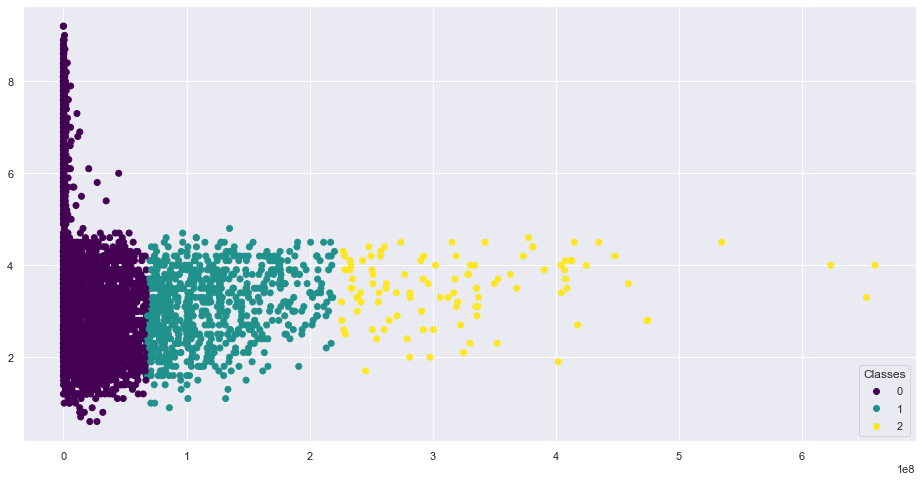

In [43]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
sc = plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", c = "Cluster", cmap = 'viridis', data = X_labeled)
legend = axes.legend(*sc.legend_elements(), loc="lower right", title="Classes")

In [44]:
res0Series = pd.Series(kmeans.labels_)

In [45]:
res0 = res0Series[res0Series.values == 0]
clust0=bo_sc_clean.iloc[res0.index]
clust3=clust0.loc[clust0['Hidden Gem Score']>=5]
clust3=clust3.reset_index(drop=True)#clust3 is the high score low bo
clust3

Title  \
0                     HOW TO BUILD A GIRL   
1           Comrades: Almost a Love Story   
2                          The Mysterians   
3                           Trial by Fire   
4                   Framing John DeLorean   
..                                    ...   
480                         I Will Follow   
481                  I Capture the Castle   
482      Being Elmo: A Puppeteers Journey   
483  The Adventures of Elmo in Grouchland   
484                            The Square   

                                           Genre  \
0                                         Comedy   
1                                 Drama, Romance   
2               Action, Family, Sci-Fi, Thriller   
3                               Biography, Drama   
4                  Documentary, Biography, Drama   
..                                           ...   
480                                        Drama   
481                               Drama, Romance   
482                                  Documentary   
483  Adventure, Comedy, Family, Fantasy, Musical   
484            Documentary, Drama, History, News   

                                                  Tags Series or Movie  \
0         Dramas,Comedies,Films Based on Books,British           Movie   
1    Romantic Dramas,Chinese Movies,Dramas,Romantic...           Movie   
2    Sci-Fi & Fantasy,Alien Sci-Fi,Japanese Movies,...           Movie   
3    Films Based on Real Life,Social Issue Dramas,D...           Movie   
4    Biographical Documentaries,Dramas,Documentary ...           Movie   
..                                                 ...             ...   
480  Independent Dramas,Dramas,Romantic Dramas,Inde...           Movie   
481  Dramas,Romantic Dramas,20th Century Period Pie...           Movie   
482  Biographical Documentaries,Documentaries,Docum...           Movie   
483  Family Adventures,Family Features,Children & F...           Movie   
484  International Movies,Political Documentaries,I...           Movie   

     Hidden Gem Score                       Director  \
0                 7.0                  Coky Giedroyc   
1                 6.7              Peter Ho-Sun Chan   
2                 7.1                   Ishirô Honda   
3                 6.2                   Edward Zwick   
4                 8.0    Sheena M. Joyce, Don Argott   
..                ...                            ...   
480               8.2                   Ava DuVernay   
481               5.0                     Tim Fywell   
482               5.6  Constance Marks, Philip Shane   
483               6.8                 Gary Halvorson   
484               5.1                 Jehane Noujaim   

                                           Writer  \
0                                   Caitlin Moran   
1                                          Ivy Ho   
2    Jôjirô Okami, Takeshi Kimura, Shigeru Kayama   
3                  Geoffrey Fletcher, David Grann   
4                    Alexandra Orton, Dan Greeney   
..                                            ...   
480                                  Ava DuVernay   
481                     Heidi Thomas, Dodie Smith   
482                Justin Weinstein, Philip Shane   
483             Mitchell Kriegman, Joey Mazzarino   
484                                           NaN   

                                                Actors  IMDb Score  \
0    Cleo, Paddy Considine, Beanie Feldstein, Dónal...         5.8   
1    Maggie Cheung, Leon Lai, Kristy Yeung, Eric Tsang         8.1   
2    Akihiko Hirata, Yumi Shirakawa, Momoko Kôchi, ...         6.2   
3    Emily Meade, Chris Coy, Laura Dern, Jack O'Con...         6.9   
4    Dean Winters, Josh Charles, Alec Baldwin, More...         6.5   
..                                                 ...         ...   
480  Omari Hardwick, Michole Briana White, Dijon Ta...         6.0   
481  Bill Nighy, Romola Garai, Helena Little, Sophi...         6.9   
482  Tau Bennett, Whoopi Goldberg, Bill B

In [46]:
clust0=clust0.loc[clust0['Hidden Gem Score']<5]
clust0=clust0.reset_index(drop=True)#clust 0 both low
clust0

Title                                     Genre  \
0              The Invisible  Crime, Drama, Fantasy, Mystery, Thriller   
1                 The Closet                                    Comedy   
2            Ordinary People                                     Drama   
3           Rebel in the Rye            Biography, Drama, Romance, War   
4                 The Return                                     Drama   
...                      ...                                       ...   
2315                Year One                                    Comedy   
2316              One Chance           Biography, Comedy, Drama, Music   
2317       One for the Money           Action, Comedy, Crime, Thriller   
2318  District 13: Ultimatum                   Action, Crime, Thriller   
2319          13 Going on 30                  Comedy, Fantasy, Romance   

                                                   Tags Series or Movie  \
0     Thriller Movies,Movies Based on Books,Supernat...           Movie   
1                 Korean Movies,Horror Movies,Mysteries           Movie   
2         Korean Movies,Thriller Movies,Crime Thrillers           Movie   
3     Movies Based on Real Life,Dramas,Movies Based ...           Movie   
4                                  Korean Movies,Dramas           Movie   
...                                                 ...             ...   
2315  Slapstick Comedies,Comedies,Dark Comedies,Acti...           Movie   
2316  Dramas,Biographical Dramas,Dramas based on rea...           Movie   
2317  Romantic Comedies,Action Comedies,Comedies,Pol...           Movie   
2318  International Movies,Action Thrillers,French F...           Movie   
2319  Romantic Comedies,Comedies,Romantic Films,Roma...           Movie   

      Hidden Gem Score             Director  \
0                  2.0       David S. Goyer   
1                  3.8        Francis Veber   
2                  4.2       Robert Redford   
3                  3.1         Danny Strong   
4                  4.1   Andrey Zvyagintsev   
...                ...                  ...   
2315               1.6         Harold Ramis   
2316               3.0        David Frankel   
2317               1.3  Julie Anne Robinson   
2318               3.4  Patrick Alessandrin   
2319               3.1          Gary Winick   

                                                 Writer  \
0                 Mats Wahl, Mick Davis, Christine Roum   
1                                         Francis Veber   
2                           Alvin Sargent, Judith Guest   
3                       Danny Strong, Kenneth Slawenski   
4      Aleksandr Novototskiy-Vlasov, Vladimir Moiseenko   
...                                                 ...   
2315       Lee Eisenberg, Gene Stupnitsky, Harold Ramis   
2316                                     Justin Zackham   
2317  Stacy Sherman, Liz Brixius, Janet Evanovich, K...   
2318                                         Luc Besson   
2319                        Josh Goldsmith, Cathy Yuspa   

                                                 Actors  IMDb Score  \
0     Marcia Gay Harden, Margarita Levieva, Chris Ma...         6.2   
1     Daniel Auteuil, Thierry Lhermitte, Michèle Lar...         7.0   
2     Donald Sutherland, Mary Tyler Moore, Judd Hirs...         7.7   
3     Victor Garber, Hope Davis, Kevin Spacey, Nicho...         6.7   
4     Nataliya Vdovina, Vladimir Garin, Konstantin L...         8.0   
...                                                 ...         ...   
2315  Oliver Platt, David Cross, Michael Cera, Jack ...         4.9   
2316  Colm Meaney, James Corden, Julie Walters, Alex...         6.8   
2317  Katherine Heigl, John Leguizamo, Jason O'Mara,...         5.3   
2318  Cyril Raffaelli, Daniel Duval, Philippe Torret...         6.5   
2319  Andy Serkis, Jennifer Garner, Mark Ruffalo, Ju...         6.2   

      Rotten Tomatoes Score  Metacritic Score  Awards Received  \
0                      20.0             

In [47]:
res1 = res0Series[res0Series.values == 1]
clust1=bo_sc_clean.iloc[res1.index]
clust1=clust1.reset_index(drop=True)#clust 1 average
clust1

Title  \
0                                The Girl on the Train   
1                                                  Red   
2                                Mr. & Mrs. Incredible   
3                                   Sonic the Hedgehog   
4                                    The Invisible Man   
..                                                 ...   
747                                 Sex and the City 2   
748  Teenage Mutant Ninja Turtles II: The Secret of...   
749                                               2012   
750                                     50 First Dates   
751                                                 21   

                                         Genre  \
0              Crime, Drama, Mystery, Thriller   
1              Action, Comedy, Crime, Thriller   
2              Action, Comedy, Crime, Thriller   
3            Action, Adventure, Comedy, Sci-Fi   
4     Drama, Horror, Mystery, Sci-Fi, Thriller   
..                                         ...   
747                     Comedy, Drama, Romance   
748  Action, Adventure, Comedy, Family, Sci-Fi   
749                  Action, Adventure, Sci-Fi   
750                     Comedy, Drama, Romance   
751            Crime, Drama, History, Thriller   

                                                  Tags Series or Movie  \
0    Bollywood Movies,Psychological Thrillers,Crime...           Movie   
1    Dramas,Crime Movies,Crime Dramas,Indian Movies...           Movie   
2    Action & Adventure,Sci-Fi & Fantasy,Action Sci...           Movie   
3    Children & Family Movies,Comedies,Action Comed...           Movie   
4    Sci-Fi & Fantasy,Horror Movies,Movies Based on...           Movie   
..                                                 ...             ...   
747  Romantic Favourites,Romantic Comedies,Comedies...           Movie   
748  Family Comedies,Family Sci-Fi & Fantasy,Childr...           Movie   
749  Sci-Fi & Fantasy,Action Sci-Fi & Fantasy,Actio...           Movie   
750  Romantic Favourites,Romantic Comedies,Comedies...           Movie   
751  Dramas,Dramas based on a book,Police Dramas,Po...           Movie   

     Hidden Gem Score              Director  \
0                 2.6           Tate Taylor   
1                 3.4      Robert Schwentke   
2                 3.0            Doug Liman   
3                 2.9           Jeff Fowler   
4                 3.6        Leigh Whannell   
..                ...                   ...   
747               1.5  Michael Patrick King   
748               2.4      Michael Pressman   
749               2.4       Roland Emmerich   
750               2.7           Peter Segal   
751               2.5        Robert Luketic   

                                                Writer  \
0                  Erin Cressida Wilson, Paula Hawkins   
1    Jon Hoeber, Erich Hoeber, Cully Hamner, Warren...   
2                                        Simon Kinberg   
3                               Pat Casey, Josh Miller   
4                                       Leigh Whannell   
..                                                 ...   
747  Michael Patrick King, Candace Bushnell, Darren...   
748         Kevin Eastman, Todd W. Langen, Peter Laird   
749                     Harald Kloser, Roland Emmerich   
750                                        George Wing   
751           Allan Loeb, Peter Steinfeld, Ben Mezrich   

                                                Actors  IMDb Score  \
0    Haley Bennett, Emily Blunt, Rebecca Ferguson, ...         6.5   
1    Bruce Willis, Mary-Louise Parker, Jefferson Br...         7.0   
2    Brad Pitt, Vince Vaughn, Adam Brody, Angelina ...         6.5   
3    Jim Carrey, Ben Schwartz, Tika Sumpter, James ...         6.5   
4    Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...         7.1   
..                                                 ...         ...   
747  Sarah Jessica Parker, Cynthia Nixon, Kristin D...         4.5   
748  Leif Tilden, Michelan Sisti, Paige 

In [48]:
res2 = res0Series[res0Series.values == 2]
clust2=bo_sc_clean.iloc[res2.index]
clust2=clust2.reset_index(drop=True)#clust 2 high bo low score
clust2

Title  \
0                                        Joker   
1                                            I   
2                             Harrys Daughters   
3     Ill Always Know What You Did Last Summer   
4                               Its Me, Its Me   
..                                         ...   
110     Harry Potter and the Half-Blood Prince   
111  Harry Potter and the Order of the Phoenix   
112      The Lord of the Rings: The Two Towers   
113   The Twilight Saga: Breaking Dawn: Part 2   
114   The Twilight Saga: Breaking Dawn: Part 1   

                                            Genre  \
0                          Crime, Drama, Thriller   
1              Action, Adventure, Fantasy, Sci-Fi   
2              Adventure, Drama, Fantasy, Mystery   
3              Action, Adventure, Fantasy, Sci-Fi   
4                                          Horror   
..                                            ...   
110   Action, Adventure, Family, Fantasy, Mystery   
111   Action, Adventure, Family, Fantasy, Mystery   
112             Action, Adventure, Drama, Fantasy   
113            Adventure, Drama, Fantasy, Romance   
114  Adventure, Drama, Fantasy, Romance, Thriller   

                                                  Tags Series or Movie  \
0    Dark Comedies,Crime Comedies,Dramas,Comedies,C...           Movie   
1                                Dramas,Swedish Movies           Movie   
2                                Dramas,Swedish Movies           Movie   
3          Horror Films,Films Based on Books,US Movies           Movie   
4    Dark Comedies,Comedies,Thriller Movies,Movies ...           Movie   
..                                                 ...             ...   
110  Family Features,Sci-Fi & Fantasy,Fantasy,Famil...           Movie   
111  Family Features,Sci-Fi & Fantasy,Fantasy,Famil...           Movie   
112  Sci-Fi & Fantasy,Action Sci-Fi & Fantasy,Fanta...           Movie   
113  Dramas,Romantic Dramas,Dramas based on a book,...           Movie   
114  Dramas,Romantic Dramas,Dramas based on a book,...           Movie   

     Hidden Gem Score         Director  \
0                 3.5    Todd Phillips   
1                 2.8     George Lucas   
2                 4.4      David Yates   
3                 2.8     George Lucas   
4                 3.8  Andy Muschietti   
..                ...              ...   
110               4.0      David Yates   
111               3.7      David Yates   
112               4.5    Peter Jackson   
113               2.6      Bill Condon   
114               2.0      Bill Condon   

                                                Writer  \
0    Bob Kane, Jerry Robinson, Bill Finger, Todd Ph...   
1                                         George Lucas   
2                           Steve Kloves, J.K. Rowling   
3                                         George Lucas   
4    Chase Palmer, Gary Dauberman, Stephen King, Ca...   
..                                                 ...   
110                         Steve Kloves, J.K. Rowling   
111                   Michael Goldenberg, J.K. Rowling   
112  Stephen Sinclair, J.R.R. Tolkien, Philippa Boy...   
113                 Melissa Rosenberg, Stephenie Meyer   
114                 Melissa Rosenberg, Stephenie Meyer   

                                                Actors  IMDb Score  \
0    Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...         8.4   
1    Ewan McGregor, Natalie Portman, Jake Lloyd, Li...         6.5   
2    Daniel Radcliffe, Ralph Fiennes, Alan Rickman,...         8.1   
3    Ewan McGregor, Natalie Portman, Jake Lloyd, Li...         6.5   
4    Finn Wolfhard, Jaeden Martell, Sophia Lillis, ...         7.3   
..                                                 ...         ...   
110  Dave Legeno, Daniel Radcliffe, Michael Gambon,...         7.6   
111  Harry Melling, Richard Macklin, Daniel Radclif...         7.5   
112  John Bach, Sala Baker, Sean Astin, Bruce Allpress         8.7   
113  Taylor 

# anomaly detection for each cluster

## cluster 0

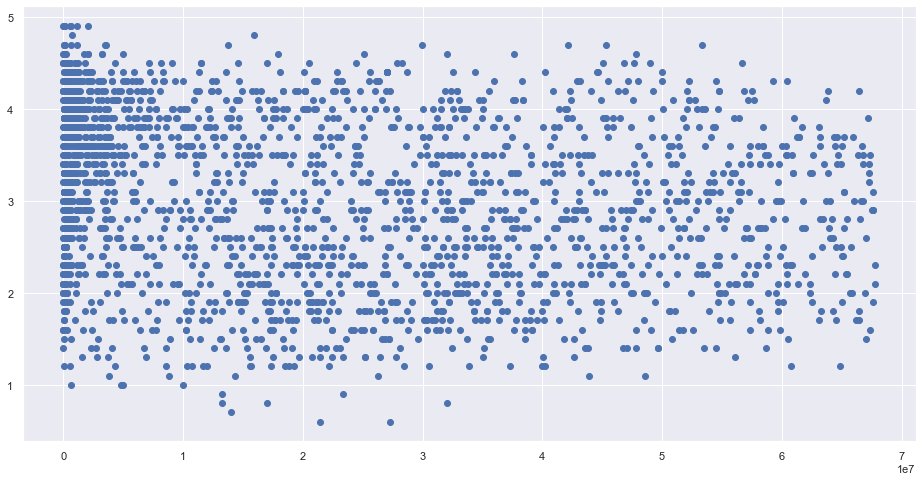

In [49]:
# Extract the Features from the Data
X = pd.DataFrame(clust0[['Boxoffice','Hidden Gem Score']])
                           
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", data = X)          

In [50]:
# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors 10
cont_fraction = 0.05    # Fraction of Anomalies 0.05

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

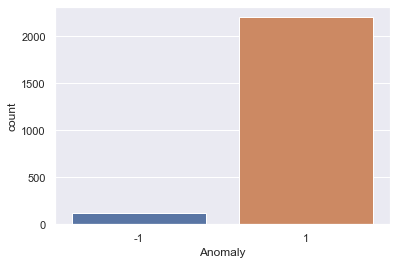

In [51]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

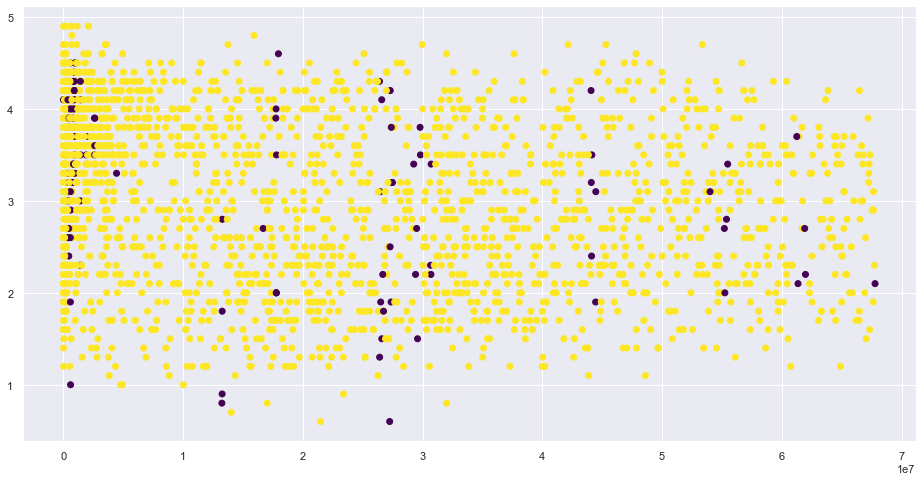

In [52]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", c = "Anomaly", cmap = 'viridis', data = X_labeled)

## cluster 1


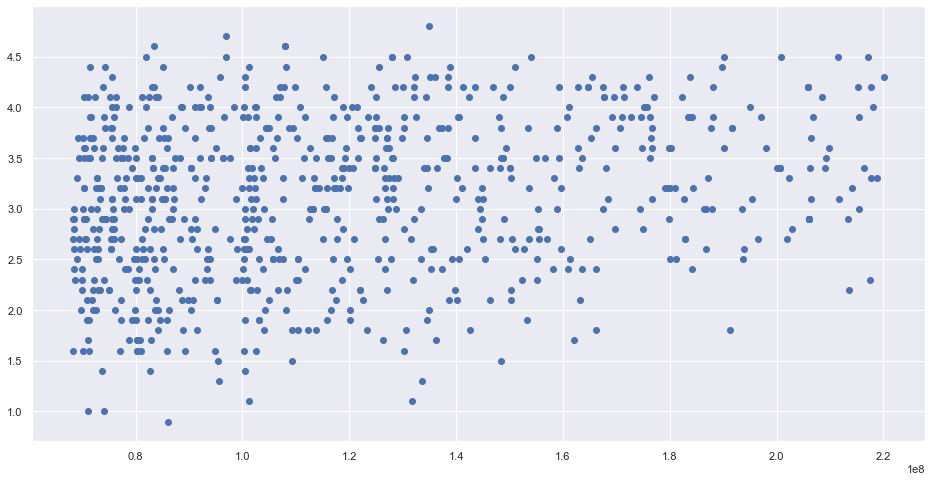

In [53]:
# Extract the Features from the Data
X = pd.DataFrame(clust1[['Boxoffice','Hidden Gem Score']])
                           
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", data = X)     

In [54]:
# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors 10
cont_fraction = 0.05    # Fraction of Anomalies 0.05

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

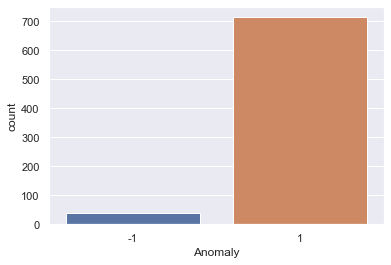

In [55]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

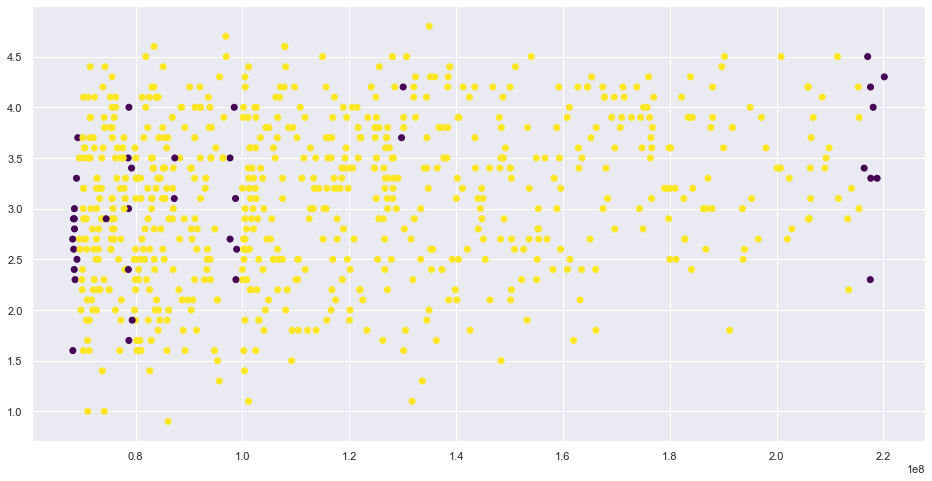

In [56]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", c = "Anomaly", cmap = 'viridis', data = X_labeled)

## cluster 2

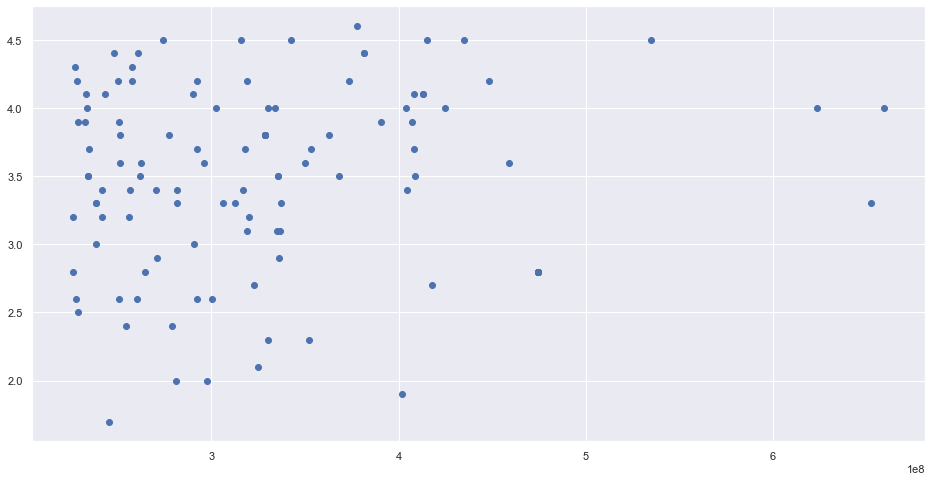

In [57]:
# Extract the Features from the Data
X = pd.DataFrame(clust2[['Boxoffice','Hidden Gem Score']])
                           
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", data = X)        

In [58]:
# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors 10
cont_fraction = 0.05    # Fraction of Anomalies 0.05

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

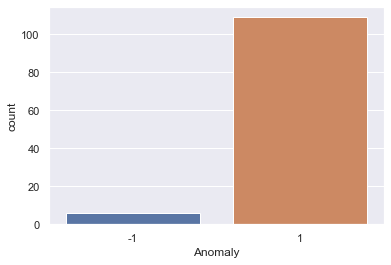

In [59]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

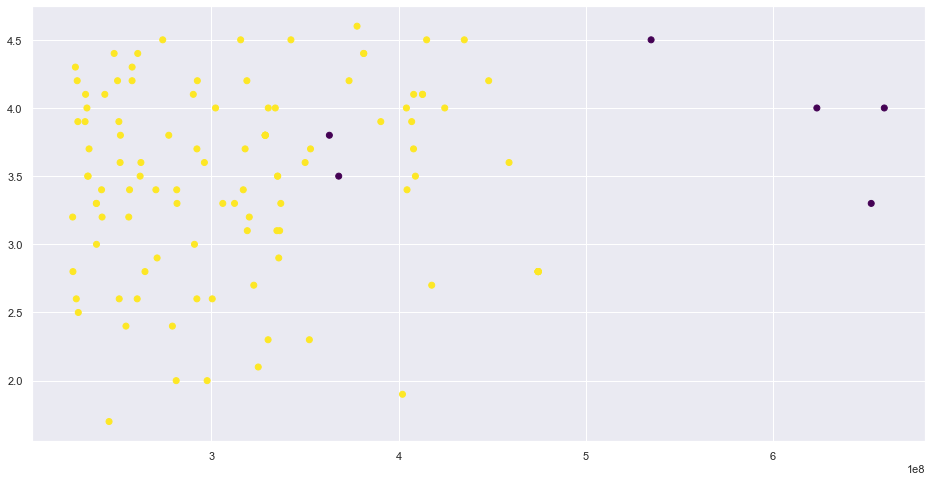

In [60]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", c = "Anomaly", cmap = 'viridis', data = X_labeled)

## cluster 3

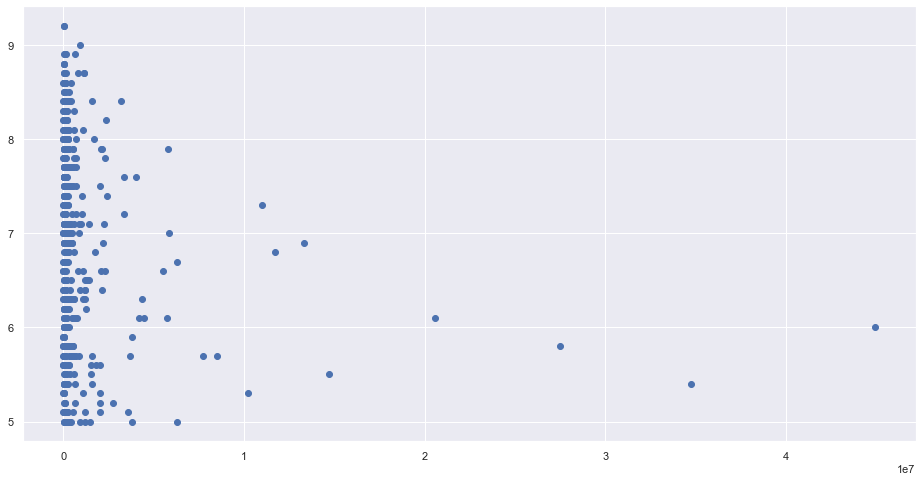

In [61]:
# Extract the Features from the Data
X = pd.DataFrame(clust3[['Boxoffice','Hidden Gem Score']])
                           
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", data = X)         

In [62]:
# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors 10
cont_fraction = 0.05    # Fraction of Anomalies 0.05

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

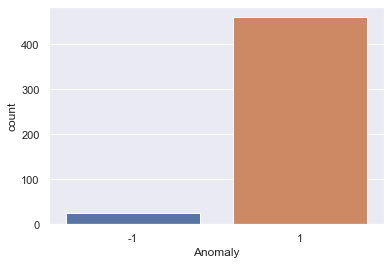

In [63]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

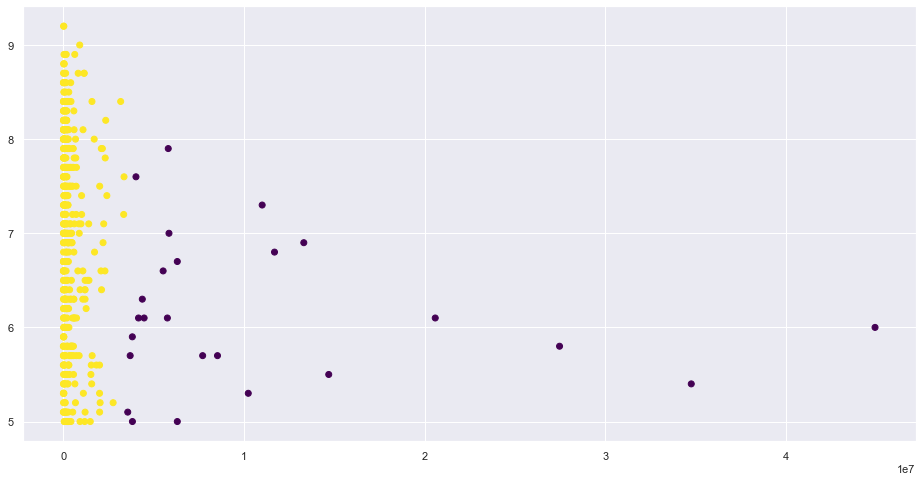

In [64]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Boxoffice", y = "Hidden Gem Score", c = "Anomaly", cmap = 'viridis', data = X_labeled)

# statistic of genres in different clusters

In [65]:
#this block build the dataframe for each clust

clust0l=[]#initialize the temporary list
for a in mgset:
    a='clust0'+a
    clust0l.append(a)
    globals()[a]=pd.DataFrame(columns=clmname)  
    
clust1l=[]#initialize the temporary list
for a in mgset:
    a='clust1'+a
    clust1l.append(a)
    globals()[a]=pd.DataFrame(columns=clmname)  

clust2l=[]#initialize the temporary list
for a in mgset:
    a='clust2'+a
    clust2l.append(a)
    globals()[a]=pd.DataFrame(columns=clmname)  

clust3l=[]#initialize the temporary list
for a in mgset:
    a='clust3'+a
    clust3l.append(a)
    globals()[a]=pd.DataFrame(columns=clmname)  


In [66]:
#this block build df for each genre in each clust

S=clust0['Genre']
for i,v in S.items():
    templ=[]#initialize the temporary list
    v=str(v)
    v=v.split(', ')
    templ=templ+v
    entry=clust0.loc[[i]]
    for text in templ:
        if (text not in originset):
            for genre in mgset:
                if (text==genre):
                    a='clust0'+text
                    a=str(a)
                    globals()[a]=pd.concat([globals()[a],entry],ignore_index=True)
        if (text in originset):
            for a in range(4):
                if (text==originset[a]):
                    a='clust0'+replaceset[a]
                    a=str(a)
                    globals()[a]=pd.concat([globals()[a],entry],ignore_index=True)  
S=clust1['Genre']
for i,v in S.items():
    templ=[]#initialize the temporary list
    v=str(v)
    v=v.split(', ')
    templ=templ+v
    entry=clust1.loc[[i]]
    for text in templ:
        if (text not in originset):
            for genre in mgset:
                if (text==genre):
                    a='clust1'+text
                    a=str(a)
                    globals()[a]=pd.concat([globals()[a],entry],ignore_index=True)
        if (text in originset):
            for a in range(4):
                if (text==originset[a]):
                    a='clust1'+replaceset[a]
                    a=str(a)
                    globals()[a]=pd.concat([globals()[a],entry],ignore_index=True)  
S=clust2['Genre']
for i,v in S.items():
    templ=[]#initialize the temporary list
    v=str(v)
    v=v.split(', ')
    templ=templ+v
    entry=clust2.loc[[i]]
    for text in templ:
        if (text not in originset):
            for genre in mgset:
                if (text==genre):
                    a='clust2'+text
                    a=str(a)
                    globals()[a]=pd.concat([globals()[a],entry],ignore_index=True)
        if (text in originset):
            for a in range(4):
                if (text==originset[a]):
                    a='clust2'+replaceset[a]
                    a=str(a)
                    globals()[a]=pd.concat([globals()[a],entry],ignore_index=True)  
S=clust3['Genre']
for i,v in S.items():
    templ=[]#initialize the temporary list
    v=str(v)
    v=v.split(', ')
    templ=templ+v
    entry=clust3.loc[[i]]
    for text in templ:
        if (text not in originset):
            for genre in mgset:
                if (text==genre):
                    a='clust3'+text
                    a=str(a)
                    globals()[a]=pd.concat([globals()[a],entry],ignore_index=True)
        if (text in originset):
            for a in range(4):
                if (text==originset[a]):
                    a='clust3'+replaceset[a]
                    a=str(a)
                    globals()[a]=pd.concat([globals()[a],entry],ignore_index=True)  


In [67]:
clmname=['Genre','Count']

In [68]:
stat0=pd.DataFrame(columns=clmname)
stat1=pd.DataFrame(columns=clmname)
stat2=pd.DataFrame(columns=clmname)
stat3=pd.DataFrame(columns=clmname)
#initialize the new dataframe which collects the number of different genre movies in the clusts

In [69]:
clustlset=[clust0l,clust1l,clust2l,clust3l]

In [70]:
for j in clust0l:
    name=j[6:]
    number=len(globals()[j])
    df0 = pd.DataFrame([[name,number]], columns=clmname)
    stat0=stat0.append(df0,ignore_index=True)
for j in clust1l:
    name=j[6:]
    number=len(globals()[j])
    df1 = pd.DataFrame([[name,number]], columns=clmname)
    stat1=stat1.append(df1,ignore_index=True)
for j in clust2l:
    name=j[6:]
    number=len(globals()[j])
    df2 = pd.DataFrame([[name,number]], columns=clmname)
    stat2=stat2.append(df2,ignore_index=True)
for j in clust3l:
    name=j[6:]
    number=len(globals()[j])
    df3 = pd.DataFrame([[name,number]], columns=clmname)
    stat3=stat3.append(df3,ignore_index=True)

# the not so popular genre movies:


<AxesSubplot:title={'center':'Cluster 0'}, xlabel='Genre'>

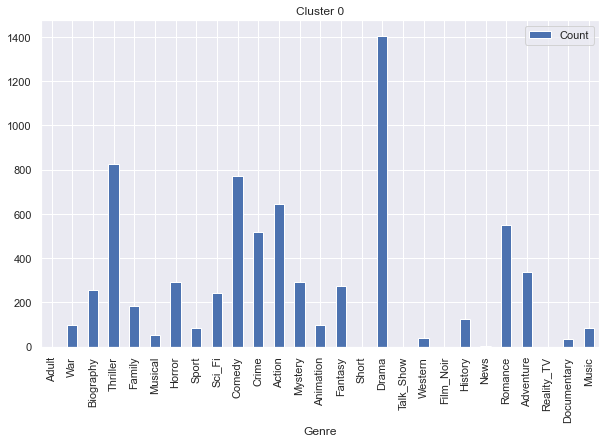

In [71]:
stat0.plot.bar(x='Genre',figsize=(10,6),title='Cluster 0')

# the average level movie genres


<AxesSubplot:title={'center':'Cluster 1'}, xlabel='Genre'>

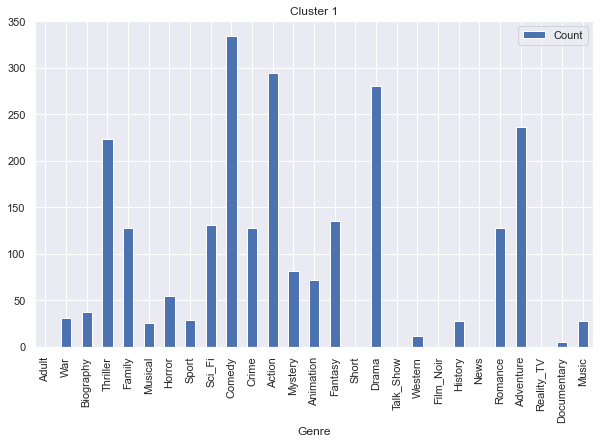

In [72]:
stat1.plot.bar(x='Genre',figsize=(10,6),title='Cluster 1')

# the most popular movies' genre (in the view of boxoffice)

<AxesSubplot:title={'center':'Cluster 2'}, xlabel='Genre'>

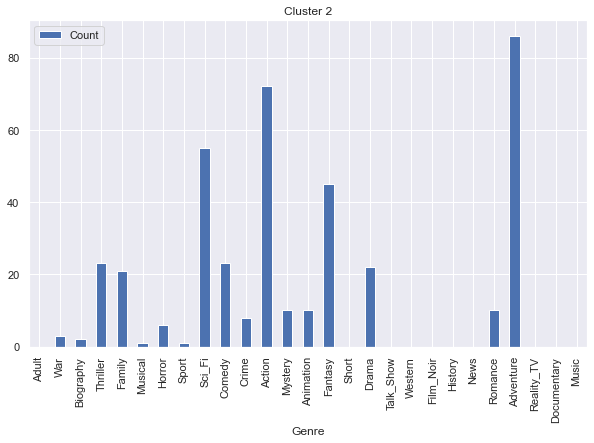

In [73]:
stat2.plot.bar(x='Genre',figsize=(10,6),title='Cluster 2')

# the most popular movies but low boxoffice


<AxesSubplot:title={'center':'Cluster 3'}, xlabel='Genre'>

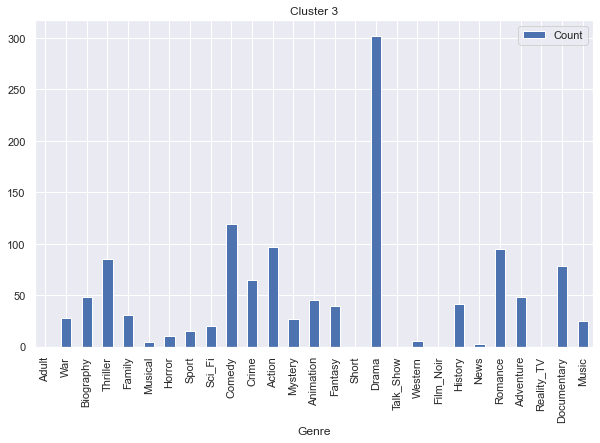

In [74]:
stat3.plot.bar(x='Genre',figsize=(10,6),title='Cluster 3')